In [3]:
pacman::p_load(dplyr,ggplot2,tidyverse,patchwork,data.table,lme4,quantreg,bbmle,ggridges)

### Read in data from analysis notebook
`../process-all-fcs-data.ipynb`

In [2]:
final_data = data.frame(fread("../../data/new_consol_2.csv"))#"../../data/consolidated_data.csv"))

In [4]:
unique(final_data$Strain)

[1]  371  379 1212 3963 1516 2090 6071  914 3492  375  874

In [4]:
final_data%>%dplyr::filter((Strain==6071)&(Position==5)) %>% dplyr::select(Strain,Position,Temperature,ConcCellmL)

Strain Position Temperature ConcCellmL
1  6071   5        16.5         14550.76 
2  6071   5        16.5         16520.48 
3  6071   5        16.5         14725.78 
4  6071   5        16.5         15955.27 
5  6071   5        16.5         18731.50 
6  6071   5        16.5         12205.33 
7  6071   5        16.5         37282.69 
8  6071   5        16.5         33911.88 
9  6071   5        16.5         40659.58 
10 6071   5        16.5        172307.01 
11 6071   5        16.5        133010.14 
12 6071   5        16.5        186839.38 
13 6071   5        16.5        214100.23 
14 6071   5        16.5        181362.60 
15 6071   5        16.5        311383.40

In [5]:
fsc_separated=final_data%>%
    dplyr::select(Strain,Position,Temperature,FSC_vals,RedB_vals,GR_Calc_placeholder) %>%
    tidyr::separate_rows(FSC_vals,RedB_vals,sep=",")

In [6]:
ssc_separated=final_data%>%
    dplyr::select(Strain,Position,Temperature,SSC_vals,FSC_vals,RedB_vals,GR_Calc_placeholder) %>%
    tidyr::separate_rows(SSC_vals,RedB_vals,FSC_vals,sep=",")

Warning message:
“Transformation
introduced infinite
values in continuous
x-axis”


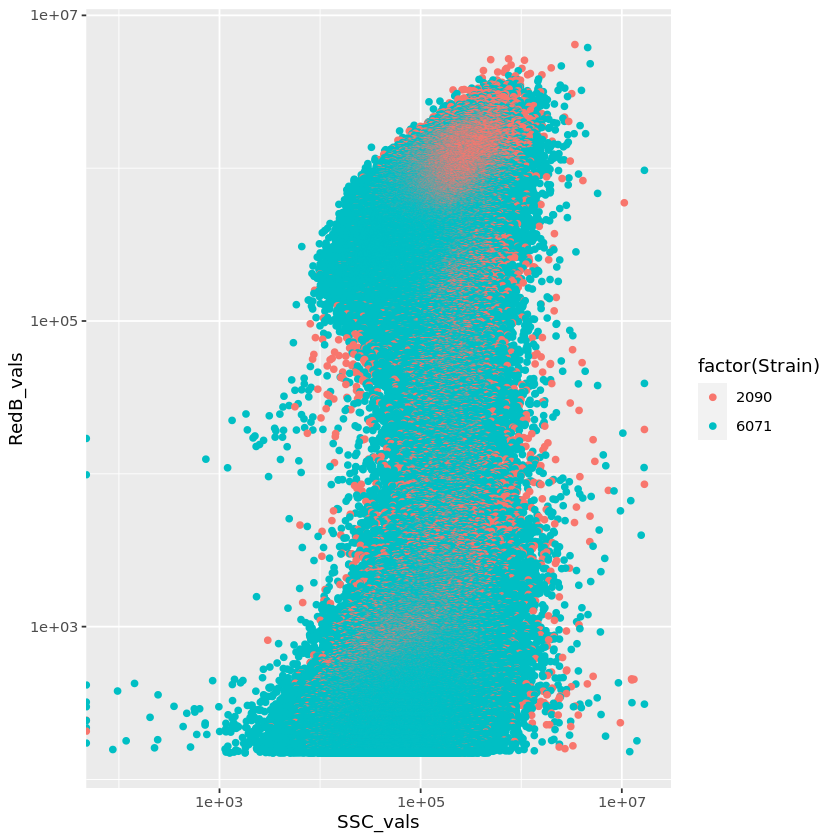

In [8]:
ggplot(ssc_separated%>%dplyr::filter(!is.na(RedB_vals)) %>% 
     dplyr::mutate(RedB_vals=as.numeric(as.character(RedB_vals)),
                   SSC_vals=as.numeric(as.character(SSC_vals))) %>%
     dplyr::filter(!is.na(RedB_vals)&(RedB_vals!=0)) %>%
     dplyr::filter(log10(RedB_vals) > 5) %>%dplyr::arrange(desc(RedB_vals)))+
    geom_point(aes(x=SSC_vals,y=RedB_vals,color=factor(Strain))) + scale_y_log10() + scale_x_log10()

Picking joint bandwidth of 0.0181



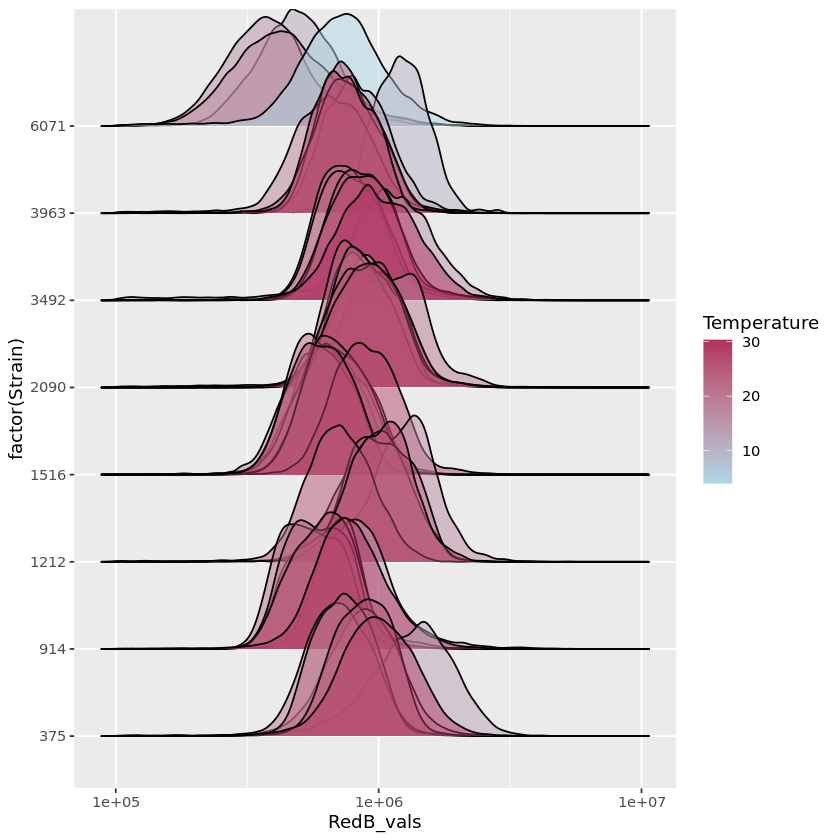

In [25]:
ggplot(ssc_separated%>%dplyr::filter(!is.na(RedB_vals)) %>% 
     dplyr::mutate(RedB_vals=as.numeric(as.character(RedB_vals)),
                   SSC_vals=as.numeric(as.character(SSC_vals)),
                   FSC_vals=as.numeric(as.character(FSC_vals))) %>%
     dplyr::filter(!is.na(RedB_vals)&(RedB_vals!=0)&(SSC_vals!=0)&(!is.na(SSC_vals))&
       (FSC_vals!=0)&(!is.na(FSC_vals))&(GR_Calc_placeholder=="TF")) %>%
     dplyr::filter((log10(RedB_vals) > 5)&(log10(FSC_vals) > 5.5)) %>%dplyr::arrange(desc(RedB_vals)))+
    geom_density_ridges(aes(x=RedB_vals,fill=as.numeric(Temperature),group=paste0(Temperature,Strain),
                            #fill=factor(Temperature,levels=sort(unique(as.numeric(Temperature)))),
                            y=factor(Strain)),alpha=0.5)+ 
                 scale_x_log10() +
    scale_fill_gradient(low="light blue",high="maroon",name="Temperature")

Picking joint bandwidth of 0.00865



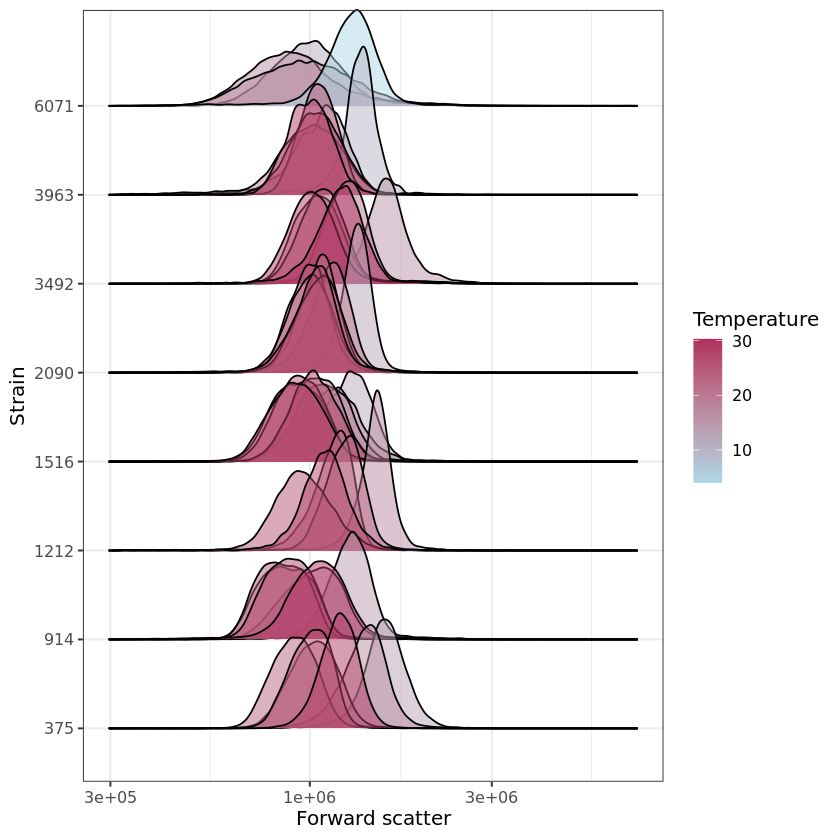

In [26]:
ggplot(ssc_separated%>%dplyr::filter(!is.na(RedB_vals)) %>% 
     dplyr::mutate(RedB_vals=as.numeric(as.character(RedB_vals)),
                   SSC_vals=as.numeric(as.character(SSC_vals)),
                   FSC_vals=as.numeric(as.character(FSC_vals))) %>%
     dplyr::filter(!is.na(RedB_vals)&(RedB_vals!=0)&(SSC_vals!=0)&(!is.na(SSC_vals))&
       (FSC_vals!=0)&(!is.na(FSC_vals))&(GR_Calc_placeholder=="TF")) %>%
     dplyr::filter((log10(RedB_vals) > 5)&(log10(FSC_vals) > 5.5)) %>%dplyr::arrange(desc(RedB_vals)))+
    geom_density_ridges(aes(x=FSC_vals,fill=as.numeric(Temperature),group=paste0(Temperature,Strain),
                            #fill=factor(Temperature,levels=sort(unique(as.numeric(Temperature)))),
                            y=factor(Strain)),alpha=0.5)+ 
                 scale_x_log10() +
    scale_fill_gradient(low="light blue",high="maroon",name="Temperature") + theme_bw(base_size=12) + 
    xlab("Forward scatter") + ylab("Strain")

Picking joint bandwidth of 0.00865



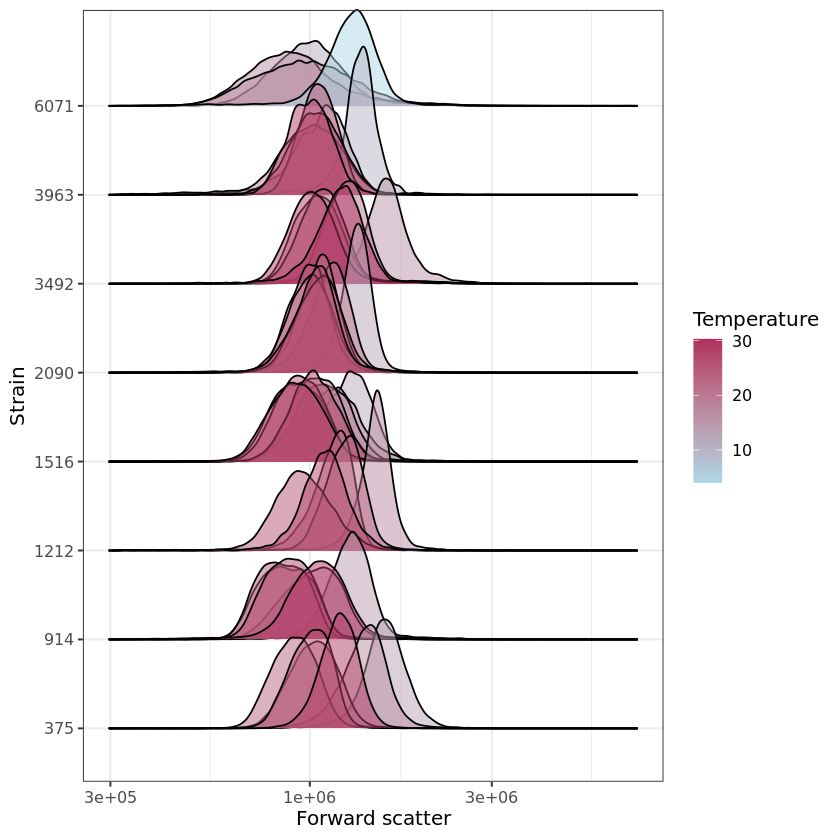

In [27]:
ggplot(ssc_separated%>%dplyr::filter(!is.na(RedB_vals)) %>% 
     dplyr::mutate(RedB_vals=as.numeric(as.character(RedB_vals)),
                   SSC_vals=as.numeric(as.character(SSC_vals)),
                   FSC_vals=as.numeric(as.character(FSC_vals))) %>%
     dplyr::filter(!is.na(RedB_vals)&(RedB_vals!=0)&(SSC_vals!=0)&(!is.na(SSC_vals))&
       (FSC_vals!=0)&(!is.na(FSC_vals))&(GR_Calc_placeholder=="TF")) %>%
     dplyr::filter((log10(RedB_vals) > 5)&(log10(FSC_vals) > 5.5)) %>%dplyr::arrange(desc(RedB_vals)))+
    geom_density_ridges(aes(x=FSC_vals,fill=as.numeric(Temperature),group=paste0(Temperature,Strain),
                            #fill=factor(Temperature,levels=sort(unique(as.numeric(Temperature)))),
                            y=factor(Strain)),alpha=0.5)+ 
                 scale_x_log10() +
    scale_fill_gradient(low="light blue",high="maroon",name="Temperature") + theme_bw(base_size=12) + 
    xlab("Forward scatter") + ylab("Strain")

Picking joint bandwidth of 0.00865



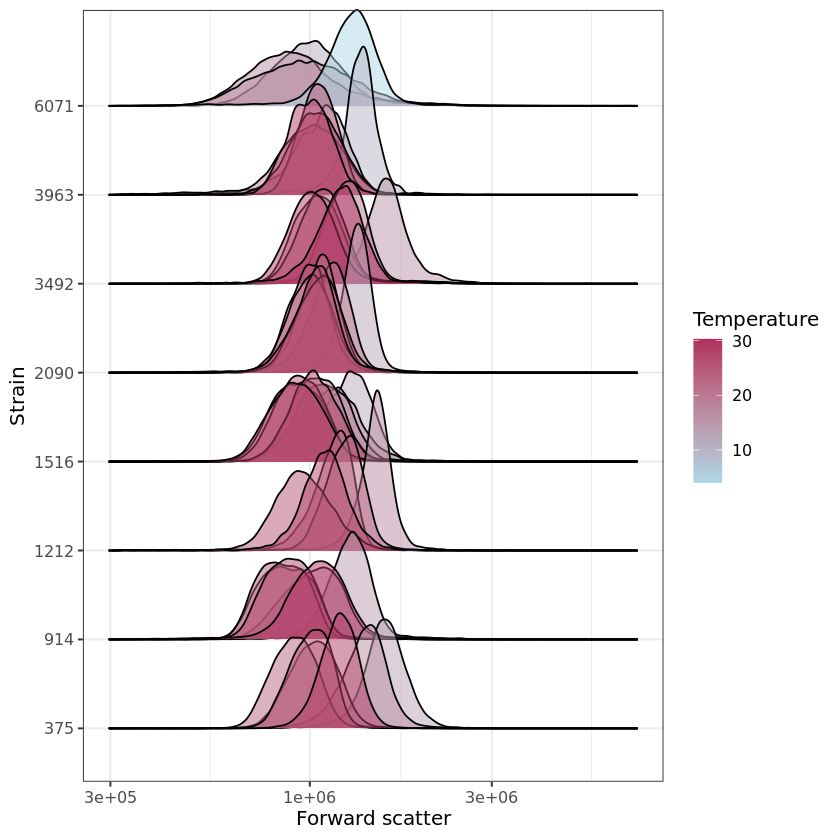

In [28]:
ggplot(ssc_separated%>%dplyr::filter(!is.na(RedB_vals)) %>% 
     dplyr::mutate(RedB_vals=as.numeric(as.character(RedB_vals)),
                   SSC_vals=as.numeric(as.character(SSC_vals)),
                   FSC_vals=as.numeric(as.character(FSC_vals))) %>%
     dplyr::filter(!is.na(RedB_vals)&(RedB_vals!=0)&(SSC_vals!=0)&(!is.na(SSC_vals))&
       (FSC_vals!=0)&(!is.na(FSC_vals))&(GR_Calc_placeholder=="TF")) %>%
     dplyr::filter((log10(RedB_vals) > 5)&(log10(FSC_vals) > 5.5)) %>%dplyr::arrange(desc(RedB_vals)))+
    geom_density_ridges(aes(x=FSC_vals,fill=as.numeric(Temperature),group=paste0(Temperature,Strain),
                            #fill=factor(Temperature,levels=sort(unique(as.numeric(Temperature)))),
                            y=factor(Strain)),alpha=0.5)+ 
                 scale_x_log10() +
    scale_fill_gradient(low="light blue",high="maroon",name="Temperature") + theme_bw(base_size=12) + 
    xlab("Forward scatter") + ylab("Strain")

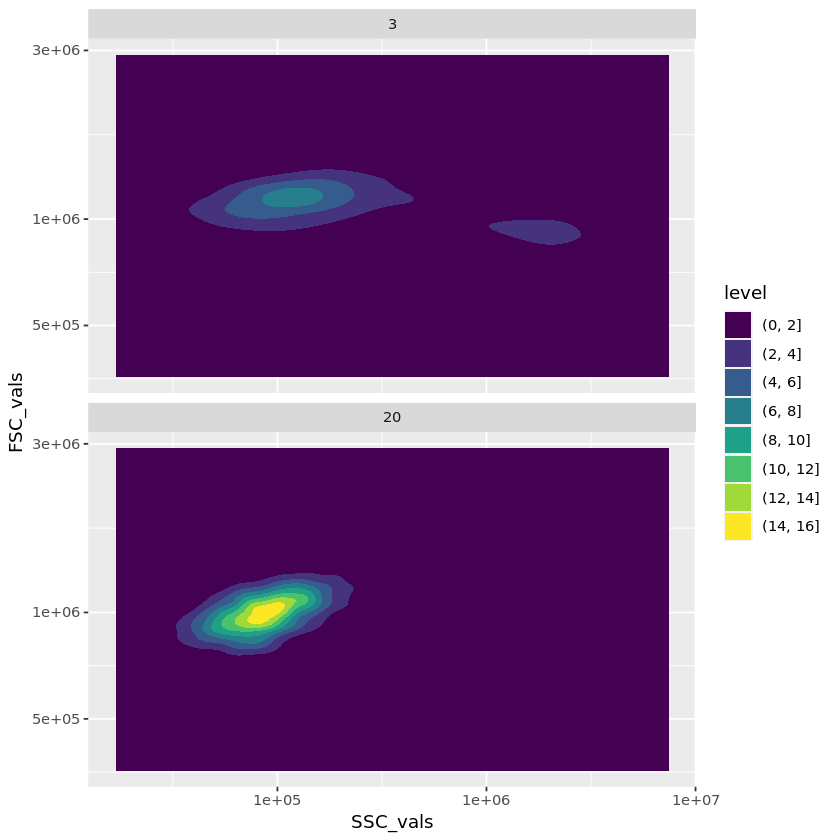

In [557]:
ggplot(ssc_separated%>%dplyr::filter(!is.na(RedB_vals)) %>% 
     dplyr::mutate(RedB_vals=as.numeric(as.character(RedB_vals)),
                   SSC_vals=as.numeric(as.character(SSC_vals)),
                   FSC_vals=as.numeric(as.character(FSC_vals))) %>%
     dplyr::filter(!is.na(RedB_vals)&(RedB_vals!=0)&(SSC_vals!=0)&(!is.na(SSC_vals))&
       (FSC_vals!=0)&(!is.na(FSC_vals))&(GR_Calc_placeholder=="TF")) %>%
     dplyr::filter((log10(RedB_vals) > 5)&(log10(FSC_vals) > 5.5)) %>%dplyr::arrange(desc(RedB_vals)) %>%
    dplyr::filter((Strain==3963)&(Position%in%c(3,20))))+
    stat_density2d_filled(aes(x=SSC_vals,y=FSC_vals)) + 
    scale_y_log10() + scale_x_log10() + facet_wrap(~Position,nrow=2)

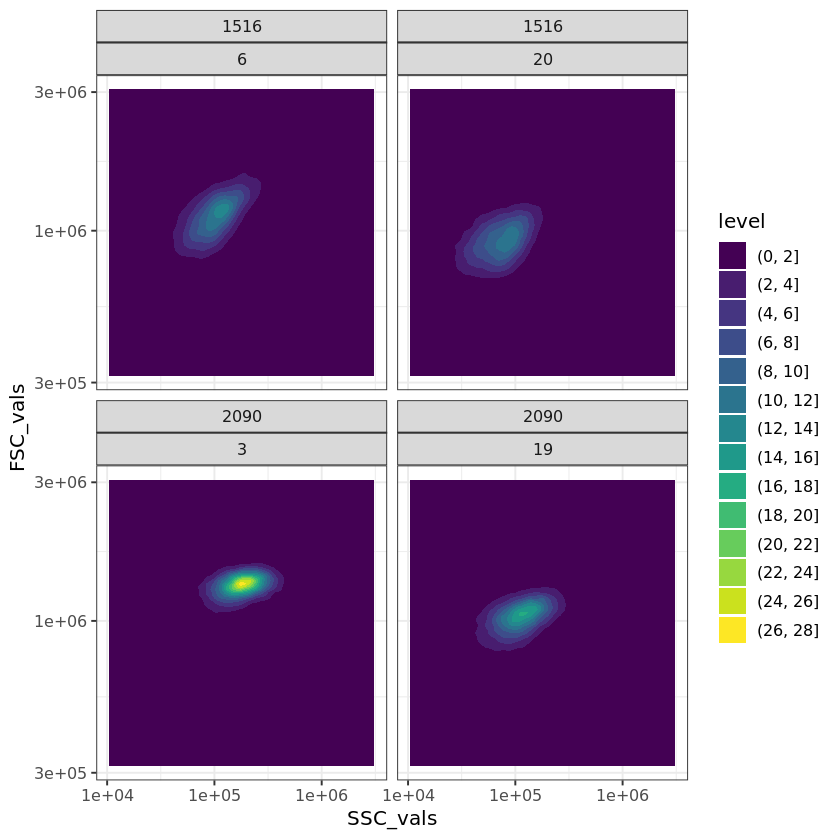

In [560]:
ggplot(ssc_separated%>%dplyr::filter(!is.na(RedB_vals)) %>% 
     dplyr::mutate(RedB_vals=as.numeric(as.character(RedB_vals)),
                   SSC_vals=as.numeric(as.character(SSC_vals)),
                   FSC_vals=as.numeric(as.character(FSC_vals))) %>%
     dplyr::filter(!is.na(RedB_vals)&(RedB_vals!=0)&(SSC_vals!=0)&(!is.na(SSC_vals))&
       (FSC_vals!=0)&(!is.na(FSC_vals))&(GR_Calc_placeholder=="TF")) %>%
     dplyr::filter((log10(RedB_vals) > 5)&(log10(FSC_vals) > 5.5)) %>%dplyr::arrange(desc(RedB_vals)) %>%
    dplyr::filter((Strain%in%c(1516,2090))&(Position%in%c(3,6,19,20))))+
    stat_density2d_filled(aes(x=SSC_vals,y=FSC_vals)) + 
    scale_y_log10() + scale_x_log10() + facet_wrap(~Strain*Position,nrow=2) + theme_bw(base_size=12)

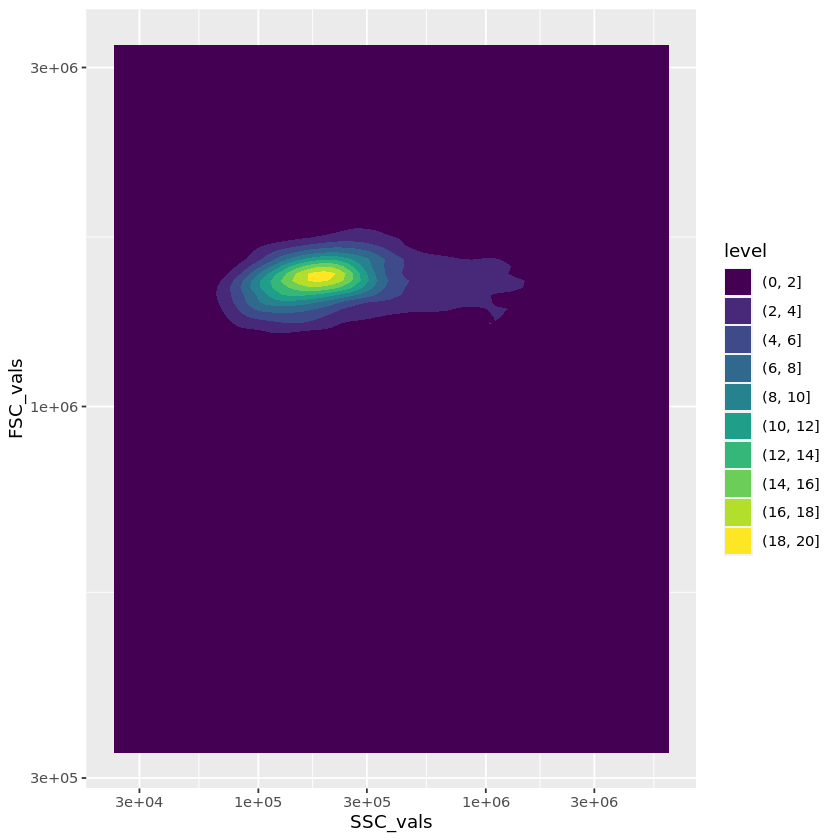

In [555]:
ggplot(ssc_separated%>%dplyr::filter(!is.na(RedB_vals)) %>% 
     dplyr::mutate(RedB_vals=as.numeric(as.character(RedB_vals)),
                   SSC_vals=as.numeric(as.character(SSC_vals)),
                   FSC_vals=as.numeric(as.character(FSC_vals))) %>%
     dplyr::filter(!is.na(RedB_vals)&(RedB_vals!=0)&(SSC_vals!=0)&(!is.na(SSC_vals))&
       (FSC_vals!=0)&(!is.na(FSC_vals))&(GR_Calc_placeholder=="TF")) %>%
     dplyr::filter((log10(RedB_vals) > 5)&(log10(FSC_vals) > 5.5)) %>%dplyr::arrange(desc(RedB_vals)) %>%
    dplyr::filter((Strain==1212)&(Position==6)))+
    stat_density2d_filled(aes(x=SSC_vals,y=FSC_vals)) + 
    scale_y_log10() + scale_x_log10()

In [30]:
scatter_plot = ggplot(ssc_separated%>%dplyr::filter(!is.na(RedB_vals)) %>% 
     dplyr::mutate(RedB_vals=as.numeric(as.character(RedB_vals)),
                   SSC_vals=as.numeric(as.character(SSC_vals)),
                   FSC_vals=as.numeric(as.character(FSC_vals))) %>%
     dplyr::filter(!is.na(RedB_vals)&(RedB_vals!=0)&(SSC_vals!=0)&(!is.na(SSC_vals))&
       (FSC_vals!=0)&(!is.na(FSC_vals))&(GR_Calc_placeholder=="TF")) %>%
     dplyr::filter((log10(RedB_vals) > 5)&(log10(FSC_vals) > 5.5)) %>%dplyr::arrange(desc(RedB_vals)) %>%
     tidyr::pivot_longer(cols=-starts_with(c("Strain","Temperature","Position","GR_Calc_placeholder")),
                         values_to="Scatter",names_to="Type") %>%
     dplyr::mutate(Type=case_when(Type=="RedB_vals" ~ "~Mean chlorophyll",
                                  Type=="FSC_vals" ~ "~Mean cell size",
                                  Type=="SSC_vals" ~ "~Mean cell complexity")))+
    geom_density_ridges(aes(x=Scatter,fill=as.numeric(Temperature),group=paste0(Temperature,Strain),
                            #fill=factor(Temperature,levels=sort(unique(as.numeric(Temperature)))),
                            y=factor(Strain)),alpha=0.5)+ 
                 scale_x_log10() +
    scale_fill_gradient(low="light blue",high="maroon",name="Temperature") + theme_bw(base_size=12) + 
    xlab("laser value") + ylab("Strain") + facet_wrap(~Type,scales="free_x") 

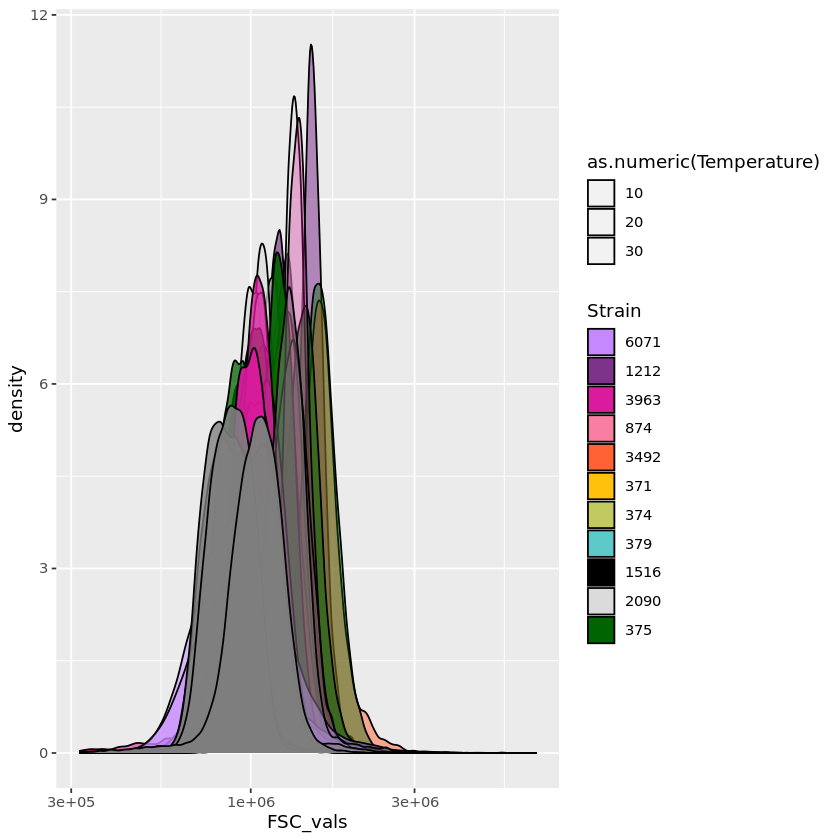

In [33]:
ggplot(ssc_separated%>%dplyr::filter(!is.na(RedB_vals)) %>% 
     dplyr::mutate(RedB_vals=as.numeric(as.character(RedB_vals)),
                   SSC_vals=as.numeric(as.character(SSC_vals)),
                   FSC_vals=as.numeric(as.character(FSC_vals))) %>%
     dplyr::filter(!is.na(RedB_vals)&(RedB_vals!=0)&(SSC_vals!=0)&(!is.na(SSC_vals))&
       (FSC_vals!=0)&(!is.na(FSC_vals))&(GR_Calc_placeholder=="TF")) %>%
     dplyr::filter((log10(RedB_vals) > 5)&(log10(FSC_vals) > 5.5)) %>%dplyr::arrange(desc(RedB_vals)))+
     geom_density(aes(x = FSC_vals, fill=factor(Strain), alpha=as.numeric(Temperature),
                      group=paste0(Strain,Temperature)))+scale_x_log10()+ 
    scale_fill_manual(breaks=as.character((strain_color_frame_harriet %>% 
                                           dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% 
                                                             dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors,name="Strain")

In [37]:
write.csv(ssc_separated,"../../data/ssc_separated.csv")

In [38]:
head(ssc_separated)

Strain Position Temperature SSC_vals        FSC_vals         RedB_vals
1 371    1        6.8         3553.3212890625 11998.9384765625 NA       
2 371    1        6.8         3553.3212890625 11998.9384765625 NA       
3 371    1        6.8         3553.3212890625 11998.9384765625 NA       
4 371    3        9.5         3553.3212890625 11998.9384765625 NA       
5 371    3        9.5         3553.3212890625 11998.9384765625 NA       
6 371    3        9.5         3553.3212890625 11998.9384765625 NA       
  GR_Calc_placeholder
1 T0                 
2 T0                 
3 T0                 
4 T0                 
5 T0                 
6 T0

In [ ]:
ggplot(ssc_separated%>%dplyr::filter(!is.na(RedB_vals)) %>% 
     dplyr::mutate(RedB_vals=as.numeric(as.character(RedB_vals)),
                   SSC_vals=as.numeric(as.character(SSC_vals)),
                   FSC_vals=as.numeric(as.character(FSC_vals))) %>%
     dplyr::filter(!is.na(RedB_vals)&(RedB_vals!=0)&(SSC_vals!=0)&(!is.na(SSC_vals))&
       (FSC_vals!=0)&(!is.na(FSC_vals))&(GR_Calc_placeholder=="TF")) %>%
     dplyr::filter((log10(RedB_vals) > 5)&(log10(FSC_vals) > 5.5)) %>%dplyr::arrange(desc(RedB_vals)))+
     geom_violin(aes(y = FSC_vals, x=factor(Strain),
                     fill=factor(Strain), alpha=as.numeric(Temperature),
                      group=paste0(Strain,Temperature)))+scale_y_log10()+ 
    scale_fill_manual(breaks=as.character((strain_color_frame_harriet %>% 
                                           dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% 
                                                             dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors,name="Strain")

Picking joint bandwidth of 0.0315

Picking joint bandwidth of 0.00865

Picking joint bandwidth of 0.0181



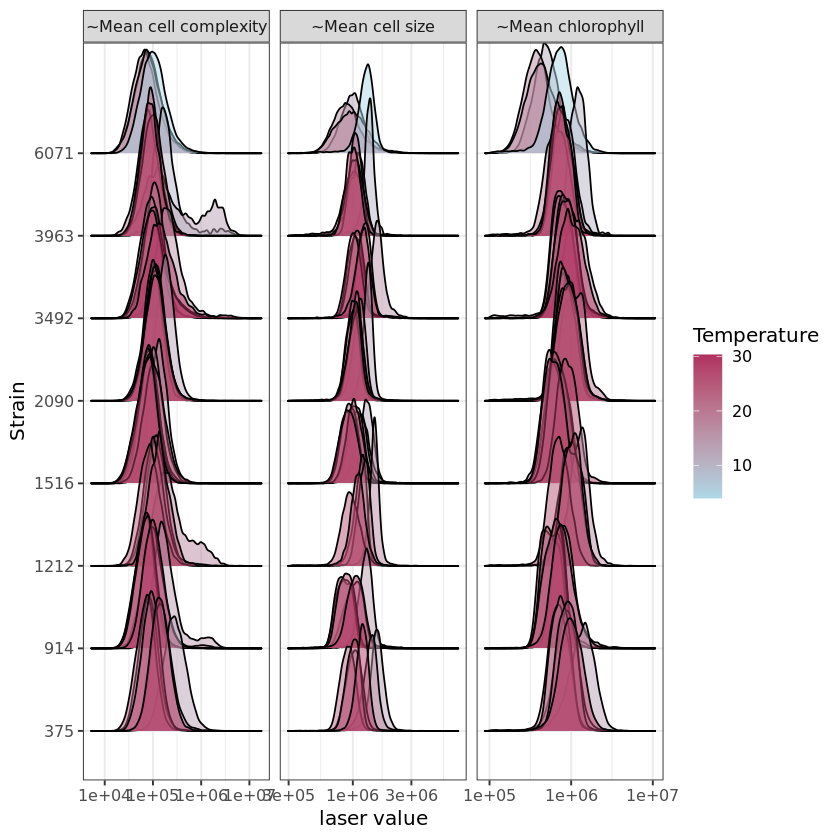

In [31]:
scatter_plot

In [30]:
ggsave(scatter_plot,file="../../figures/Suppl_scatter_vals.pdf")

Saving 6.67 x 6.67 in
image
Picking joint bandwidth of 0.0315

Picking joint bandwidth of 0.00865

Picking joint bandwidth of 0.0181



Picking joint bandwidth of 0.0248

Picking joint bandwidth of 0.0258

Picking joint bandwidth of 0.0352

Picking joint bandwidth of 0.0274

Picking joint bandwidth of 0.0274

Picking joint bandwidth of 0.0331

Picking joint bandwidth of 0.0468

Picking joint bandwidth of 0.0341



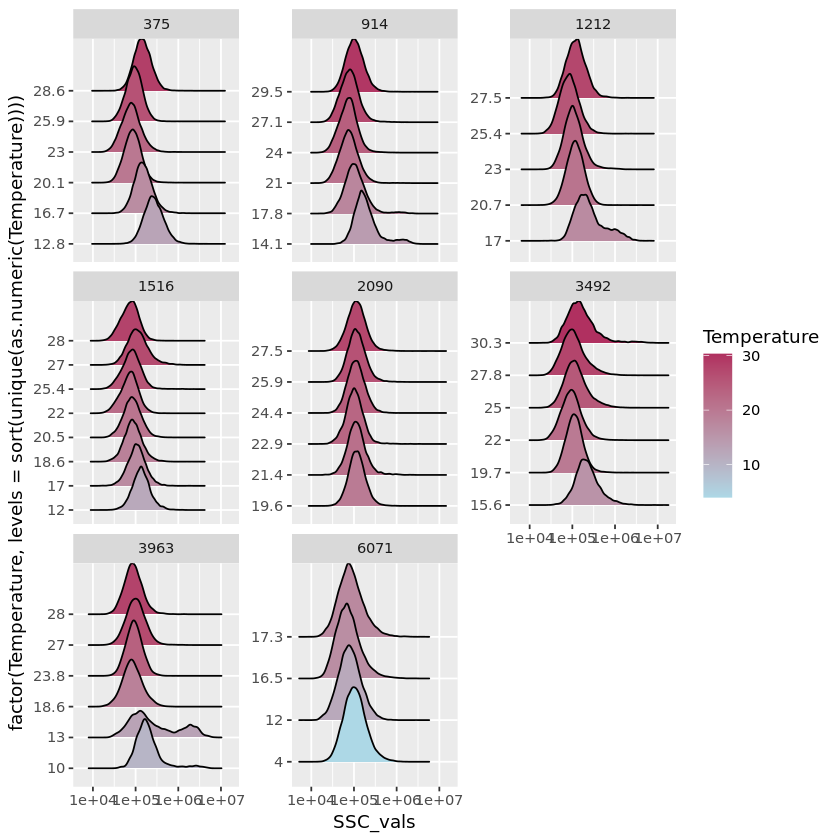

In [360]:
ggplot(ssc_separated%>%dplyr::filter(!is.na(RedB_vals)) %>% 
     dplyr::mutate(RedB_vals=as.numeric(as.character(RedB_vals)),
                   SSC_vals=as.numeric(as.character(SSC_vals)),
                   FSC_vals=as.numeric(as.character(FSC_vals))) %>%
     dplyr::filter(!is.na(RedB_vals)&(RedB_vals!=0)&(SSC_vals!=0)&(!is.na(SSC_vals))&
       (FSC_vals!=0)&(!is.na(FSC_vals))) %>%
     dplyr::filter((log10(RedB_vals) > 5)&(log10(FSC_vals) > 5.5)) %>%dplyr::arrange(desc(RedB_vals)) )+
    geom_density_ridges(aes(x=SSC_vals,y=factor(Temperature,levels=sort(unique(as.numeric(Temperature)))),
                            fill=as.numeric(Temperature)))+ 
                 scale_x_log10() + facet_wrap(~Strain,scales="free_y")+
    scale_fill_gradient(low="light blue",high="maroon",name="Temperature")

Picking joint bandwidth of 0.00689

Picking joint bandwidth of 0.00845

Picking joint bandwidth of 0.00794

Picking joint bandwidth of 0.00922

Picking joint bandwidth of 0.00765

Picking joint bandwidth of 0.00793

Picking joint bandwidth of 0.0103

Picking joint bandwidth of 0.0124



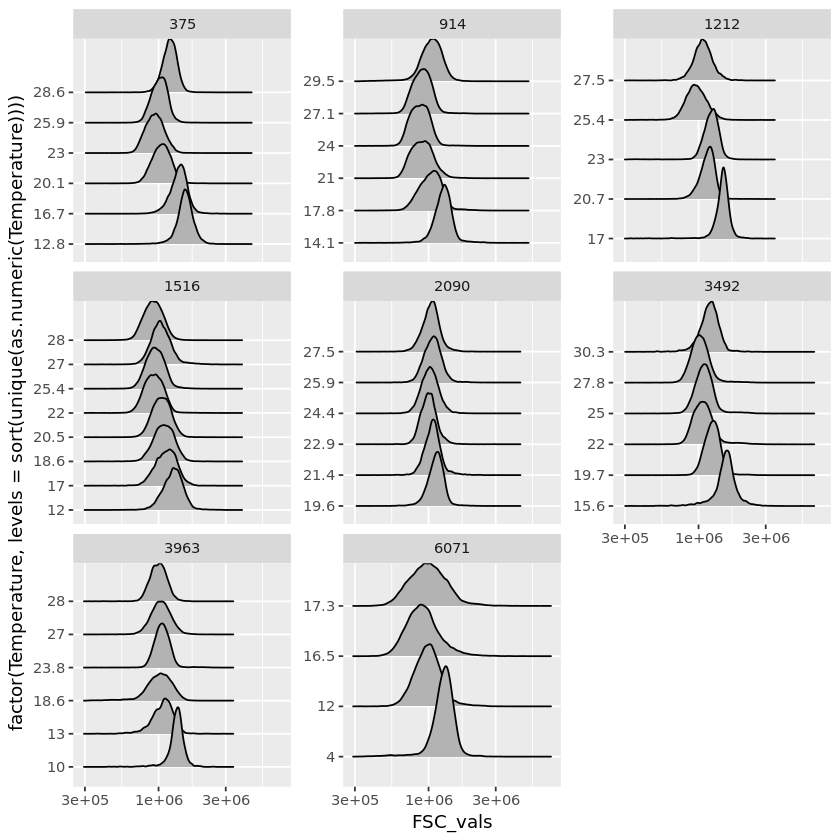

In [305]:
ggplot(fsc_separated%>%dplyr::filter(!is.na(RedB_vals)) %>% 
     dplyr::mutate(RedB_vals=as.numeric(as.character(RedB_vals)),
                   FSC_vals=as.numeric(as.character(FSC_vals))) %>%
     dplyr::filter(!is.na(RedB_vals)&(RedB_vals!=0)&
       (FSC_vals!=0)&(!is.na(FSC_vals))) %>%
     dplyr::filter((log10(RedB_vals) > 5)&(log10(FSC_vals) > 5.5))%>%dplyr::arrange(desc(RedB_vals)))+
    geom_density_ridges(aes(x=FSC_vals,y=factor(Temperature,levels=sort(unique(as.numeric(Temperature))))))+ 
                 scale_x_log10() + facet_wrap(~Strain,scales="free_y")

Scale for x is already present.
Adding another scale for x, which will
replace the existing scale.
Picking joint bandwidth of 0.0305

Picking joint bandwidth of 0.0328

Picking joint bandwidth of 0.05

Picking joint bandwidth of 0.0393

Picking joint bandwidth of 0.0392

Picking joint bandwidth of 0.0431

Picking joint bandwidth of 0.0651

Picking joint bandwidth of 0.0463



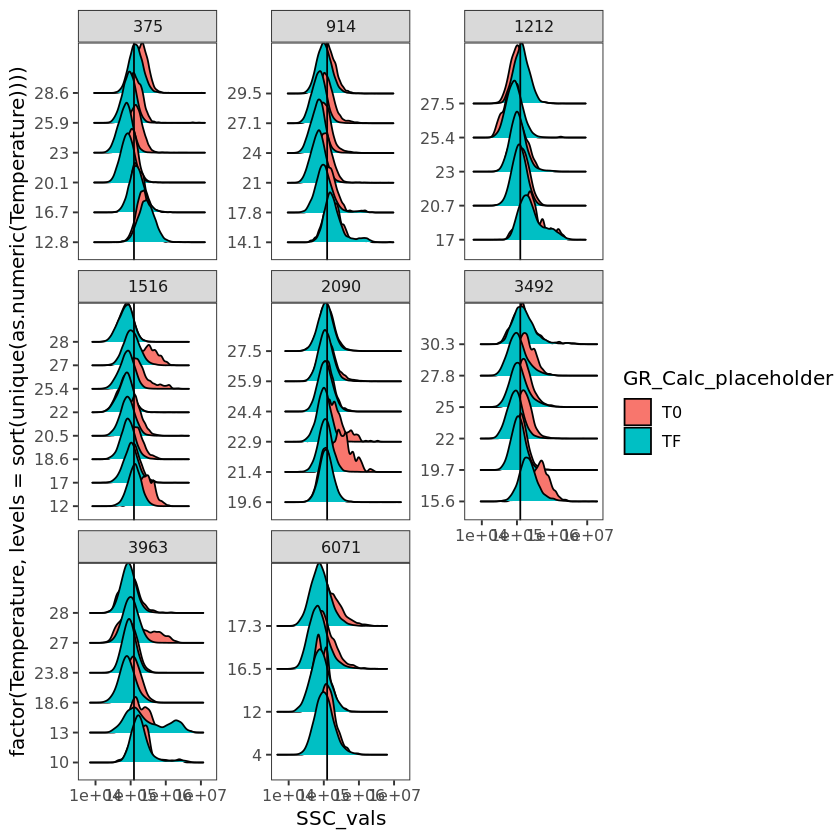

In [326]:
ggplot(ssc_separated%>%dplyr::filter(!is.na(RedB_vals)) %>% 
     dplyr::mutate(RedB_vals=as.numeric(as.character(RedB_vals)),
                   SSC_vals=as.numeric(as.character(SSC_vals)),
                   FSC_vals=as.numeric(as.character(FSC_vals))) %>%
     dplyr::filter(!is.na(RedB_vals)&(RedB_vals!=0)&
       (SSC_vals!=0)&(!is.na(SSC_vals))&(FSC_vals!=0)&(!is.na(FSC_vals))) %>%
     dplyr::filter((log10(RedB_vals) > 5)&(log10(FSC_vals) > 5.5))%>%dplyr::arrange(desc(RedB_vals)))+
    geom_density_ridges(aes(x=SSC_vals,y=factor(Temperature,levels=sort(unique(as.numeric(Temperature)))),
                            group=paste0(GR_Calc_placeholder,Temperature),
                            fill=GR_Calc_placeholder))+ 
                 scale_x_log10() + facet_wrap(~Strain,scales="free_y")+ 
    geom_vline(aes(xintercept=mean(SSC_vals,na.rm=TRUE)))+ 
                 scale_x_log10() + facet_wrap(~Strain,scales="free_y")+ 
    theme_test(base_size=12)

Scale for x is already present.
Adding another scale for x, which will
replace the existing scale.
Picking joint bandwidth of 0.0365



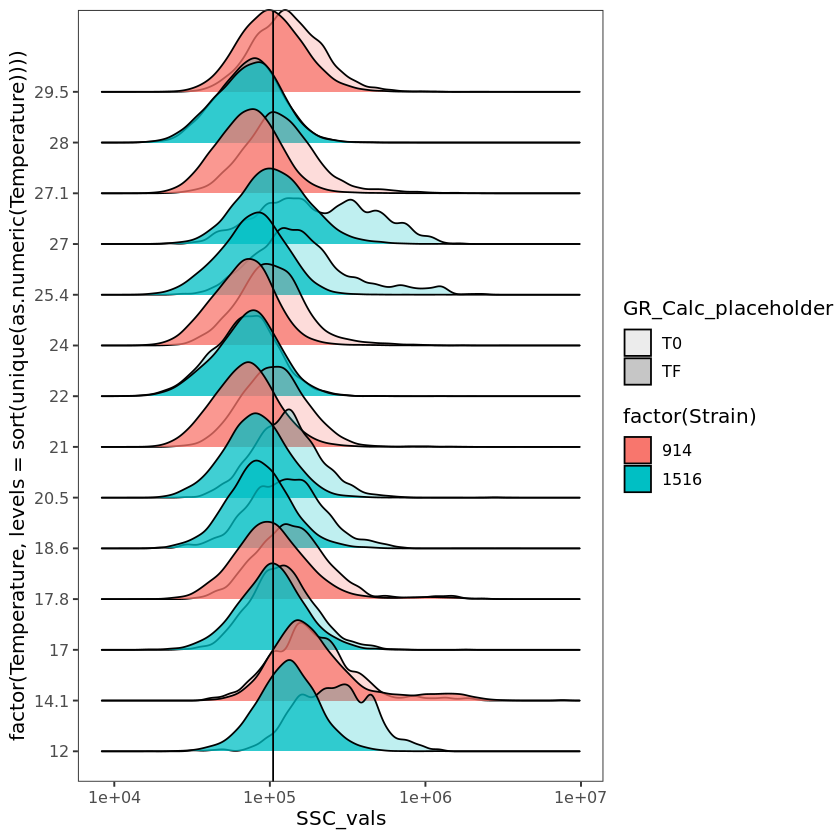

In [340]:
ggplot(ssc_separated%>%dplyr::filter(!is.na(RedB_vals)) %>% dplyr::filter(Strain%in%c(914,1516)) %>% 
     dplyr::mutate(RedB_vals=as.numeric(as.character(RedB_vals)),
                   SSC_vals=as.numeric(as.character(SSC_vals)),
                   FSC_vals=as.numeric(as.character(FSC_vals))) %>%
     dplyr::filter(!is.na(RedB_vals)&(RedB_vals!=0)&
       (SSC_vals!=0)&(!is.na(SSC_vals))&(FSC_vals!=0)&(!is.na(FSC_vals))) %>%
     dplyr::filter((log10(RedB_vals) > 5)&(log10(FSC_vals) > 5.5))%>%dplyr::arrange(desc(RedB_vals)))+
    geom_density_ridges(aes(x=SSC_vals,y=factor(Temperature,levels=sort(unique(as.numeric(Temperature)))),
                            group=paste0(GR_Calc_placeholder,Temperature),
                            fill=factor(Strain),alpha=GR_Calc_placeholder))+ 
                 scale_x_log10() + 
    geom_vline(aes(xintercept=mean(SSC_vals,na.rm=TRUE)))+ 
                 scale_x_log10() +
    theme_test(base_size=12)+scale_alpha_manual(values=c(0.25,0.75))

Scale for x is already present.
Adding another scale for x, which will
replace the existing scale.
Picking joint bandwidth of 0.0113



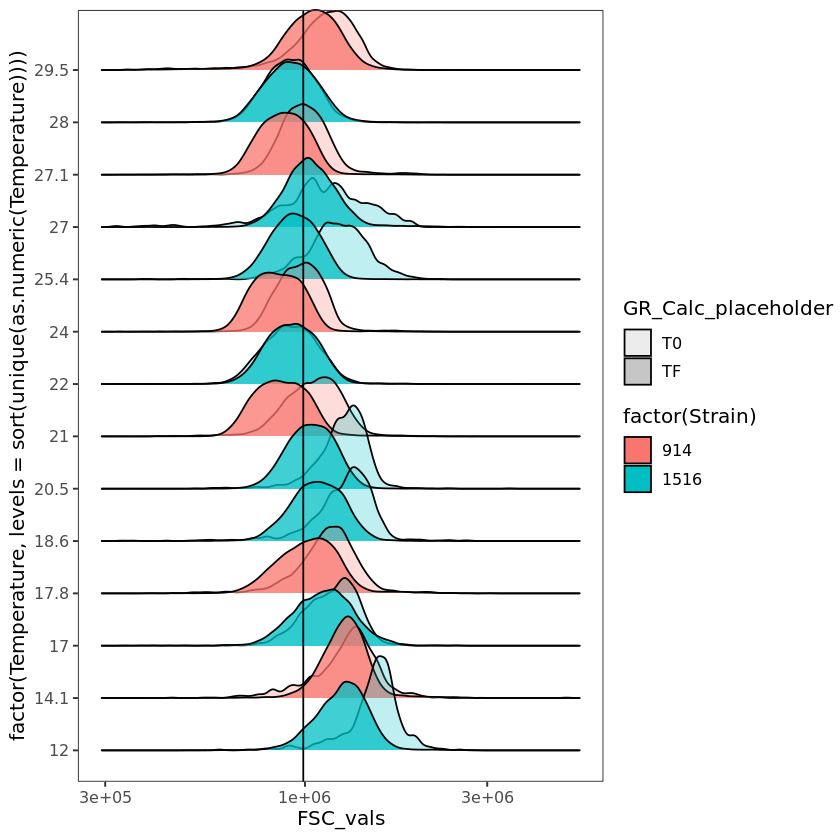

In [346]:
ggplot(fsc_separated%>%dplyr::filter(!is.na(RedB_vals)) %>% dplyr::filter(Strain%in%c(914,1516)) %>% 
     dplyr::mutate(RedB_vals=as.numeric(as.character(RedB_vals)),
                   FSC_vals=as.numeric(as.character(FSC_vals))) %>%
     dplyr::filter(!is.na(RedB_vals)&(RedB_vals!=0)&(FSC_vals!=0)&(!is.na(FSC_vals))) %>%
     dplyr::filter((log10(RedB_vals) > 5)&(log10(FSC_vals) > 5.5))%>%dplyr::arrange(desc(RedB_vals)))+
    geom_density_ridges(aes(x=FSC_vals,y=factor(Temperature,levels=sort(unique(as.numeric(Temperature)))),
                            group=paste0(GR_Calc_placeholder,Temperature),
                            fill=factor(Strain),alpha=GR_Calc_placeholder))+ 
                 scale_x_log10() + 
    geom_vline(aes(xintercept=mean(FSC_vals,na.rm=TRUE)))+ 
                 scale_x_log10() +
    theme_test(base_size=12)+scale_alpha_manual(values=c(0.25,0.75))

In [349]:
fsc_separated%>%dplyr::filter(!is.na(RedB_vals)) %>% dplyr::filter(Strain%in%c(1212,1516)) %>% 
     dplyr::mutate(RedB_vals=as.numeric(as.character(RedB_vals)),
                   FSC_vals=as.numeric(as.character(FSC_vals))) %>%
     dplyr::filter(!is.na(RedB_vals)&(RedB_vals!=0)&(FSC_vals!=0)&(!is.na(FSC_vals))) %>%
     dplyr::filter((log10(RedB_vals) > 5)&(log10(FSC_vals) > 5.5))%>%dplyr::arrange(desc(RedB_vals))%>%
    dplyr::distinct(Strain,Temperature)

Strain Temperature
1  1212   17.0       
2  1516   27.0       
3  1516   22.0       
4  1212   27.5       
5  1516   18.6       
6  1212   23.0       
7  1516   20.5       
8  1212   20.7       
9  1516   28.0       
10 1516   12.0       
11 1516   17.0       
12 1212   25.4       
13 1516   25.4

Scale for x is already present.
Adding another scale for x, which will
replace the existing scale.
Picking joint bandwidth of 0.0116



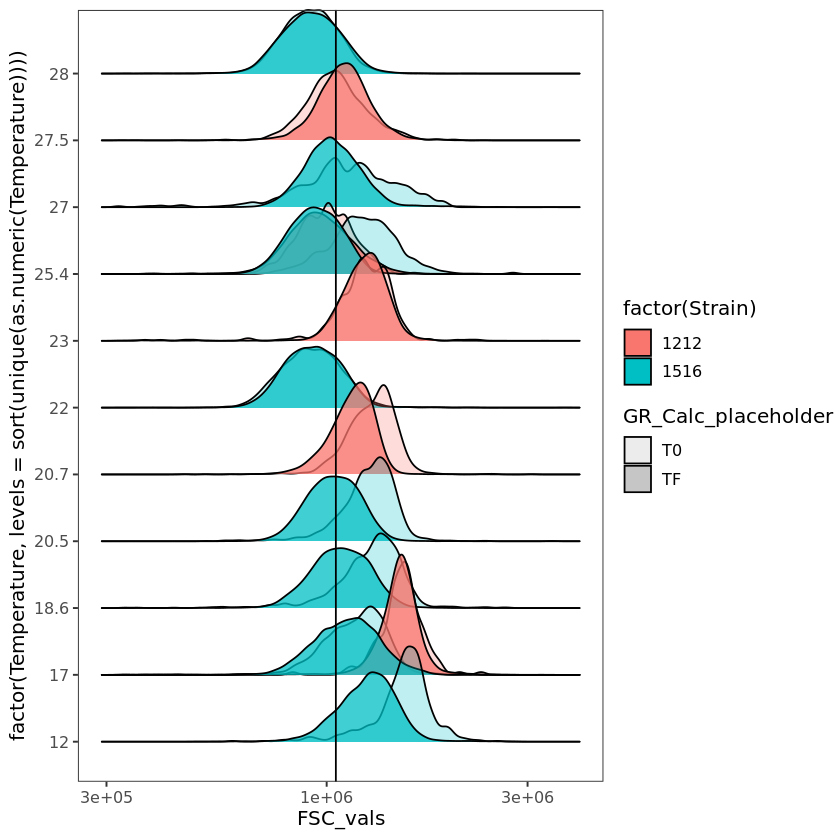

In [352]:
ggplot(fsc_separated%>%dplyr::filter(!is.na(RedB_vals)) %>% dplyr::filter(Strain%in%c(1212,1516)) %>% 
     dplyr::mutate(RedB_vals=as.numeric(as.character(RedB_vals)),
                   FSC_vals=as.numeric(as.character(FSC_vals))) %>%
     dplyr::filter(!is.na(RedB_vals)&(RedB_vals!=0)&(FSC_vals!=0)&(!is.na(FSC_vals))) %>%
     dplyr::filter((log10(RedB_vals) > 5)&(log10(FSC_vals) > 5.5))%>%dplyr::arrange(desc(RedB_vals)))+
    geom_density_ridges(aes(x=FSC_vals,y=factor(Temperature,levels=sort(unique(as.numeric(Temperature)))),
                            group=paste0(GR_Calc_placeholder,Temperature,Strain),
                            fill=factor(Strain),alpha=GR_Calc_placeholder))+ 
                 scale_x_log10() + 
    geom_vline(aes(xintercept=mean(FSC_vals,na.rm=TRUE)))+ 
                 scale_x_log10() +
    theme_test(base_size=12)+scale_alpha_manual(values=c(0.25,0.75))

Scale for x is already present.
Adding another scale for x, which will
replace the existing scale.
Picking joint bandwidth of 0.0112



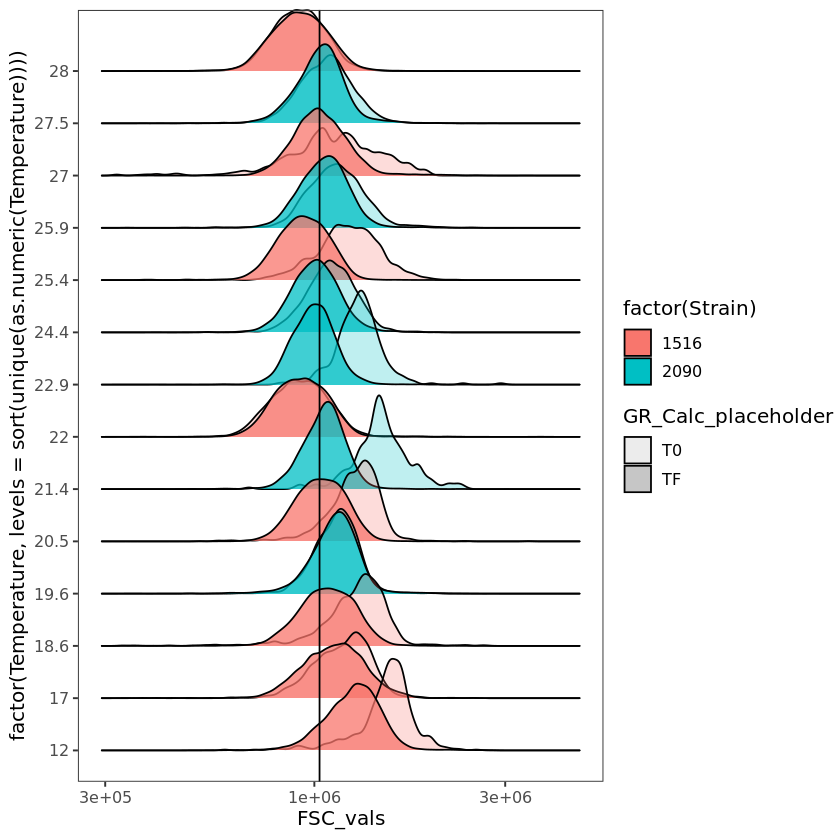

In [355]:
ggplot(fsc_separated%>%dplyr::filter(!is.na(RedB_vals)) %>% dplyr::filter(Strain%in%c(2090,1516)) %>% 
     dplyr::mutate(RedB_vals=as.numeric(as.character(RedB_vals)),
                   FSC_vals=as.numeric(as.character(FSC_vals))) %>%
     dplyr::filter(!is.na(RedB_vals)&(RedB_vals!=0)&(FSC_vals!=0)&(!is.na(FSC_vals))) %>%
     dplyr::filter((log10(RedB_vals) > 5)&(log10(FSC_vals) > 5.5))%>%dplyr::arrange(desc(RedB_vals)))+
    geom_density_ridges(aes(x=FSC_vals,y=factor(Temperature,levels=sort(unique(as.numeric(Temperature)))),
                            group=paste0(GR_Calc_placeholder,Temperature,Strain),
                            fill=factor(Strain),alpha=GR_Calc_placeholder))+ 
                 scale_x_log10() + 
    geom_vline(aes(xintercept=mean(FSC_vals,na.rm=TRUE)))+ 
                 scale_x_log10() +
    theme_test(base_size=12)+scale_alpha_manual(values=c(0.25,0.75))

Scale for x is already present.
Adding another scale for x, which will
replace the existing scale.
Picking joint bandwidth of 0.00791

Picking joint bandwidth of 0.0104

Picking joint bandwidth of 0.0112

Picking joint bandwidth of 0.0119

Picking joint bandwidth of 0.0101

Picking joint bandwidth of 0.00953

Picking joint bandwidth of 0.0146

Picking joint bandwidth of 0.0171



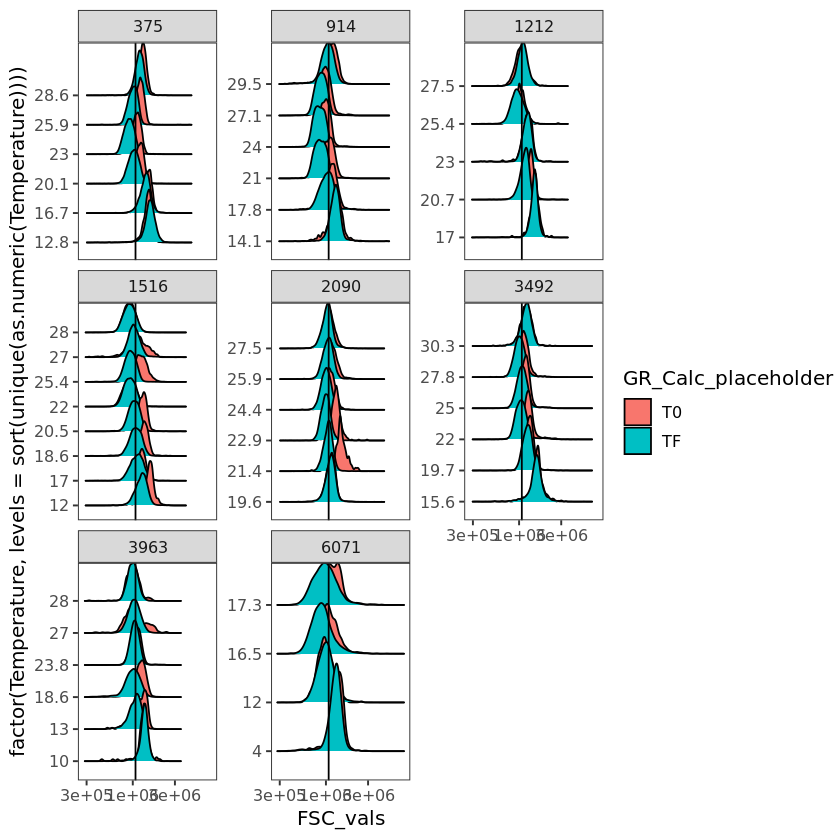

In [327]:
ggplot(fsc_separated%>%dplyr::filter(!is.na(RedB_vals)) %>% 
     dplyr::mutate(RedB_vals=as.numeric(as.character(RedB_vals)),
                   FSC_vals=as.numeric(as.character(FSC_vals))) %>%
     dplyr::filter(!is.na(RedB_vals)&(RedB_vals!=0)&
       (FSC_vals!=0)&(!is.na(FSC_vals))) %>%
     dplyr::filter((log10(RedB_vals) > 5)&(log10(FSC_vals) > 5.5))%>%dplyr::arrange(desc(RedB_vals)))+
    geom_density_ridges(aes(x=FSC_vals,y=factor(Temperature,levels=sort(unique(as.numeric(Temperature)))),
                            group=paste0(GR_Calc_placeholder,Temperature),
                            fill=GR_Calc_placeholder))+ 
                 scale_x_log10() + facet_wrap(~Strain,scales="free_y")+ 
    geom_vline(aes(xintercept=mean(FSC_vals,na.rm=TRUE)))+ 
                 scale_x_log10() + facet_wrap(~Strain,scales="free_y")+ 
    theme_test(base_size=12)

Picking joint bandwidth of 0.0198

Picking joint bandwidth of 0.0192

Picking joint bandwidth of 0.0271

Picking joint bandwidth of 0.0247

Picking joint bandwidth of 0.0256

Picking joint bandwidth of 0.0244

Picking joint bandwidth of 0.0306

Picking joint bandwidth of 0.0276



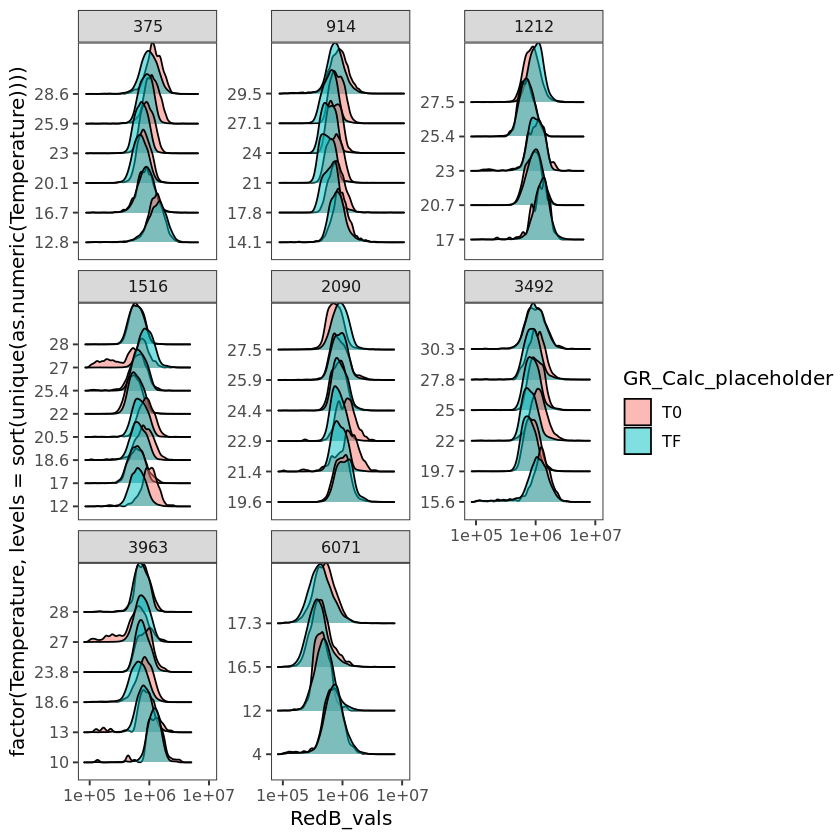

In [316]:
ggplot(fsc_separated%>%dplyr::filter(!is.na(RedB_vals)) %>% 
     dplyr::mutate(RedB_vals=as.numeric(as.character(RedB_vals)),
                   FSC_vals=as.numeric(as.character(FSC_vals))) %>%
     dplyr::filter(!is.na(RedB_vals)&(RedB_vals!=0)&
       (FSC_vals!=0)&(!is.na(FSC_vals))) %>%
     dplyr::filter((log10(RedB_vals) > 5)&(log10(FSC_vals) > 5.5))%>%dplyr::arrange(desc(RedB_vals)))+
    geom_density_ridges(aes(x=RedB_vals,y=factor(Temperature,
                                                 levels=sort(unique(as.numeric(Temperature)))),
                            group=paste0(GR_Calc_placeholder,Temperature),
                            fill=GR_Calc_placeholder),
                        alpha=0.5)+ 
                 scale_x_log10() + facet_wrap(~Strain,scales="free_y") + 
    theme_test(base_size=12)

### Workflow for parameter estimation

1. Fit curve with maximum likelihood
2. Perform optimization on resulting curve to find x-value of maximum to identify thermal optimum
3. Calculate x-intercepts of curves to identify thermal interval

Warning message:
“There was 1 warning in `dplyr::mutate()`.
ℹ In argument: `Position = as.numeric(Position)`.
Caused by warning:
! NAs introduced by coercion”
Warning message:
“There was 1 warning in `dplyr::mutate()`.
ℹ In argument: `Position = as.numeric(Position)`.
Caused by warning:
! NAs introduced by coercion”
Warning message in dplyr::left_join(., final_conc, by = c(Date = "FirstLogDate", :
“Detected an unexpected many-to-many relationship
between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 2 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set
  `relationship = "many-to-many"` to silence this
  warning.”
Joining with `by = join_by(Position)`
Warning message in dplyr::left_join(., final_conc_post, by = c(Date = "FirstLogDate", :
“Detected an unexpected many-to-many relationship
between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 49 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is ex

[1] 21.5
[1] 15
[1] 374
[1] "^guesses"
[1] "10000Best guess"
[1] 0.07130089
[1] "^b"
  [1]  -0.202176600  -0.197043954  -0.148765319  -0.146095924  -0.125227786
  [6]  -0.108659602  -0.088376512  -0.085800414  -0.055764211  -0.025703243
 [11]  -0.010975414  -0.008824981   0.047615463   0.048776187   0.051310746
 [16]   0.066286015   0.073237754   0.103787468   0.164754124   0.216260605
 [21]   0.240615768   0.286636098   0.310353927   0.342239050   0.347143443
 [26]   0.370561718   0.371480710   0.394126928   0.428452184   0.432059051
 [31]   0.432781671   0.510425868   0.550114883   0.567933356   0.583922376
 [36]   0.595681650   0.598634236   0.609903824   0.610426345   0.613018611
 [41]   0.619652721   0.622354950   0.623385416   0.625382527   0.625938766
 [46]   0.623413315   0.619748153   0.573463521   0.557781473   0.543651219
 [51]   0.542349329   0.541970565   0.536952539   0.533267374   0.531959761
 [56]   0.512920616   0.484245815   0.466643729   0.462114674   0.359831795
 [6

Warning message in rnorm(10000, mean = gr, sd = sd_gr * sqrt((nrow(growth_rates) - :
“NAs produced”


[1] "10000Best guess"
[1] 0.008870916
[1] "^b"
  [1] -0.709547481 -0.561976233 -0.545920822 -0.431237599 -0.399646239
  [6] -0.331013122 -0.292772087 -0.276782282 -0.230763155 -0.116809246
 [11] -0.111698625 -0.085303497 -0.033097421  0.002795114  0.019774008
 [16]  0.033217716  0.047824738  0.073203095  0.121389447  0.160828591
 [21]  0.175353608  0.255463370  0.273949402  0.326661002  0.383961247
 [26]  0.446790233  0.471551242  0.479446852  0.487960036  0.511126714
 [31]  0.538044193  0.550965851  0.587238894  0.626786976  0.637532099
 [36]  0.648480941  0.682025759  0.693001437  0.725674410  0.737003826
 [41]  0.755004696  0.767032877  0.769715900  0.774999210  0.808612228
 [46]  0.818146125  0.820767429  0.840239962  0.850458629  0.858657495
 [51]  0.859316480  0.860279535  0.859851174  0.832819554  0.829787836
 [56]  0.824397940  0.809266385  0.798708503  0.766960632  0.752699917
 [61]  0.752231595  0.745587236  0.688227715  0.668751312  0.457823519
 [66]  0.450676345  0.42090416

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.03305574
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


  [1] -1.54061370 -1.53172836 -1.50757530 -1.49374836 -1.48773589 -1.45446397
  [7] -1.39626159 -1.32560066 -1.29306212 -1.27287334 -1.22537845 -1.18975418
 [13] -1.09326183 -1.06896954 -1.06302646 -0.95845431 -0.92982880 -0.87652418
 [19] -0.85004491 -0.83440089 -0.71775015 -0.60628361 -0.56347939 -0.35953730
 [25] -0.28566208 -0.26484142 -0.24242082 -0.19372854 -0.18812805 -0.18181551
 [31] -0.16925676 -0.16688554 -0.09223316 -0.05414969 -0.01159241  0.07110226
 [37]  0.11634061  0.12728111  0.19643151  0.20620044  0.21915647  0.24766626
 [43]  0.26695763  0.40248857  0.45208122  0.47003153  0.59857163  0.60444750
 [49]  0.61280542  0.71728163  0.75384581  0.80006690  0.80342927  0.81705842
 [55]  0.83129033  0.84115925  0.84602203  0.86475045  0.86830646  0.88266051
 [61]  0.89860908  0.91702581  0.93135285  0.93298378  0.93598137  0.93618585
 [67]  0.93839218  0.93923631  0.94077258  0.94306293  0.94425696  0.94479064
 [73]  0.94509211  0.94498032  0.94325428  0.94277268  0.9421533

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 1516
[1] 25.4
[1] 15
[1] 1516
[1] "^guesses"
[1] "10000Best guess"
[1] 0.06617108
[1] "^b"
  [1] -0.279214752 -0.268797575 -0.241956994 -0.238217889 -0.236405120
  [6] -0.231407843 -0.227752824 -0.223461422 -0.208930048 -0.170117439
 [11] -0.134046289 -0.104551913 -0.103415828 -0.090202352 -0.040758552
 [16] -0.038646387 -0.027598015 -0.022759490 -0.013188861  0.005928026
 [21]  0.166037447  0.200233545  0.223397992  0.259835733  0.274437853
 [26]  0.340160211  0.378670657  0.381463977  0.406442567  0.409897382
 [31]  0.414118206  0.444660239  0.472895104  0.486144927  0.515477214
 [36]  0.561679949  0.576060987  0.623865379  0.645932208  0.648697649
 [41]  0.648955211  0.673389353  0.683133899  0.710174107  0.725808380
 [46]  0.741228831  0.777811688  0.780270158  0.784832993  0.795716153
 [51]  0.851411455  0.854930627  0.905145742  0.914906768  0.923672556
 [56]  0.924444823  0.927312263  0.935723231  1.011821745  1.026489669
 [61]  1.043036203  1.047621700  1.062931154  1.06311

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.06370809
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


  [1] -1.111312e+00 -1.052808e+00 -1.033851e+00 -9.406498e-01 -9.296677e-01
  [6] -9.168355e-01 -8.866316e-01 -8.592366e-01 -7.884782e-01 -7.859923e-01
 [11] -7.525370e-01 -7.360097e-01 -7.042570e-01 -6.919915e-01 -6.518477e-01
 [16] -4.691975e-01 -4.618236e-01 -4.214084e-01 -3.665587e-01 -3.503805e-01
 [21] -2.976699e-01 -2.769140e-01 -7.897964e-02 -4.674313e-04  6.257359e-02
 [26]  1.084765e-01  1.109939e-01  1.281636e-01  1.364413e-01  1.595774e-01
 [31]  1.713920e-01  2.064994e-01  2.916883e-01  3.995468e-01  4.202860e-01
 [36]  4.739030e-01  4.859368e-01  5.778212e-01  5.943199e-01  6.360538e-01
 [41]  7.489556e-01  7.574702e-01  7.673524e-01  7.830369e-01  7.965124e-01
 [46]  8.133588e-01  8.189045e-01  8.636895e-01  8.732465e-01  8.802592e-01
 [51]  8.837694e-01  8.925022e-01  9.579873e-01  9.645379e-01  9.689926e-01
 [56]  9.683520e-01  9.678299e-01  9.599712e-01  9.568886e-01  9.429503e-01
 [61]  9.226398e-01  9.126016e-01  9.063606e-01  8.970169e-01  8.563838e-01
 [66]  7.729

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 371


Warning message:
“Values from `concpivot` are not uniquely identified;
output will contain list-cols.
• Use `values_fn = list` to suppress this warning.
• Use `values_fn = {summary_fun}` to summarise
  duplicates.
• Use the following dplyr code to identify
  duplicates.
  {data} %>%
  dplyr::group_by(Strain, Position, Temperature,
  Rep, Transfer, GR_Calc_placeholder) %>%
  dplyr::summarise(n = dplyr::n(), .groups = "drop")
  %>%
  dplyr::filter(n > 1L)”
Warning message:
“Expected 2 pieces. Additional pieces discarded in 1
rows [14].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA`
in 6 rows [1, 2, 3, 4, 5, 6].”
Warning message:
“Expected 2 pieces. Additional pieces discarded in 1
rows [8].”
Warning message:
“There were 2 warnings in `dplyr::mutate()`.
The first warning was:
ℹ In argument: `TF = as.numeric(TF)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1
  remaining warning.”


[1] 23.8
[1] 15
[1] 371
[1] "^guesses"
[1] "10000Best guess"
[1] 0.03217273
[1] "^b"
  [1] -1.52590999 -1.51106897 -1.37978466 -1.26459276 -1.18816728 -1.12442831
  [7] -1.10312127 -1.04397481 -0.96488575 -0.91183841 -0.87766806 -0.87034591
 [13] -0.86165419 -0.74747109 -0.72077441 -0.71533697 -0.66752082 -0.56920787
 [19] -0.53653805 -0.49128387 -0.42528130 -0.40419208 -0.38790792 -0.37044250
 [25] -0.15541590 -0.08012106 -0.06211803 -0.04465860 -0.01654346  0.01334418
 [31]  0.02119530  0.04493745  0.08822648  0.11988735  0.12583651  0.18585975
 [37]  0.19120493  0.21723083  0.24175164  0.27293109  0.46845543  0.52825815
 [43]  0.53406406  0.68638457  0.68805955  0.69208915  0.71035647  0.76489233
 [49]  0.79299209  0.89400368  0.89904744  0.92895161  0.94047309  0.94543400
 [55]  1.00020076  1.00709955  1.02074038  1.03389789  1.05214808  1.07061463
 [61]  1.07215362  1.07243068  1.07258616  1.07247280  1.07068562  1.06947154
 [67]  1.06020719  1.05586173  1.05459860  1.05333840  1.

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.05185815
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


  [1]   0.08886667   0.10156466   0.13512075   0.13856605   0.18057003
  [6]   0.18408832   0.19542501   0.32163145   0.32192151   0.33572596
 [11]   0.36824472   0.37498861   0.38065276   0.40739421   0.42923368
 [16]   0.45654072   0.47008799   0.49790844   0.49849957   0.50412765
 [21]   0.53745589   0.54340548   0.55264449   0.55843193   0.55896982
 [26]   0.56127732   0.56410138   0.60005705   0.60662664   0.61633827
 [31]   0.61893292   0.63719600   0.64013347   0.65385996   0.65747345
 [36]   0.65894279   0.65925339   0.66315459   0.65916716   0.65904002
 [41]   0.61416653   0.60804876   0.60019014   0.54340923   0.47836331
 [46]   0.45121503   0.37866466   0.32380897   0.29325402   0.16751544
 [51]   0.08282440   0.05597049   0.05443726   0.03874568  -0.02732634
 [56]  -0.09614235  -0.19255477  -0.22446460  -0.37445216  -0.73634722
 [61]  -0.84001406  -0.96312453  -0.98996801  -0.99866946  -1.04422077
 [66]  -1.18709564  -1.19468239  -1.58903253  -2.08148834  -2.43677873
 [71] 

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 914
[1] 21
[1] 15
[1] 914
[1] "^guesses"
[1] "10000Best guess"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.04397239
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


  [1] -0.97197277 -0.94833730 -0.93844737 -0.89966663 -0.89164224 -0.81208840
  [7] -0.73937240 -0.68543035 -0.68461674 -0.68333363 -0.63728980 -0.60139211
 [13] -0.52992162 -0.37129603 -0.36227056 -0.31956177 -0.29596689 -0.27354231
 [19] -0.25397162 -0.20062815 -0.16086566 -0.11744390 -0.07896852 -0.07724036
 [25]  0.09953434  0.13234917  0.17295123  0.19507576  0.33968916  0.34802611
 [31]  0.42210347  0.45544621  0.46604477  0.52679306  0.54986072  0.69004321
 [37]  0.73812452  0.74999068  0.76103452  0.81002168  0.87281427  0.90028501
 [43]  0.90060961  0.92912820  0.94083925  0.96278985  0.96767490  1.00778185
 [49]  1.03147927  1.06147985  1.06229442  1.06438656  1.06457100  1.06481841
 [55]  1.06650553  1.05743770  1.05177301  1.03895867  1.03712267  1.02847954
 [61]  1.01514188  0.99797660  0.87491215  0.86726192  0.80395105  0.69106156
 [67]  0.68068108  0.64259841  0.61838959  0.51002258  0.49345035  0.47612513
 [73]  0.40712261  0.29124250  0.14777278  0.12085447 -0.0919945

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


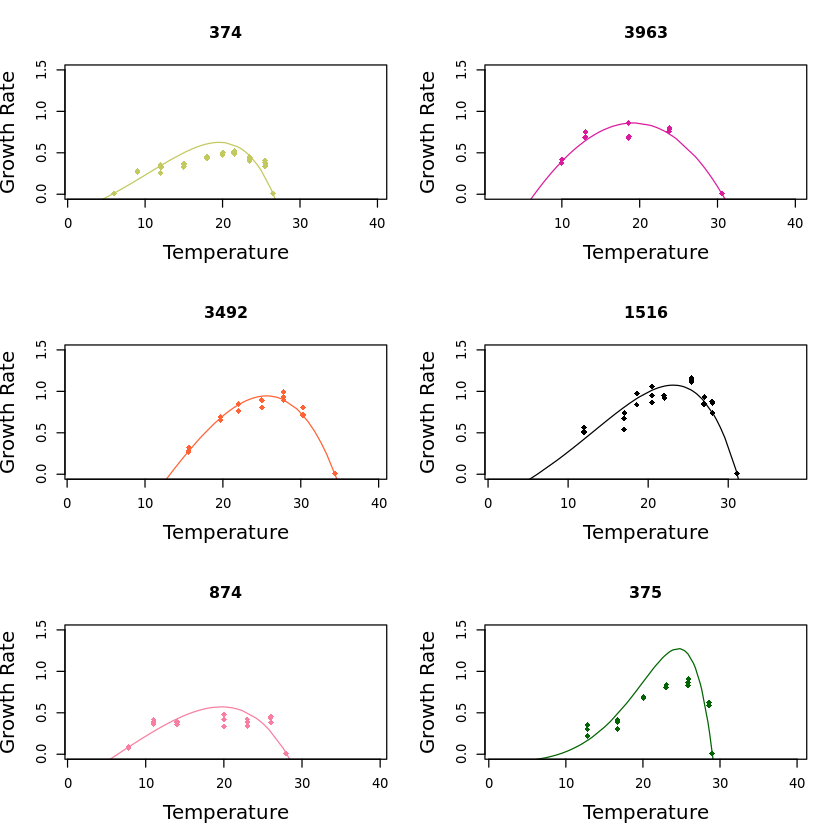

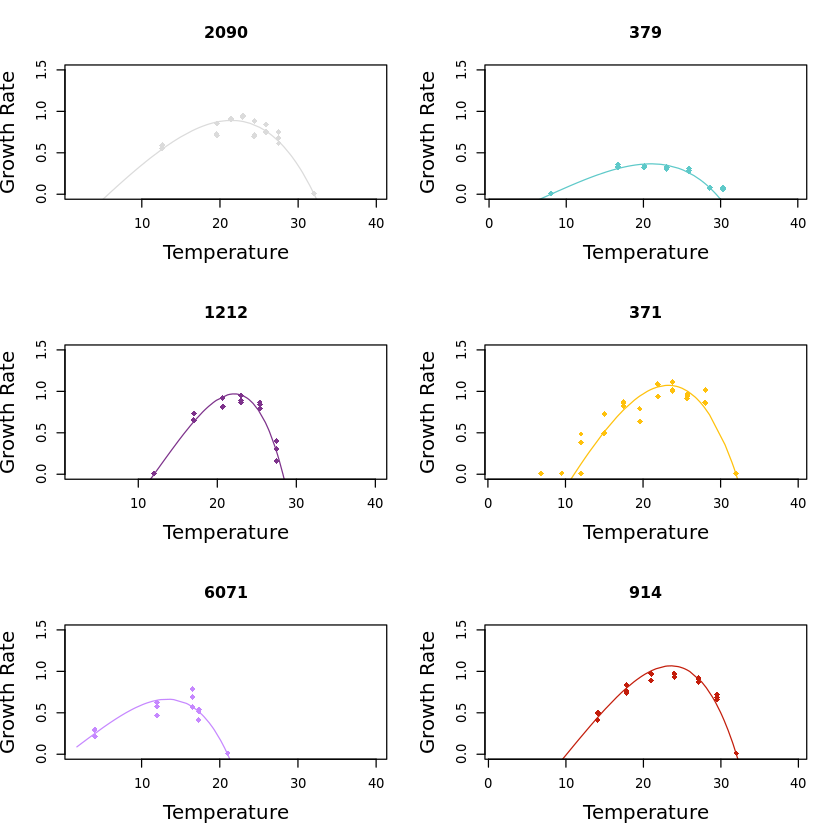

In [5]:
#### FUNCTIONS ####

nbcurve <- function(x,opt,w,a,b){
  res<-a*exp(b*x)*(1-((x-opt)/(w/2))^2)
  res
}

LL1 <- function (y, x, a, b, w, o){
    N = nbcurve(x=x,a=a,b=b,w=w,opt=o)
    N[N<=0]=0.01
    N=log(N) # eliminate missing data from loglikelihood
    y=log(y)
    return(-sum(dnorm(y,N,log = TRUE))) # the negative log likelihoods: the order of N and y don't matter)
}

strain_color_frame_harriet = data.frame("Strains_full"=c("RCC6856","RCC6071","RCC1212","RCC3963",
                                                   "RCC874","CCMP1280","RCC4567","RCC914","RCC3492",
                                                   "CCMP371","RCC1215","CCMP377","RCC1239",
                                                   "RCC1222","RCC1256","CCMP74","CCMP379","CCMP1516",
                                                   "CCMP2090","CCMP375"),
                                        "Strains"=c("6856","6071","1212","3963",
                                                   "874","1280","4567","914","3492",
                                                   "371","1215","377","1239",
                                                   "1222","1256","374","379","1516",
                                                   "2090","375"),
                                        "Colors"=c("#4443c6","#c688ff","#7d328b","#da1b9d",
                                                  "#f87fa2","#b90033","#ff5755","#c31d0b",
                                                  "#ff6235","#ffc10c","#e4e366","#5a9f00",
                                                  "#60b574","#00b9bf","#0194e3","#C2C95E",
                                                  "#5EC9C9","#000000","#DBDBDB","dark green"))

return_params <- function(fcm_frame,strain,return_gr_frame=FALSE) {
    if (strain=="6071_old") {
        growth_rates=fcm_frame %>% 
             dplyr::filter(Strain==strain) %>%
             dplyr::mutate(Date=case_when(grepl("/",Date) ~ as.Date(Date,format="%m/%d/%y"),
                                          TRUE ~ as.Date(Date,format="%Y-%m-%d"))) %>%
             dplyr::select(Date,Strain,Position,Temperature,Rep,Transfer,ConcCellmL,GR_Calc_placeholder) %>%
             separate_rows(Position,Rep,Temperature,sep=",") %>%
             dplyr::mutate(Position=case_when((as.numeric(Position)==4)&(Strain==6071)~0,
                                              (as.numeric(Position)==10)&(as.numeric(Strain)==3963)~0,
                                                 TRUE ~ Position),
                          Temperature=case_when((as.numeric(Position)==10)&(as.numeric(Strain)==3963)~10,
                                                 TRUE ~ Temperature)) %>%
             dplyr::filter(GR_Calc_placeholder %in% c("TF","T0")) %>% dplyr::filter((Transfer=="C")|(Position==0)) %>%
             dplyr::mutate(concpivot = paste(ConcCellmL,Date,sep="_")) %>%
             tidyr::pivot_wider(id_cols=c("Strain","Position","Temperature","Rep","Transfer"),
                                names_from = GR_Calc_placeholder, values_from = concpivot) %>%
             tidyr::separate(TF,sep="_",into=c("TF","Date_F"))%>%
             tidyr::separate(T0,sep="_",into=c("T0","Date_0")) %>%
             dplyr::mutate(Date_F = as.Date(Date_F,format="%Y-%m-%d"),
                           Date_0 = as.Date(Date_0,format="%Y-%m-%d"),
                           TF = as.numeric(TF),T0=as.numeric(T0)) %>%
             dplyr::mutate(Duration = lubridate::as.duration(lubridate::interval(as.Date(Date_0,format="%Y-%m-%d"),
                            as.Date(Date_F,format="%Y-%m-%d"))) / lubridate::as.duration(86400) + 1) %>%
             dplyr::mutate(GrowthRate = (log(TF,base=2)-log(T0,base=2))/Duration) %>%
             dplyr::mutate(GrowthRate=case_when(GrowthRate>0 ~ GrowthRate,
                                                TRUE ~ 0.01)) %>%
             dplyr::mutate(ln.r=log(GrowthRate)) %>% dplyr::filter(!((Position==11)&(GrowthRate==0.01)))
    } else if (strain == 374) {
        temperature_correspond_jan20 = data.frame(Position = c(1:20),
                                    Temperature = c(7,8.5,9,11,12,14,15,17,18,19,20,21,21.5,23,23.5,25,
                                                   25.5,26,26.5,28))

        jan2020_data=read.csv("../../concentration_csvs/CombinedTimeSeries_Jan2020_Transfers.csv") %>%
            dplyr::mutate(Date=as.Date(Date,format="%m/%d/%Y"))
        conc_accl=read.csv("../../concentration_csvs/Conc_Oct2020_374_379.csv") %>%
            dplyr::mutate(Date=as.Date(Date,format="%m/%d/%Y"))
        growthrate_379_374=read.csv("../../growth_rate_start_end/GrowthRateStartEnd_374_379.csv") %>%
            dplyr::mutate(FirstLogDate=as.Date(FirstLogDate,format="%Y-%m-%d"),
                          FinalLogDate=as.Date(FinalLogDate,format="%Y-%m-%d"))
        first_conc=jan2020_data %>% dplyr::mutate(Transfer=as.character(Transfer)) %>%
            dplyr::right_join(growthrate_379_374,by=c("Date"="FirstLogDate",
                                                                              "Strain","Position","Transfer")) %>%
            dplyr::rename(c("FirstConc"="Conc"))
        final_conc=jan2020_data %>% dplyr::mutate(Transfer=as.character(Transfer)) %>%
            dplyr::right_join(growthrate_379_374,by=c("Date"="FinalLogDate",
                                                                                    "Strain","Position","Transfer")) %>%
            dplyr::rename(c("FinalConc"="Conc"))

        first_conc_post=conc_accl %>% dplyr::mutate(Position=as.numeric(Position),Transfer="F") %>% 
            dplyr::right_join(growthrate_379_374,by=c("Date"="FirstLogDate","Strain","Transfer","Position")) %>%
            dplyr::rename(c("FirstConc"="Conc"))
        final_conc_post=conc_accl %>% dplyr::mutate(Position=as.numeric(Position),Transfer="F") %>%
            dplyr::right_join(growthrate_379_374,by=c("Date"="FinalLogDate","Transfer","Strain","Position")) %>%
            dplyr::rename(c("FinalConc"="Conc"))


        t1_grs = first_conc %>%
               dplyr::left_join(final_conc,by=c("Date"="FirstLogDate",
                                                "FinalLogDate"="Date",
                                                "Transfer","Strain",
                                                "Position")) %>%
               dplyr::filter(Transfer==1)%>%
            dplyr::mutate(Duration=lubridate::as.duration(lubridate::interval(as.Date(Date,format="%Y-%m-%d"),
                            as.Date(FinalLogDate,format="%Y-%m-%d"))) / lubridate::as.duration(86400) + 1) %>%
            dplyr::mutate(GrowthRate=(log(FinalConc,base=2)-log(FirstConc,base=2))/Duration) %>%
            dplyr::left_join(temperature_correspond_jan20) %>%
            dplyr::rename(GR_Transfer1=GrowthRate)%>%dplyr::select(Position,Temperature,GR_Transfer1)
        tf_grs = first_conc_post %>%
               dplyr::left_join(final_conc_post, by=c("Date"="FirstLogDate",
                                                "FinalLogDate"="Date",
                                                "Transfer","Strain","Rep",
                                                "Position")) %>%
            dplyr::mutate(Duration=lubridate::as.duration(lubridate::interval(as.Date(Date,format="%Y-%m-%d"),
                            as.Date(FinalLogDate,format="%Y-%m-%d"))) / lubridate::as.duration(86400) + 1) %>%
            dplyr::mutate(GrowthRate=(log(FinalConc,base=2)-log(FirstConc,base=2))/Duration) %>%
            dplyr::left_join(temperature_correspond_jan20) %>%
            dplyr::rename(GR_TransferF=GrowthRate) %>% dplyr::select(Position,Temperature,GR_TransferF)

        growth_rates=t1_grs %>% dplyr::left_join(tf_grs) %>% 
               dplyr::mutate(GrowthRate = dplyr::case_when((Temperature<10)|(Temperature>25) ~ GR_Transfer1,
                                                           TRUE ~ GR_TransferF)) %>%
            dplyr::filter(!is.na(GrowthRate)) %>% dplyr::mutate(Transfer="F") %>%
            dplyr::mutate(GrowthRate=case_when(Temperature==26.5 ~ 0.01,
                                               TRUE ~ GrowthRate))
    } else {
        print(strain)
        growth_rates=fcm_frame %>% 
             dplyr::filter(Strain==strain) %>%
             dplyr::mutate(Date=case_when(grepl("/",Date) ~ as.Date(Date,format="%m/%d/%y"),
                                          TRUE ~ as.Date(Date,format="%Y-%m-%d"))) %>%
             dplyr::select(Date,Strain,Position,Temperature,Rep,Transfer,ConcCellmL,GR_Calc_placeholder) %>%
             separate_rows(Position,Rep,Temperature,sep=",") %>%
             dplyr::mutate(Position=case_when((as.numeric(Position)==4)&(Strain==6071)~0,
                                              (as.numeric(Position)==10)&(as.numeric(Strain)==3963)~0,
                                                 TRUE ~ Position),
                          Temperature=case_when((as.numeric(Position)==10)&(as.numeric(Strain)==3963)~10,
                                                 TRUE ~ Temperature)) %>%
             dplyr::filter(GR_Calc_placeholder %in% c("TF","T0")) %>% dplyr::filter(Transfer=="F") %>%
             dplyr::mutate(concpivot = paste(ConcCellmL,Date,sep="_")) %>%
             tidyr::pivot_wider(id_cols=c("Strain","Position","Temperature","Rep","Transfer"),
                                names_from = GR_Calc_placeholder, values_from = concpivot) %>%
             tidyr::separate(TF,sep="_",into=c("TF","Date_F"))%>%
             tidyr::separate(T0,sep="_",into=c("T0","Date_0")) %>%
             dplyr::mutate(Date_F = as.Date(Date_F,format="%Y-%m-%d"),
                           Date_0 = as.Date(Date_0,format="%Y-%m-%d"),
                           TF = as.numeric(TF),T0=as.numeric(T0)) %>%
             dplyr::mutate(Duration = lubridate::as.duration(lubridate::interval(as.Date(Date_0,format="%Y-%m-%d"),
                            as.Date(Date_F,format="%Y-%m-%d"))) / lubridate::as.duration(86400) + 1) %>%
             dplyr::mutate(GrowthRate = (log(TF,base=2)-log(T0,base=2))/Duration) %>%
             dplyr::mutate(GrowthRate=case_when(GrowthRate>0 ~ GrowthRate,
                                                TRUE ~ 0.01)) %>%
             dplyr::mutate(ln.r=log(GrowthRate)) %>% dplyr::filter(!((Position==11)&(GrowthRate==0.01)))
    }

    color_frame=strain_color_frame_harriet %>% dplyr::filter(Strains==as.character(strain))
    if (strain==1516) {
        growth_rates = growth_rates %>%
            dplyr::bind_rows(data.frame("GrowthRate"=c(rep(0.01,3),rep(0.01,3)),
                                        "Temperature"=as.numeric(rep("31.1",3),rep("6",3)),"Transfer"=c("F")))
    }
    if (strain==2090) {
        growth_rates = growth_rates %>%
            dplyr::bind_rows(data.frame("GrowthRate"=c(rep(0.01,3),rep(0.01,3)),
                                        "Temperature"=as.numeric(rep("32",3),rep("9",3)),"Transfer"=c("F")))
    }
    
    if (strain==3492) {
        growth_rates = growth_rates %>%
            dplyr::bind_rows(data.frame("GrowthRate"=c(rep(0.01,3)),
                                        "Temperature"=as.numeric(rep("34.4",3)),"Transfer"=c("F")))
    }
    
    if (strain==3963) {
        growth_rates = growth_rates %>% dplyr::filter(Temperature < 27) %>%
            dplyr::bind_rows(data.frame("GrowthRate"=c(0.01),
                                        "Temperature"=as.numeric("30.6"),"Transfer"=c("F")))
    }
    
    
    if (strain==375) {
        growth_rates = growth_rates %>%
            #dplyr::bind_rows(data.frame("GrowthRate"=as.numeric(rep(0.01,6),rep(0.01,6),
            #                                          rep((growth_rates%>%
            #                                               dplyr::filter(GrowthRate==max(GrowthRate)))$GrowthRate,
            #                                              16)),
            #                            "Temperature"=as.numeric(rep("29",6),
            #                                            rep("9",6),
            #                                          rep((growth_rates%>%
            #                                               dplyr::filter(GrowthRate==max(GrowthRate)))$Temperature,
            #                                              16)),
            dplyr::bind_rows(data.frame("GrowthRate"=as.numeric(rep(0.01,3),rep(0.01,3)),
                                        "Temperature"=as.numeric(rep(29,3),rep(9,3)),
                                        "Transfer"=c("F")))
    }
    if (strain==1212) {
        growth_rates = growth_rates %>%
            dplyr::bind_rows(data.frame("GrowthRate"=c(rep(0.01,3)),
                                        "Temperature"=as.numeric(rep("12",3)),"Transfer"=c("F")))
    }
    
    
    if (strain==6071) {
        growth_rates = growth_rates %>%
            dplyr::bind_rows(data.frame("GrowthRate"=c(rep(0.01,3),rep(0.01,9)),
                                        "Temperature"=as.numeric(rep(21,3),
                                                                 rep(2,9)),"Transfer"=c("F")))
    }
    
    
    if (strain==374) {
        growth_rates = growth_rates %>%
            dplyr::bind_rows(data.frame("GrowthRate"=c(rep(0.01,9)),
                                        "Temperature"=as.numeric(rep(6,9)),"Transfer"=c("F")))
    }
    
    
    if (strain==371) {
        growth_rates = growth_rates %>%
            dplyr::bind_rows(data.frame("GrowthRate"=c(rep(0.01,3)),
                                        "Temperature"=as.numeric(rep(32,3)),"Transfer"=c("F")))
    }
    
    if (strain==914) {
        growth_rates = growth_rates %>%
            dplyr::bind_rows(data.frame("GrowthRate"=c(rep(0.01,3),rep(0.01,3)),
                                        "Temperature"=as.numeric(rep(32,3),rep(9,3)),"Transfer"=c("F")))
    }

    
    if (strain==379) {
        growth_rates = growth_rates %>%
            dplyr::bind_rows(data.frame("GrowthRate"=c(rep(0.01,3)),
                                        "Temperature"=as.numeric(rep(8,9)),"Transfer"=c("F")))
    }
    growth_rates = growth_rates %>% dplyr::mutate(Temperature=as.numeric(Temperature))
    
    if (return_gr_frame) {
        return(growth_rates)
    }
    
    guess_opt = as.numeric(unique((growth_rates %>% 
                            dplyr::filter(GrowthRate==max(GrowthRate,na.rm=T)))$Temperature))
    
    guess_wid = as.numeric(unique((growth_rates %>% dplyr::filter(GrowthRate>0.05) %>%
                            dplyr::filter(Temperature==max(Temperature,na.rm=T)))$Temperature) - 
                           unique((growth_rates %>% dplyr::filter(GrowthRate>0.05) %>%
                            dplyr::filter(Temperature==min(Temperature,na.rm=T)))$Temperature))
    x = sort(runif(100,1,40))
    a = 0.01 # scale param 1
    b = 0.01 # scale param 2
    o_guess = guess_opt # optimum temperature
    guess_wid=15
    if (guess_wid!=0) {
        w_guess = guess_wid # thermal niche width
    }
    print(o_guess)
    print(w_guess)
    print(strain)
    print("^guesses")
    #We want the indepdendet variable to have global scope--
    # i.e. to be available to all functions.
    bootstrapped_points = data.frame()
    for (temp in unique(growth_rates$Temperature)) {
        gr <- mean(as.numeric((growth_rates %>% dplyr::filter(Temperature==temp))$GrowthRate),na.rm=T)
        sd_gr <- sd(as.numeric((growth_rates %>% dplyr::filter(Temperature==temp))$GrowthRate),na.rm=T)
        chisq <- rchisq(1,df=(nrow(growth_rates)-1))
        n <- rnorm(10000, mean = gr, sd = sd_gr*sqrt((nrow(growth_rates)-1)/chisq))
        bootstrapped_points = bootstrapped_points %>%
            dplyr::bind_rows(data.frame("Temperature"=rep(temp,10000),
                                        "GrowthRate"=n)) %>% dplyr::filter(!is.na(GrowthRate)&
                                                                           (GrowthRate>=0))
    }
    
    bootstrapped_points=growth_rates %>% dplyr::arrange(Temperature)
    #bootstrapped_points %>% dplyr::bind_rows(growth_rates) %>%
    #    dplyr::arrange(Temperature)
    
    bestguess=10000
    best_m=NA
    #for (a in seq(0,1,by=0.1)){
    #    for (b in seq(0,1,by=0.1)){
    #        m1 = suppressWarnings(
    #             mle2(minuslogl = LL1, start = list(a = a, b=b,
    #                                        o = o_guess,w = w_guess),
    #              data = list(y=growth_rates$GrowthRate,
    #                          x=as.numeric(growth_rates$Temperature)),
    #              control=list(maxit=500000))
    #        )
    #        log_like=summary(m1)@m2logL
    #        if (log_like < bestguess) {
    #            best_m=m1
    #            bestguess=log_like
    #        }
            #print(paste0(log_like,"a:",a,"b:",b))
    #    }
    #}
    print(paste0(bestguess,"Best guess"))
    m1=best_m
    
    #print(LL1(bootstrapped_points$GrowthRate, as.numeric(bootstrapped_points$Temperature), 
    #            a=summary(m1)@coef["a","Estimate"],
    #            b=summary(m1)@coef["b","Estimate"],
    #            w=summary(m1)@coef["w","Estimate"],
    #            o=summary(m1)@coef["o","Estimate"]))
    m1 = mle2(minuslogl = LL1, start = list(a = a, b = b,
                                            o = o_guess,w = w_guess),
              data = list(y=as.numeric(bootstrapped_points$GrowthRate),
                          x=as.numeric(bootstrapped_points$Temperature)))
              #upper=c(w=40))
              #control=list(maxit=5000))
              #lower=c(a = 0.01,o = 0,w = 15),
              #upper=c(o=35,b=1,w=30))
    print(summary(m1)@coef["b","Estimate"])
    print("^b")

    y = nbcurve(x=x,
            a=summary(m1)@coef["a","Estimate"],
            b=summary(m1)@coef["b","Estimate"],
            w=summary(m1)@coef["w","Estimate"],
            opt=summary(m1)@coef["o","Estimate"])
    plot_frame=data.frame(x=x,
                          y=y,
                          type="Modeled") %>% 
            dplyr::bind_rows(data.frame(x=bootstrapped_points$Temperature,
                             y=bootstrapped_points$GrowthRate,
                             type="Measured")) %>%
            dplyr::mutate(x=as.numeric(x)) %>%
            dplyr::arrange(x)
    print(y)
    print("^y")
    plot(x,y, typ='l', col=color_frame$Colors[1], cex.lab = 1.5, cex = 1.5,
    xlab="Temperature", ylab="Growth Rate",
    ylim=c(0,1.5))
    points(growth_rates$Temperature,growth_rates$GrowthRate,col=color_frame$Colors[1],pch=18)
    title(as.character(strain))
    coef_list = data.frame("a"=summary(m1)@coef["a","Estimate"],
            "b"=summary(m1)@coef["b","Estimate"],
            "w"=summary(m1)@coef["w","Estimate"],
            "opt"=summary(m1)@coef["o","Estimate"],"a_err"=summary(m1)@coef["a","Std. Error"],
            "b_err"=b,
            "w_err"=summary(m1)@coef["w","Std. Error"],
            "opt_err"=summary(m1)@coef["o","Std. Error"],"Strain"=strain)
    return(list(data.frame("Temperature"=x,
                      "ModeledPoints"=y,"Type"="Model",
                      "Strain"=strain) %>% 
           dplyr::bind_rows(data.frame("MeasuredPoints"=growth_rates$GrowthRate,
                                       "Temperature"=as.numeric(growth_rates$Temperature),"Type"="Measure",
                                       "Strain"=strain)),coef_list))
}

par(mfrow = c(3, 2))
all_params=data.frame()
all_params_coef=data.frame()
for (strain in c(374,3963,3492,1516,874,375,2090,379,1212,371,6071,914)) { #4567,374
    paramslist=return_params(final_data,strain=strain)
    all_params=all_params%>%dplyr::bind_rows(paramslist[[1]])
    all_params_coef=all_params_coef%>%dplyr::bind_rows(paramslist[[2]])
}

In [14]:
strain

[1] 914

In [18]:
head(final_data %>% dplyr::filter(Strain=="3963"))

V1 Strain Rep Position Temperature Transfer Date GR_Calc_placeholder
     SSC_vals RedB_vals FSC_vals ConcCellmL

In [12]:
head(final_data %>% 
             dplyr::filter(Strain==strain) %>%
             dplyr::mutate(Date=case_when(grepl("/",Date) ~ as.Date(Date,format="%m/%d/%y"),
                                          TRUE ~ as.Date(Date,format="%Y-%m-%d"))) %>%
             dplyr::select(Date,Strain,Position,Temperature,Rep,Transfer,ConcCellmL,GR_Calc_placeholder) %>%
             separate_rows(Position,Rep,Temperature,sep=",") %>%
             dplyr::mutate(Position=case_when((as.numeric(Position)==4)&(Strain==6071)~0,
                                              (as.numeric(Position)==10)&(as.numeric(Strain)==3963)~0,
                                                 TRUE ~ Position),
                          Temperature=case_when((as.numeric(Position)==10)&(as.numeric(Strain)==3963)~10,
                                                 TRUE ~ Temperature)) %>%
             dplyr::filter(GR_Calc_placeholder %in% c("TF","T0")) %>% dplyr::filter(Transfer=="F") %>%
             dplyr::mutate(concpivot = paste(ConcCellmL,Date,sep="_")) %>%
             tidyr::pivot_wider(id_cols=c("Strain","Position","Temperature","Rep","Transfer"),
                                names_from = GR_Calc_placeholder, values_from = concpivot) )

Strain Position Temperature Rep Transfer

Warning message:
“Removed 538 rows containing missing values
(`geom_line()`).”


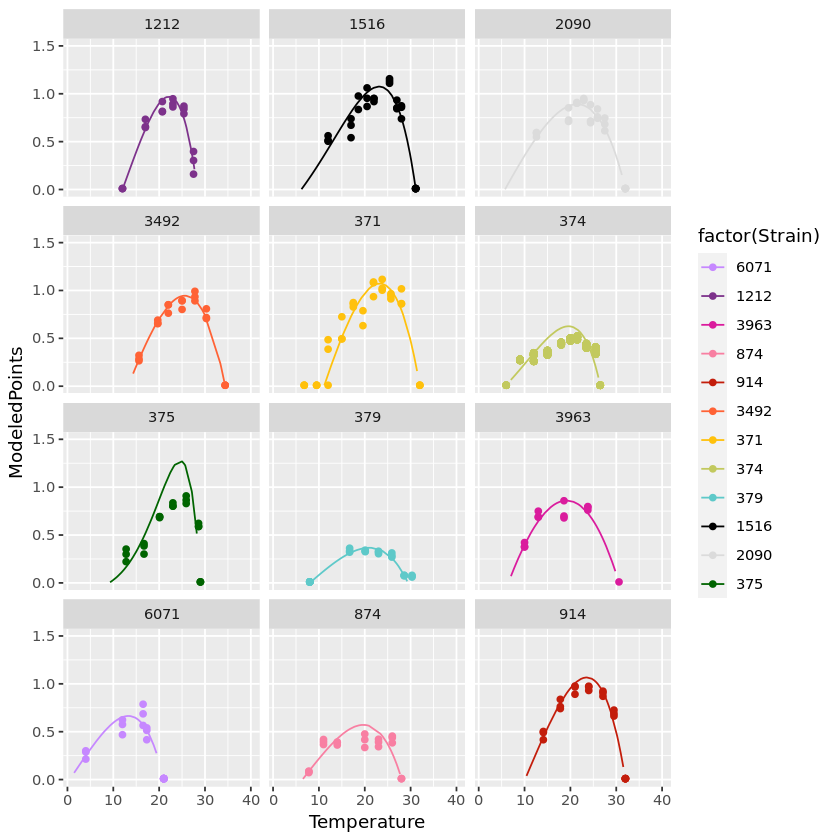

In [8]:
ggplot(all_params %>%dplyr::mutate(Strain=as.character(Strain))) + 
    geom_line(data=all_params%>% dplyr::filter(!is.na(ModeledPoints)) %>%
                                 dplyr::mutate(Strain=factor(as.character(Strain))),
    aes(x = Temperature,y=ModeledPoints,group=Strain,color=factor(Strain)))+ 
    geom_point(data=all_params%>% dplyr::filter(is.na(ModeledPoints)) %>%
                                 dplyr::mutate(Strain=factor(as.character(Strain))),
    aes(x = Temperature,y=MeasuredPoints,group=Strain,color=factor(Strain))) + 
    ylim(c(0,1.5)) + scale_color_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Colors) + 
    facet_wrap(~Strain,ncol=3)

Warning message:
“Removed 548 rows
containing missing
values (`geom_line()`).”


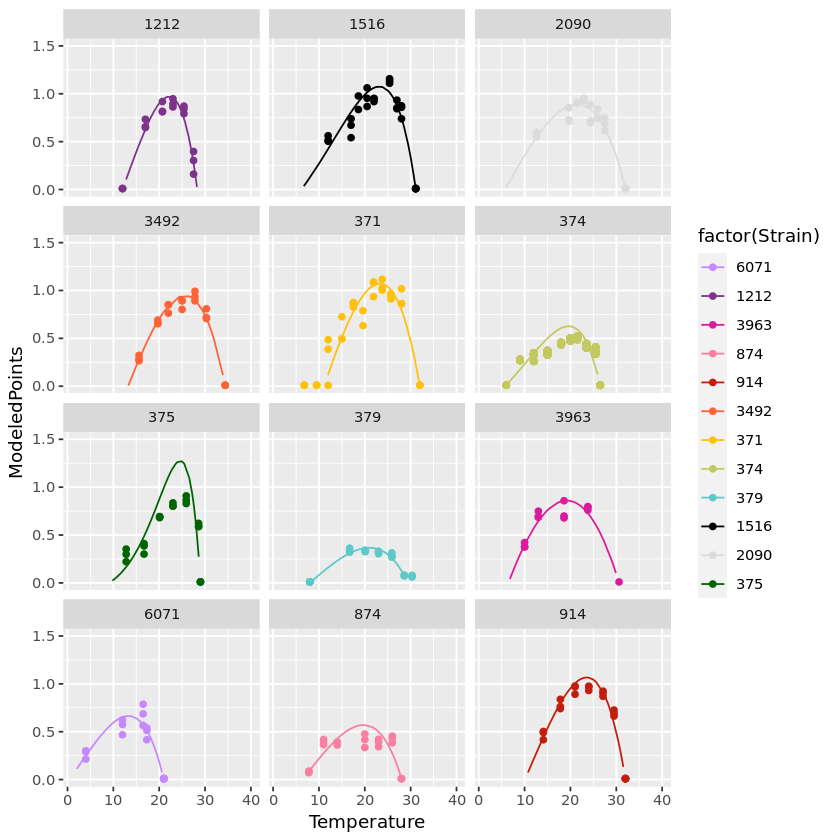

In [10]:
ggplot(all_params %>%dplyr::mutate(Strain=as.character(Strain))) + 
    geom_line(data=all_params%>% dplyr::filter(!is.na(ModeledPoints)) %>%
                                 dplyr::mutate(Strain=factor(as.character(Strain))),
    aes(x = Temperature,y=ModeledPoints,group=Strain,color=factor(Strain)))+ 
    geom_point(data=all_params%>% dplyr::filter(is.na(ModeledPoints)) %>%
                                 dplyr::mutate(Strain=factor(as.character(Strain))),
    aes(x = Temperature,y=MeasuredPoints,group=Strain,color=factor(Strain))) + 
    ylim(c(0,1.5)) + scale_color_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Colors) + 
    facet_wrap(~Strain,ncol=3)

Warning message:
“Removed 255 rows
containing missing
values (`geom_line()`).”
Saving 6.67 x 6.67 in
image
Warning message:
“Removed 255 rows
containing missing
values (`geom_line()`).”


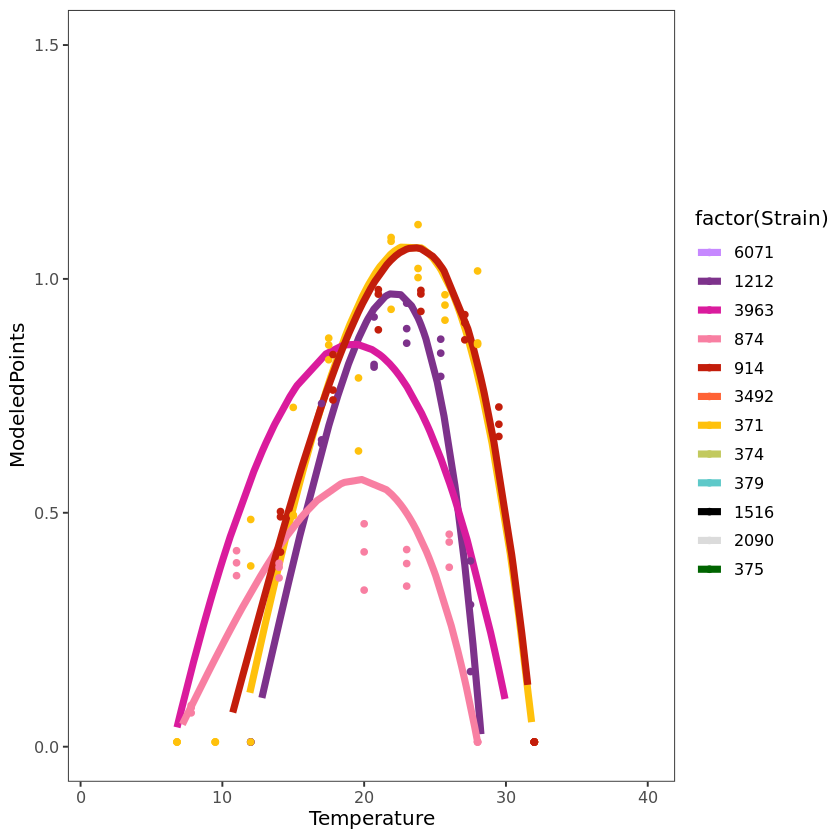

In [12]:
ggplot(all_params %>%dplyr::filter(Strain%in%c(914,874,371,1212,3963)) %>%
                                   dplyr::mutate(Strain=as.character(Strain))) + 
    geom_line(data=all_params%>%dplyr::filter(Strain%in%c(914,874,371,1212,3963))%>% 
              dplyr::filter(!is.na(ModeledPoints)) %>%
                                 dplyr::mutate(Strain=factor(as.character(Strain))),
    aes(x = Temperature,y=ModeledPoints,group=Strain,color=factor(Strain)),lwd=2)+ 
    geom_point(data=all_params%>%dplyr::filter(Strain%in%c(914,874,371,1212))%>% 
               dplyr::filter(is.na(ModeledPoints)) %>%
                                 dplyr::mutate(Strain=factor(as.character(Strain))),
    aes(x = Temperature,y=MeasuredPoints,group=Strain,color=factor(Strain))) + 
    ylim(c(0,1.5)) + scale_color_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors)+
    theme_test(base_size=12)
ggsave("selected_strains.pdf")

Warning message:
“Removed 48 rows containing missing values
(`geom_line()`).”
Saving 6.67 x 6.67 in image
Warning message:
“Removed 48 rows containing missing values
(`geom_line()`).”


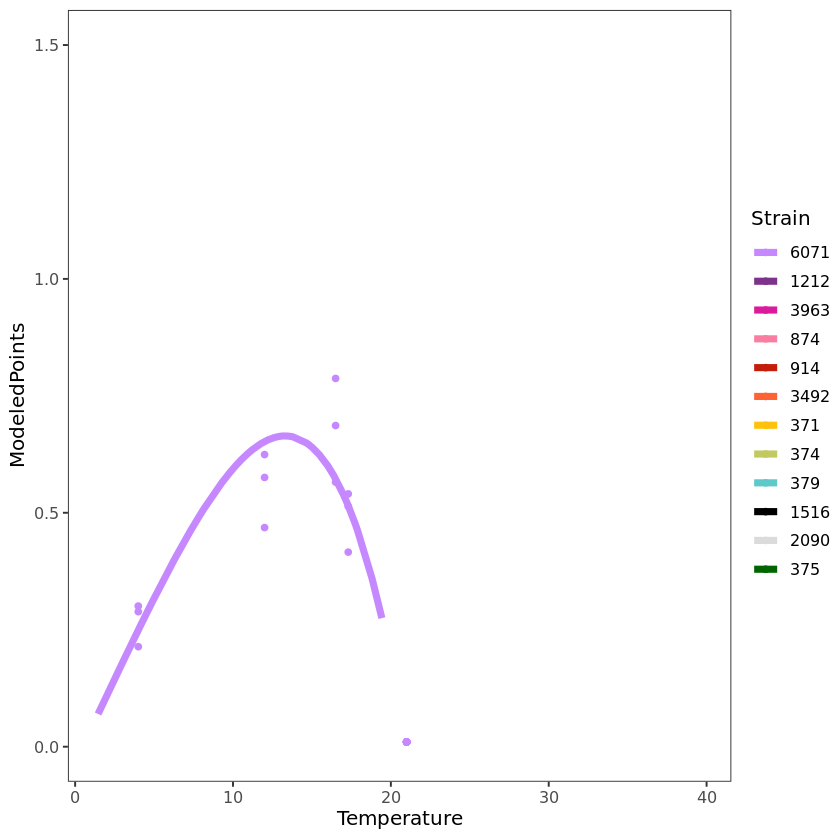

In [66]:
group_strains=c(6071)
ggplot(all_params %>%dplyr::filter(Strain%in%group_strains) %>%
                                   dplyr::mutate(Strain=as.character(Strain))) + 
    geom_line(data=all_params%>%dplyr::filter(Strain%in%group_strains)%>% 
              dplyr::filter(!is.na(ModeledPoints)) %>%
                                 dplyr::mutate(Strain=factor(as.character(Strain))),
    aes(x = Temperature,y=ModeledPoints,group=Strain,color=factor(Strain)),lwd=2)+ 
    geom_point(data=all_params%>%dplyr::filter(Strain%in%group_strains)%>% 
               dplyr::filter(is.na(ModeledPoints)) %>%
                                 dplyr::mutate(Strain=factor(as.character(Strain))),
    aes(x = Temperature,y=MeasuredPoints,group=Strain,color=factor(Strain))) + 
    ylim(c(0,1.5)) + scale_color_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors,
                                       name="Strain")+
    theme_test(base_size=12)
ggsave(paste0(paste(group_strains,collapse="_"),".pdf"))

Warning message:
“Removed 72 rows
containing missing
values (`geom_line()`).”


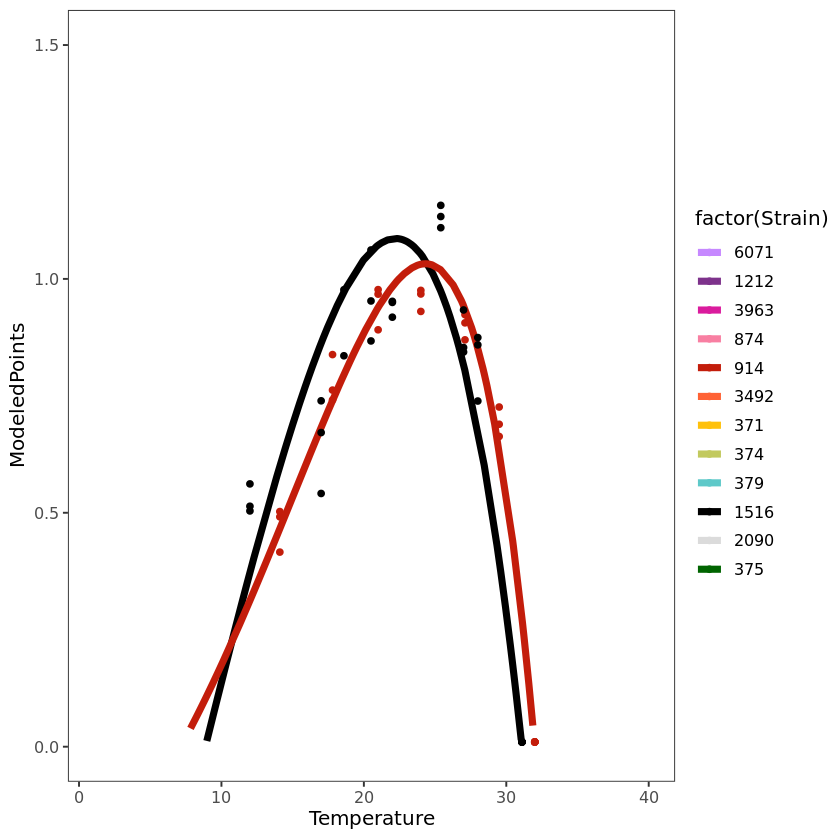

In [414]:
ggplot(all_params %>%dplyr::filter(Strain%in%c(914,1516)) %>%
                                   dplyr::mutate(Strain=as.character(Strain))) + 
    geom_line(data=all_params%>%dplyr::filter(Strain%in%c(914,1516))%>% 
              dplyr::filter(!is.na(ModeledPoints)) %>%
                                 dplyr::mutate(Strain=factor(as.character(Strain))),
    aes(x = Temperature,y=ModeledPoints,group=Strain,color=factor(Strain)),lwd=2)+ 
    geom_point(data=all_params%>%dplyr::filter(Strain%in%c(914,1516))%>% 
               dplyr::filter(is.na(ModeledPoints)) %>%
                                 dplyr::mutate(Strain=factor(as.character(Strain))),
    aes(x = Temperature,y=MeasuredPoints,group=Strain,color=factor(Strain))) + 
    ylim(c(0,1.5)) + scale_color_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors)+
    theme_test(base_size=12)

Warning message:
“Removed 104 rows
containing missing
values (`geom_line()`).”
Saving 6.67 x 6.67 in
image
Warning message:
“Removed 104 rows
containing missing
values (`geom_line()`).”


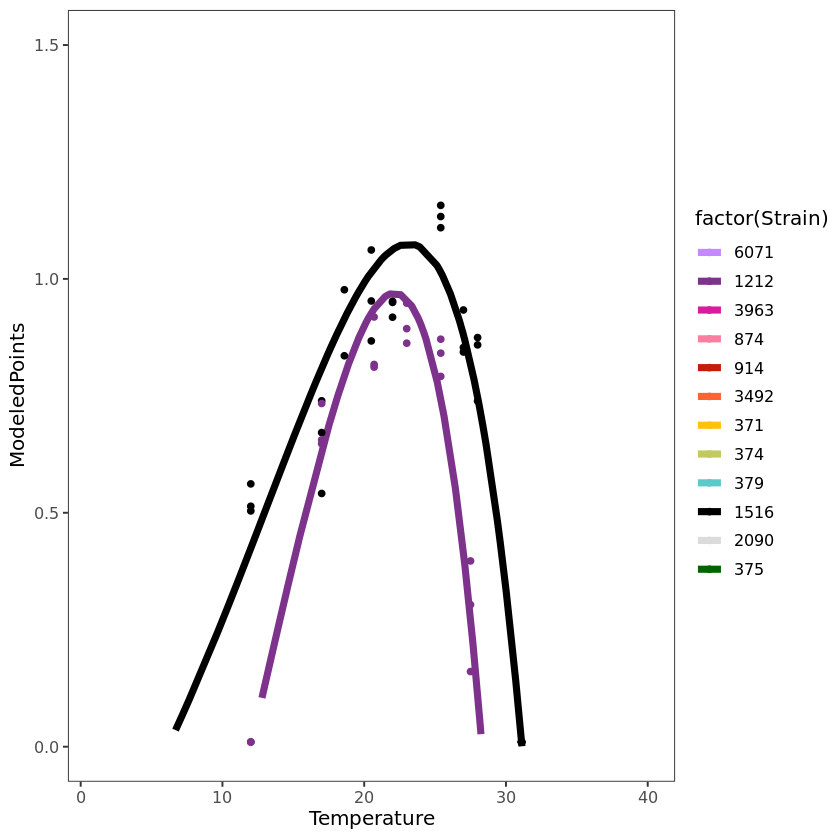

In [13]:
ggplot(all_params %>%dplyr::filter(Strain%in%c(1212,1516)) %>%
                                   dplyr::mutate(Strain=as.character(Strain))) + 
    geom_line(data=all_params%>%dplyr::filter(Strain%in%c(1212,1516))%>% 
              dplyr::filter(!is.na(ModeledPoints)) %>%
                                 dplyr::mutate(Strain=factor(as.character(Strain))),
    aes(x = Temperature,y=ModeledPoints,group=Strain,color=factor(Strain)),lwd=2)+ 
    geom_point(data=all_params%>%dplyr::filter(Strain%in%c(1212,1516))%>% 
               dplyr::filter(is.na(ModeledPoints)) %>%
                                 dplyr::mutate(Strain=factor(as.character(Strain))),
    aes(x = Temperature,y=MeasuredPoints,group=Strain,color=factor(Strain))) + 
    ylim(c(0,1.5)) + scale_color_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors)+
    theme_test(base_size=12)
ggsave("width_of_curves.pdf")

Warning message:
“Removed 110 rows
containing missing
values (`geom_line()`).”


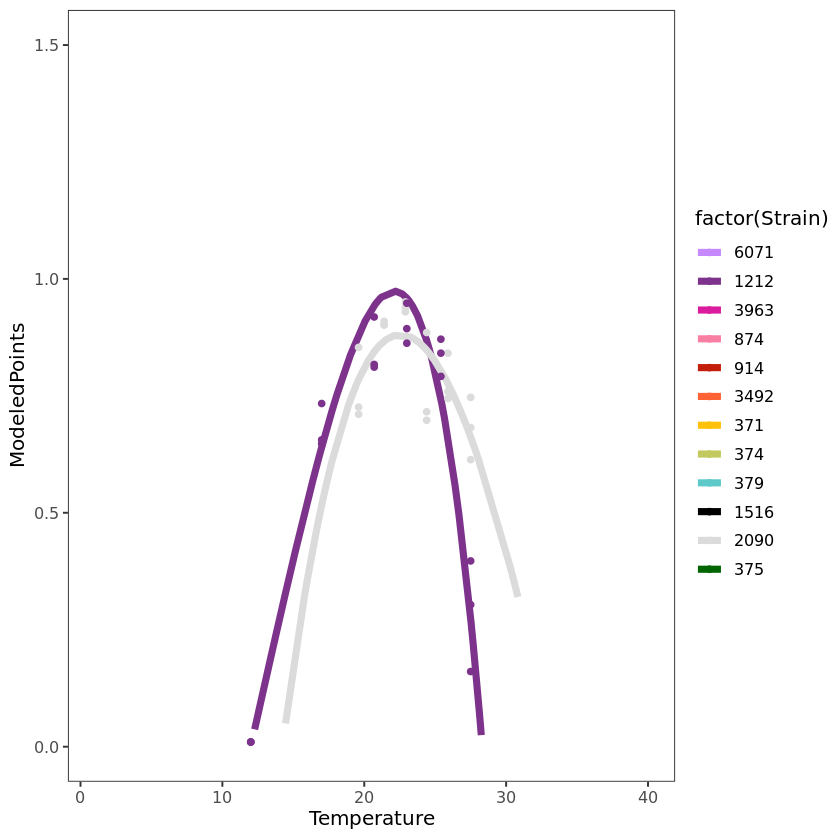

In [416]:
ggplot(all_params %>%dplyr::filter(Strain%in%c(1212,2090)) %>%
                                   dplyr::mutate(Strain=as.character(Strain))) + 
    geom_line(data=all_params%>%dplyr::filter(Strain%in%c(1212,2090))%>% 
              dplyr::filter(!is.na(ModeledPoints)) %>%
                                 dplyr::mutate(Strain=factor(as.character(Strain))),
    aes(x = Temperature,y=ModeledPoints,group=Strain,color=factor(Strain)),lwd=2)+ 
    geom_point(data=all_params%>%dplyr::filter(Strain%in%c(1212,2090))%>% 
               dplyr::filter(is.na(ModeledPoints)) %>%
                                 dplyr::mutate(Strain=factor(as.character(Strain))),
    aes(x = Temperature,y=MeasuredPoints,group=Strain,color=factor(Strain))) + 
    ylim(c(0,1.5)) + scale_color_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors)+
    theme_test(base_size=12)

Warning message:
“Removed 134 rows
containing missing
values (`geom_line()`).”


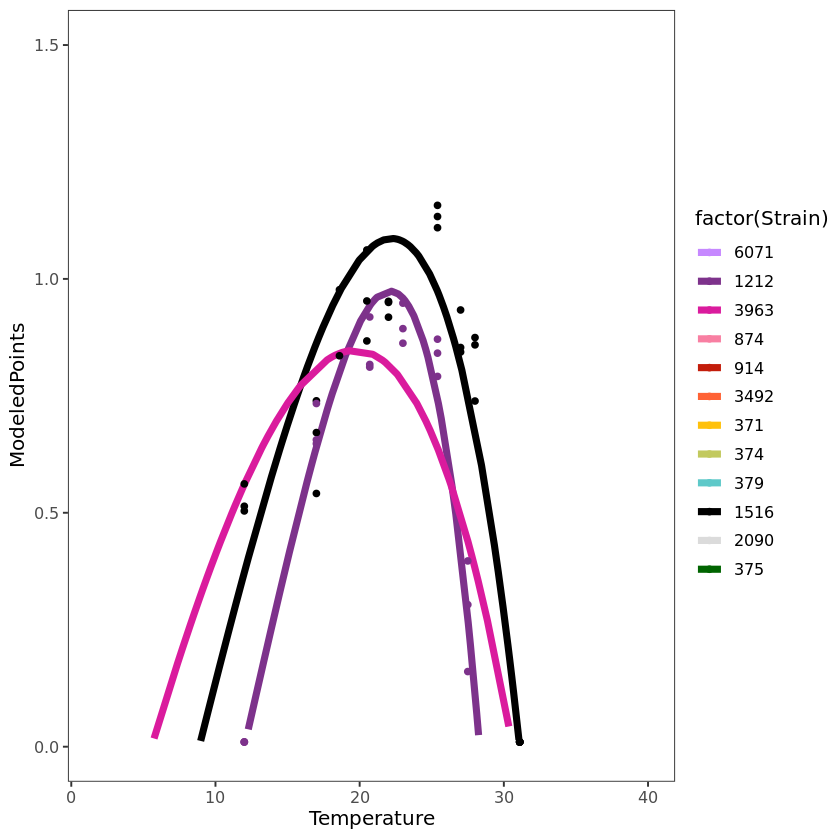

In [417]:
ggplot(all_params %>%dplyr::filter(Strain%in%c(1212,1516)) %>%
                                   dplyr::mutate(Strain=as.character(Strain))) + 
    geom_line(data=all_params%>%dplyr::filter(Strain%in%c(1212,1516,3963))%>% 
              dplyr::filter(!is.na(ModeledPoints)) %>%
                                 dplyr::mutate(Strain=factor(as.character(Strain))),
    aes(x = Temperature,y=ModeledPoints,group=Strain,color=factor(Strain)),lwd=2)+ 
    geom_point(data=all_params%>%dplyr::filter(Strain%in%c(1212,1516))%>% 
               dplyr::filter(is.na(ModeledPoints)) %>%
                                 dplyr::mutate(Strain=factor(as.character(Strain))),
    aes(x = Temperature,y=MeasuredPoints,group=Strain,color=factor(Strain))) + 
    ylim(c(0,1.5)) + scale_color_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors)+
    theme_test(base_size=12)

Warning message:
“Removed 479 rows
containing missing
values (`geom_line()`).”


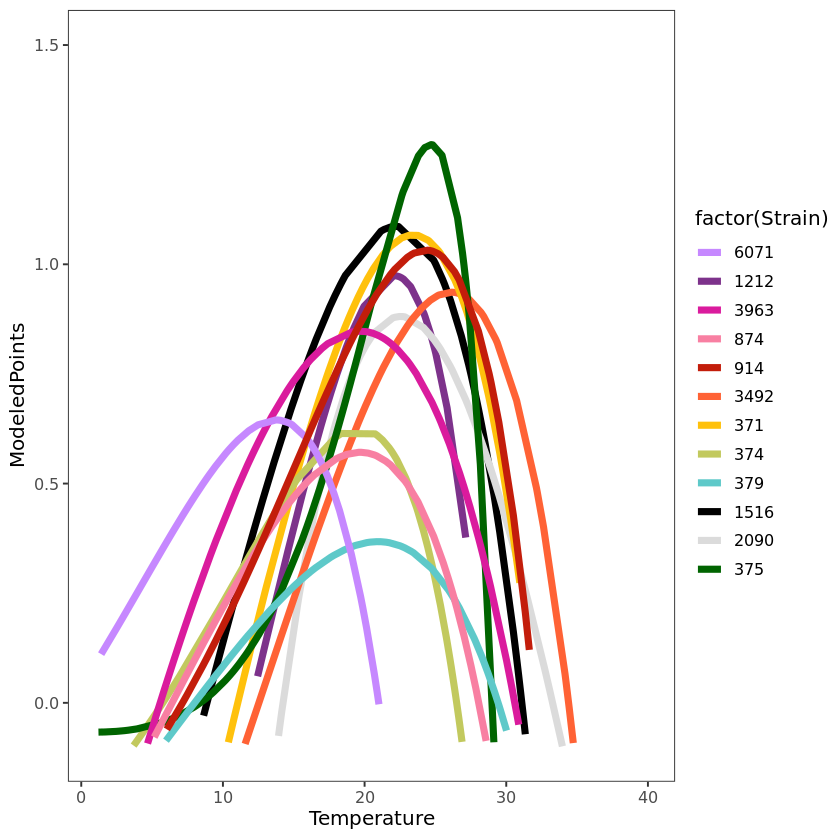

In [439]:
ggplot(all_params %>%
                                   dplyr::mutate(Strain=as.character(Strain))) + 
    geom_line(data=all_params%>%
              dplyr::filter(!is.na(ModeledPoints)) %>%
                                 dplyr::mutate(Strain=factor(as.character(Strain))),
    aes(x = Temperature,y=ModeledPoints,group=Strain,color=factor(Strain)),lwd=2)+ 
    ylim(c(-0.1,1.5)) + scale_color_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors)+
    theme_test(base_size=12)

In [31]:
print_summaries <- function(dataframe_in,column) {
    curr_data=dataframe_in[column]
    print(paste("Min of column",column,"is",round(min(curr_data),2),sep=" "))
    print(paste("Max of column",column,"is",round(max(curr_data),2),sep=" "))
    print(paste("Range of column",column,"is",round(max(curr_data)-min(curr_data),2),sep=" "))
}
print_summaries(all_params_coef,"opt")
print_summaries(all_params_coef,"w")

[1] "Min of column opt is 10.73"
[1] "Max of column opt is 23.81"
[1] "Range of column opt is 13.08"
[1] "Min of column w is 16.31"
[1] "Max of column w is 26.33"
[1] "Range of column w is 10.02"


In [14]:
cor.test(c(1:10),c(20:29)*3, method="kendall")



	Kendall's rank correlation tau

data:  c(1:10) and c(20:29) * 3
T = 45, p-value = 5.511e-07
alternative hypothesis: true tau is not equal to 0
sample estimates:
tau 
  1 


Saving 6.67 x 6.67 in image


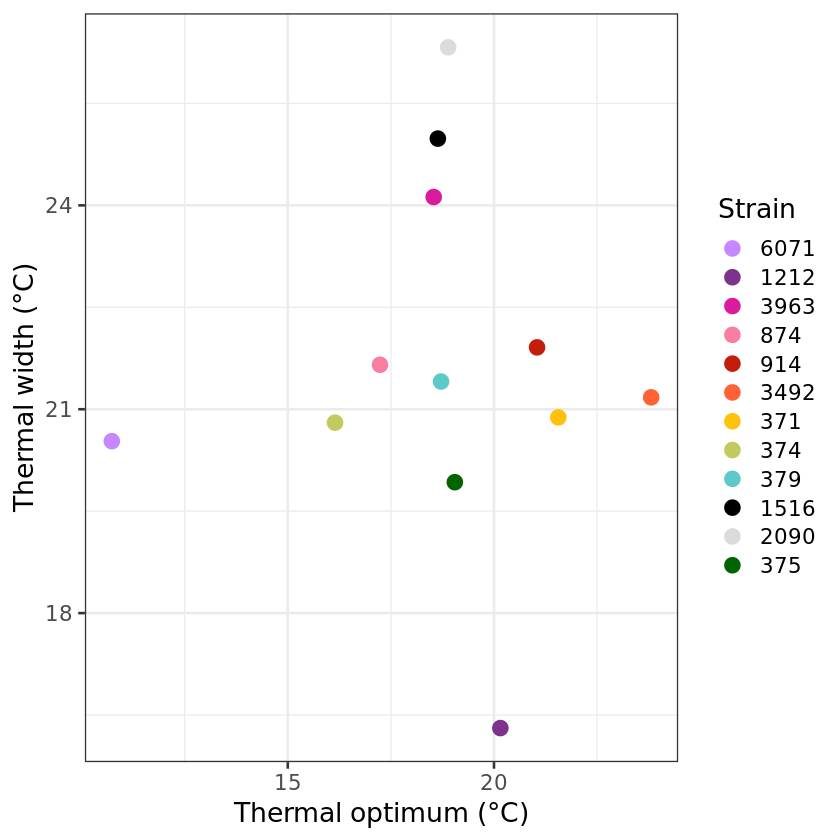

In [75]:
ggplot(all_params_coef) + geom_point(aes(x=opt,y=w,color=factor(Strain)),size=4)+ 
    scale_color_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors,
                      name="Strain")+
    theme_bw(base_size=16) + xlab("Thermal optimum (°C)") + ylab("Thermal width (°C)")
ggsave("width_v_opt.pdf")

In [84]:
ALL_EHUX = read.csv('/vortexfs1/omics/alexander/halexander/2020-Ehux/RCC-parsing/EHUX_all_strains.csv')

ALL_EHUX %>% dplyr::select(X,RCC.temperature,Latitude,Longitude)%>%
    dplyr::filter(X %in% c("RCC6856","RCC6071","RCC1212","RCC3963",
                                                   "RCC874","CCMP1280","RCC4567","RCC914","RCC3492",
                                                   "CCMP371","RCC1215","CCMP377","RCC1239",
                                                   "RCC1222","RCC1256","CCMP74","CCMP379","CCMP1516",
                                                   "CCMP2090","CCMP375"))%>%
    dplyr::bind_rows(data.frame("X"=c("CCMP371","CCMP1280","CCMP375","CCMP377","CCMP1516/2090","CCMP379"),
                                "Latitude"=c(32,-12,32,43,-2.67,50.17),
                                "Longitude"=c(-62,-35,-62,-68,-82.72,-4.25), # deposit date is used if sampling unavailable
                                "SamplingYear"=c(1987,1990,1967,1988,1992,NA),
                                "SamplingMonth"=c(6,10,2,9,9,NA)))

other_isolation_dates = data.frame("X"=c("RCC874","RCC914","RCC1212","RCC1215","RCC1222",
                                         "RCC1239","RCC1256","RCC3492","RCC3963","RCC6071"),
                                   "SamplingYear"=c(2004,2004,2000,2001,1998,2002,1999,2011,
                                                    2011,2018),
                                   "SamplingMonth"=c(11,10,9,2,7,4,7,12,10,3),
                                   "SamplingDepth"=c(5,10,3,NA,20,NA,NA,0,NA,10),
                                   "SamplingTemp"=c(NA,27.78,NA,NA,NA,NA,NA,NA,NA,NA))

sample_t_frame = ALL_EHUX %>% dplyr::select(X,RCC.temperature,Latitude,Longitude)%>%
    dplyr::filter(X %in% c("RCC6856","RCC6071","RCC1212","RCC3963",
                                                   "RCC874","CCMP1280","RCC4567","RCC914","RCC3492",
                                                   "CCMP371","RCC1215","CCMP377","RCC1239",
                                                   "RCC1222","RCC1256","CCMP74","CCMP379","CCMP1516",
                                                   "CCMP2090","CCMP375"))%>%
    dplyr::left_join(other_isolation_dates,by=c("X"))%>%
    dplyr::bind_rows(data.frame("X"=c("CCMP371","CCMP1280","CCMP375","CCMP377","CCMP1516","CCMP2090","CCMP379"),
                                "Latitude"=c(32,-12,32,43,-2.67,-2.67,50.17),
                                "Longitude"=c(-62,-35,-62,-68,-82.72,-82.72,-4.25), # deposit date is used if sampling unavailable
                                "SamplingYear"=c(1987,1990,1967,1988,1992,1992,NA),
                                "SamplingMonth"=c(6,10,2,9,9,9,NA),
                                "SamplingTemp"=c(NA,NA,NA,NA,NA,NA,NA)))

sample_t_frame

X             RCC.temperature Latitude Longitude SamplingYear SamplingMonth
1  RCC874        17              -31.82    -91.47     NA         NA           
2  RCC914        17               -8.33   -141.25     NA         NA           
3  RCC1212       17              -34.47     17.30     NA         NA           
4  RCC1215       17               41.67      2.80     NA         NA           
5  RCC1222       17               59.77     20.64     NA         NA           
6  RCC1239       17               43.22    141.02     NA         NA           
7  RCC1256       17               63.45    -20.23     NA         NA           
8  RCC3492       22               26.61    127.87     NA         NA           
9  RCC3963       15              -33.63    -78.82     NA         NA           
10 RCC6071        4              -63.68    176.12     NA         NA           
11 CCMP371       NA               32.00    -62.00   1987          6           
12 CCMP1280      NA              -12.00    -35.00   1990         10           
13 CCMP375       NA               32.00    -62.00   1967          2           
14 CCMP377       NA               43.00    -68.00   1988          9           
15 CCMP1516/2090 NA               -2.67    -82.72   1992          9           
16 CCMP379       NA               50.17     -4.25     NA         NA

X        RCC.temperature Latitude Longitude SamplingYear SamplingMonth
1  RCC874   17              -31.82    -91.47   2004         11           
2  RCC914   17               -8.33   -141.25   2004         10           
3  RCC1212  17              -34.47     17.30   2000          9           
4  RCC1215  17               41.67      2.80   2001          2           
5  RCC1222  17               59.77     20.64   1998          7           
6  RCC1239  17               43.22    141.02   2002          4           
7  RCC1256  17               63.45    -20.23   1999          7           
8  RCC3492  22               26.61    127.87   2011         12           
9  RCC3963  15              -33.63    -78.82   2011         10           
10 RCC6071   4              -63.68    176.12   2018          3           
11 CCMP371  NA               32.00    -62.00   1987          6           
12 CCMP1280 NA              -12.00    -35.00   1990         10           
13 CCMP375  NA               32.00    -62.00   1967          2           
14 CCMP377  NA               43.00    -68.00   1988          9           
15 CCMP1516 NA               -2.67    -82.72   1992          9           
16 CCMP2090 NA               -2.67    -82.72   1992          9           
17 CCMP379  NA               50.17     -4.25     NA         NA           
   SamplingDepth SamplingTemp
1   5               NA       
2  10            27.78       
3   3               NA       
4  NA               NA       
5  20               NA       
6  NA               NA       
7  NA               NA       
8   0               NA       
9  NA               NA       
10 10               NA       
11 NA               NA       
12 NA               NA       
13 NA               NA       
14 NA               NA       
15 NA               NA       
16 NA               NA       
17 NA               NA

In [86]:
final_merge_df=sample_t_frame %>% separate(X,into=c("RCC","StrainRCC"),sep="RCC") %>%
    tidyr::separate(RCC,into=c("CCMP","StrainCCMP"),sep="CCMP") %>%
    dplyr::mutate(Strain=as.numeric(case_when(is.na(StrainCCMP)~StrainRCC,
                                   StrainCCMP=="1516/2090"~"1516",
                                   TRUE ~ StrainCCMP)))

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA`
in 7 rows [11, 12, 13, 14, 15, 16, 17].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA`
in 10 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10].”


Joining with `by = join_by(Strain)`
Saving 6.67 x 6.67 in image


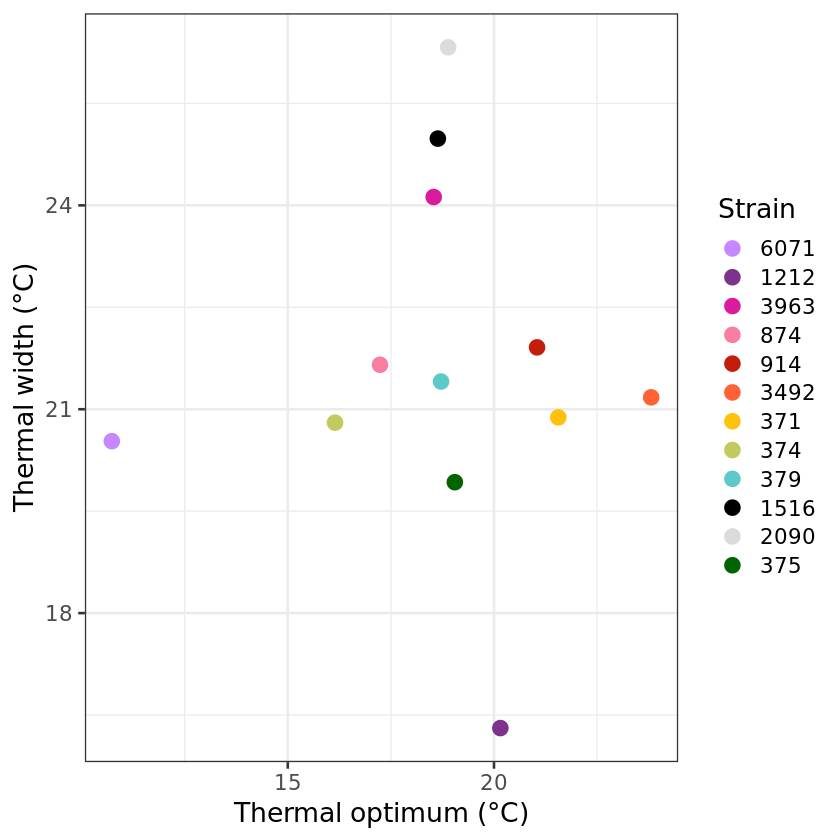

In [104]:
ggplot(all_params_coef %>% dplyr::left_join(final_merge_df)) + geom_point(aes(x=opt,y=w,color=factor(Strain)),size=4)+ 
    scale_color_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors,
                      name="Strain")+
    theme_bw(base_size=16) + xlab("Thermal optimum (°C)") + ylab("Thermal width (°C)")
ggsave("width_v_opt.pdf")

Joining with `by = join_by(Strain)`
Joining with `by = join_by(Strain)`
Warning message:
“Removed 1 rows containing non-finite values
(`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values
(`geom_point()`).”
Saving 6.67 x 6.67 in image
Warning message:
“Removed 1 rows containing non-finite values
(`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values
(`geom_point()`).”


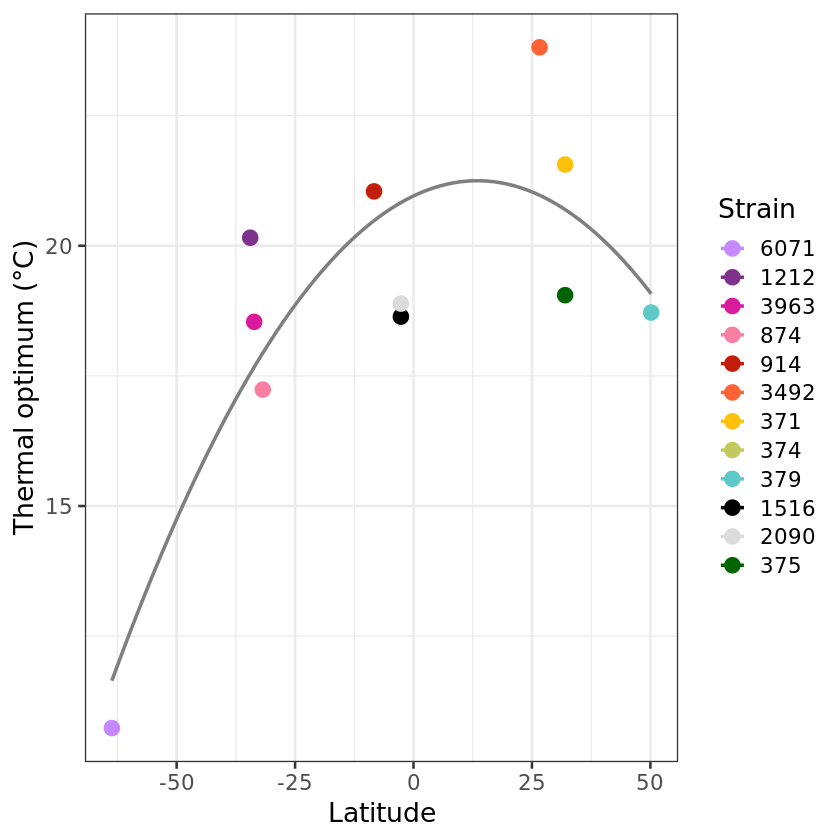

In [103]:
ggplot(all_params_coef %>% dplyr::left_join(final_merge_df)) + geom_point(aes(y=opt,x=Latitude,color=factor(Strain)),size=4)+ 
    scale_color_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors,
                      name="Strain")+
    theme_bw(base_size=16) + ylab("Thermal optimum (°C)") + xlab("Latitude")+
   geom_smooth(data=all_params_coef %>% dplyr::left_join(final_merge_df),
               method="lm", aes(x=Latitude,y=opt,color="Exp Model"), formula= (y ~  x + I(x^2)), se=FALSE, linetype = 1)
ggsave("opt_v_latitude.pdf")

Joining with `by = join_by(Strain)`
Joining with `by = join_by(Strain)`
Warning message:
“Removed 1 rows containing non-finite values
(`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values
(`geom_point()`).”
Saving 6.67 x 6.67 in image
Warning message:
“Removed 1 rows containing non-finite values
(`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values
(`geom_point()`).”


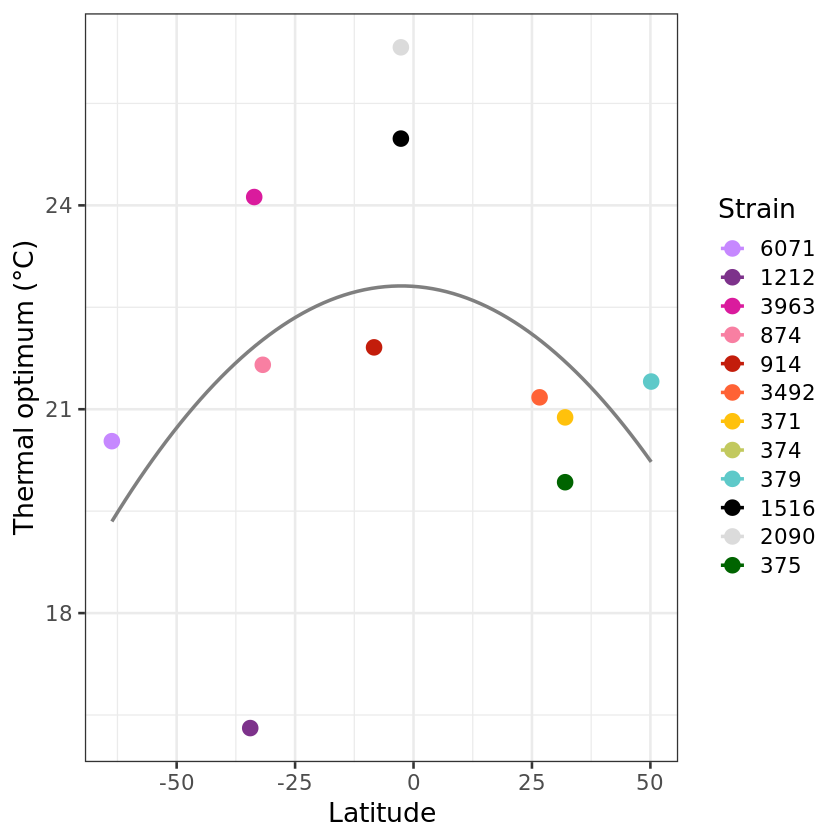

In [107]:
ggplot(all_params_coef %>% dplyr::left_join(final_merge_df)) + geom_point(aes(y=w,x=Latitude,color=factor(Strain)),size=4)+ 
    scale_color_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors,
                      name="Strain")+
    theme_bw(base_size=16) + ylab("Thermal optimum (°C)") + xlab("Latitude")+
   geom_smooth(data=all_params_coef %>% dplyr::left_join(final_merge_df),
               method="lm", aes(x=Latitude,y=w,color="Exp Model"), formula= (y ~  x + I(x^2)), se=FALSE, linetype = 1)
ggsave("width_v_latitude.pdf")

In [99]:
summary(lm(formula= (opt ~  Latitude + I(Latitude^2)),data=all_params_coef %>% 
           dplyr::left_join(final_merge_df)))

In [101]:
summary(lm(formula= (opt ~  Latitude + I(Latitude^2)),data=all_params_coef %>% 
           dplyr::left_join(final_merge_df)))

Joining with `by = join_by(Strain)`



Call:
lm(formula = (opt ~ Latitude + I(Latitude^2)), data = all_params_coef %>% 
    dplyr::left_join(final_merge_df))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1904 -1.2777 -0.3595  0.8664  2.8410 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   20.956733   0.831269  25.211 6.56e-09 ***
Latitude       0.043473   0.017761   2.448   0.0401 *  
I(Latitude^2) -0.001614   0.000527  -3.062   0.0155 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.918 on 8 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.725,	Adjusted R-squared:  0.6563 
F-statistic: 10.55 on 2 and 8 DF,  p-value: 0.005719


In [11]:
cor.test(all_params_coef$opt,all_params_coef$w, method="kendall")




	Kendall's rank correlation tau

data:  all_params_coef$opt and all_params_coef$w
T = 33, p-value = 1
alternative hypothesis: true tau is not equal to 0
sample estimates:
tau 
  0 


In [18]:
best_gr_frame=data.frame()
for (curr in 1:nrow(all_params_coef)) {
    best_gr_frame=best_gr_frame %>% dplyr::bind_rows(data.frame(Strain=all_params_coef$Strain[curr],
                                                            Temperature = all_params_coef$opt[curr],
                                                            ModeledPoints = nbcurve(all_params_coef$opt[curr],
                                                                                    opt=all_params_coef$opt[curr],
                                                                         a=all_params_coef$a[curr],
                                                                         w=all_params_coef$w[curr],
                                                                         b=all_params_coef$b[curr]),
                                                            w = all_params_coef$w[curr],
                                                            opt = all_params_coef$opt[curr]))
}

In [33]:
cor.test(best_gr_frame$ModeledPoints,best_gr_frame$w, method="kendall")


	Kendall's rank correlation tau

data:  best_gr_frame$ModeledPoints and best_gr_frame$w
T = 34, p-value = 0.9466
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
0.03030303 


In [34]:
print_summaries(best_gr_frame,"ModeledPoints")

[1] "Min of column ModeledPoints is 0.35"
[1] "Max of column ModeledPoints is 1.04"
[1] "Range of column ModeledPoints is 0.69"


Warning message:
“Removed 8747 rows containing missing values
(`geom_line()`).”
Saving 6.67 x 6.67 in image
Warning message:
“Removed 8747 rows containing missing values
(`geom_line()`).”


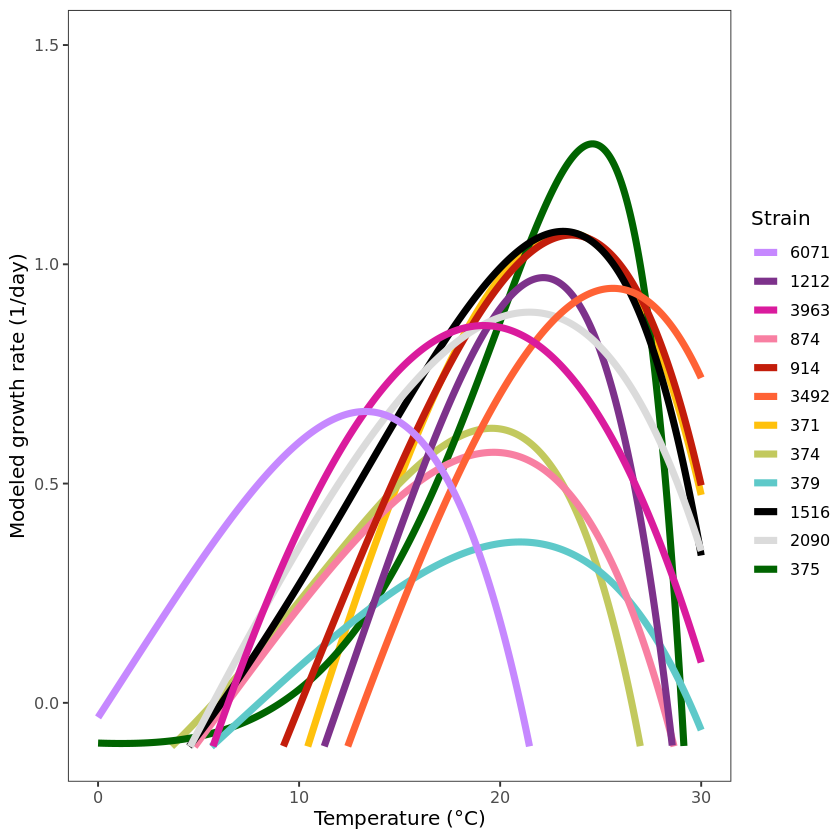

In [60]:
built_gr_df = data.frame()
for (curr in 1:nrow(all_params_coef)) {
    built_gr_df=built_gr_df %>% dplyr::bind_rows(data.frame(Strain=all_params_coef$Strain[curr],
                                                            Temperature = seq(0,30,by=0.01),
                                                            ModeledPoints = nbcurve(seq(0,30,by=0.01),
                                                                                    opt=all_params_coef$opt[curr],
                                                                         a=all_params_coef$a[curr],
                                                                         w=all_params_coef$w[curr],
                                                                         b=all_params_coef$b[curr])))
}

growth_curves_fig = ggplot(built_gr_df %>% dplyr::filter(!is.na(ModeledPoints)))+geom_line(aes(x = Temperature,y=ModeledPoints,group=Strain,
                                  color=factor(Strain)),lwd=2)+ 
    ylim(c(-0.1,1.5)) + scale_color_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors,
                                           name="Strain")+
    theme_test(base_size=12) + xlab("Temperature (°C)") + ylab("Modeled growth rate (1/day)")
growth_curves_fig
ggsave("growth_curve_fig.pdf")

In [35]:
revised_df =data.frame()
for (strain_curr in all_params_coef$Strain) {
    opt_val = optimize(nbcurve,interval=c(0,40),maximum=TRUE,
         a=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$a,
         b=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$b,
         w=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$w,
         opt=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$opt)$maximum
    revised_df = revised_df %>%
        dplyr::bind_rows(data.frame(Strain=strain_curr,Revised_opt=opt_val))
}

In [36]:
revised_df_width =data.frame()
recalculate=TRUE # if this is true, we use optimized Topt rather than the one the eqn spits out.

for (strain_curr in all_params_coef$Strain) {
    opt_val = optimize(nbcurve,interval=c(0,40),maximum=TRUE,
         a=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$a,
         b=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$b,
         w=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$w,
         opt=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$opt)$maximum
    wid_eq_1 = ((all_params_coef%>%dplyr::filter(Strain==strain_curr))$w)/2+
        (all_params_coef%>%dplyr::filter(Strain==strain_curr))$opt
    wid_eq_2 = -((all_params_coef%>%dplyr::filter(Strain==strain_curr))$w)/2+
        (all_params_coef%>%dplyr::filter(Strain==strain_curr))$opt
    if (recalculate) {
        wid_eq_1 = ((all_params_coef%>%dplyr::filter(Strain==strain_curr))$w)/2+
            opt_val
        wid_eq_2 = -((all_params_coef%>%dplyr::filter(Strain==strain_curr))$w)/2+
            opt_val
    }
    revised_df_width = revised_df_width %>%
        dplyr::bind_rows(data.frame(Strain=strain_curr,Revised_wid=abs(wid_eq_2-wid_eq_1)))
}

In [51]:
revised_df_plateau =data.frame() ## range of temperatures within 10% of max GR. 
# we set res to be 10% of opt on either side.
recalculate=TRUE # if this is true, we use optimized Topt rather than the one the eqn spits out.

nbcurve <- function(x,opt,w,a,b){
  res<-a*exp(b*x)*(1-((x-opt)/(w/2))^2)
  res
}

for (strain_curr in all_params_coef$Strain) {
    a=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$a
    b=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$b
    w=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$w
    opt=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$opt
    opt_val = optimize(nbcurve,interval=c(0,40),maximum=TRUE,
         a=a,
         b=b,
         w=w,
         opt=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$opt)$maximum
    wid_eq_1 = ((all_params_coef%>%dplyr::filter(Strain==strain_curr))$w)/2+
        opt_val
    wid_eq_2 = -((all_params_coef%>%dplyr::filter(Strain==strain_curr))$w)/2+
        opt_val
    tolerance_val=nbcurve(opt_val,opt,w,a,b)*0.8
    temps_test=seq(from = wid_eq_2+sign(wid_eq_2)*wid_eq_2*0.5, 
                   to = wid_eq_1+sign(wid_eq_2)*wid_eq_2*0.5, by = 0.01)
    window_1 = -100
    window_2 = -100
    print(paste0(tolerance_val,"; window",window_1," to ",window_2,"; strain:",strain_curr))
    for (temp in temps_test) {
        if ((window_1<0)&(window_2<0)&(nbcurve(temp,opt,w,a,b) >= tolerance_val)) {
            window_1 = temp
        }else if ((window_2<0)&(window_1>0)&(nbcurve(temp,opt,w,a,b) <= tolerance_val)){
            window_2=temp
        }
    }
    revised_df_plateau = revised_df_plateau %>%
        dplyr::bind_rows(data.frame(Strain=strain_curr,Revised_plateau=abs(window_1-window_2),
                                    low_temp=window_1,high_temp=window_2,topt=opt_val,
                                    best_gr = nbcurve(opt_val,opt,w,a,b), opt_param=opt,
                                    a_param=a,b_param=b,w_param=w))
}

[1] "0.500814680947836; window-100 to -100; strain:374"
[1] "0.688256092086373; window-100 to -100; strain:3963"
[1] "0.756140087860998; window-100 to -100; strain:3492"
[1] "0.860070185520293; window-100 to -100; strain:1516"
[1] "0.457022286204471; window-100 to -100; strain:874"
[1] "1.01973506082134; window-100 to -100; strain:375"
[1] "0.712668474718413; window-100 to -100; strain:2090"
[1] "0.293444086796404; window-100 to -100; strain:379"
[1] "0.775681304764546; window-100 to -100; strain:1212"
[1] "0.858074558402502; window-100 to -100; strain:371"
[1] "0.531462956305416; window-100 to -100; strain:6071"
[1] "0.853338453286993; window-100 to -100; strain:914"


In [52]:
revised_df_plateau$left_plateau=revised_df_plateau$topt-revised_df_plateau$low_temp
revised_df_plateau$right_plateau=revised_df_plateau$high_temp-revised_df_plateau$topt

In [53]:
revised_df_plateau

Strain Revised_plateau low_temp  high_temp topt     best_gr   opt_param
1   374    8.08           15.010551 23.09055  19.58152 0.6260184 16.14560 
2  3963   10.75           13.680812 24.43081  19.18172 0.8603201 18.53832 
3  3492    7.31           22.535532 29.84553  25.61106 0.9451751 23.81191 
4  1516    9.43           17.752610 27.18261  23.13286 1.0750877 18.63879 
5   874    9.09           14.701134 23.79113  19.68094 0.5712779 17.23622 
6   375    4.95           21.946420 26.89642  24.59385 1.2746688 19.05065 
7  2090   11.23           15.380968 26.61097  21.46341 0.8908356 18.88865 
8   379    9.05           16.059217 25.10922  20.98970 0.3668051 18.71665 
9  1212    4.20           20.988086 25.18809  22.14586 0.9696016 20.15439 
10  371    8.23           19.239446 27.46945  23.26621 1.0725932 21.55978 
11 6071    8.49            8.606928 17.09693  13.29617 0.6643287 10.73427 
12  914    8.81           18.885767 27.69577  23.54560 1.0666731 21.04450 
   a_param    b_param     w_param  left_plateau right_plateau
1  0.17394705 0.071300892 20.80231 4.570972     3.509028     
2  0.72777710 0.008870916 24.12235 5.500906     5.249094     
3  0.41741480 0.033055737 21.17475 3.075532     4.234468     
4  0.26721485 0.066171077 24.98224 5.380251     4.049749     
5  0.25345497 0.043952256 21.65371 4.979808     4.110192     
6  0.03454827 0.161768705 19.92580 2.647425     2.302575     
7  0.47716739 0.030904070 26.32552 6.082439     5.147561     
8  0.16057197 0.041555415 21.40711 4.930484     4.119516     
9  0.25151945 0.063708092 16.30761 1.157775     3.042225     
10 0.52132676 0.032172734 20.87983 4.026765     4.203235     
11 0.35551831 0.051858146 20.52977 4.689245     3.800755     
12 0.39960398 0.043972393 21.91017 4.659828     4.150172

In [54]:
print_summaries(revised_df_plateau,"Revised_plateau")

[1] "Min of column Revised_plateau is 4.2"
[1] "Max of column Revised_plateau is 11.23"
[1] "Range of column Revised_plateau is 7.03"


In [55]:
cor.test(revised_df_plateau$Revised_plateau,revised_df_plateau$opt, method="kendall")


	Kendall's rank correlation tau

data:  revised_df_plateau$Revised_plateau and revised_df_plateau$opt
T = 25, p-value = 0.3108
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.2424242 


In [56]:
cor.test(revised_df_plateau$Revised_plateau,revised_df_plateau$best_gr, method="kendall")


	Kendall's rank correlation tau

data:  revised_df_plateau$Revised_plateau and revised_df_plateau$best_gr
T = 27, p-value = 0.459
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.1818182 


In [57]:
cor.test(revised_df_plateau$Revised_plateau,revised_df_plateau$w_param, method="kendall")


	Kendall's rank correlation tau

data:  revised_df_plateau$Revised_plateau and revised_df_plateau$w_param
T = 58, p-value = 0.00024
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.7575758 


In [58]:
cor.test(revised_df_plateau$Revised_plateau,revised_df_plateau$w_param, method = 'spearman')


	Spearman's rank correlation rho

data:  revised_df_plateau$Revised_plateau and revised_df_plateau$w_param
S = 26, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9090909 


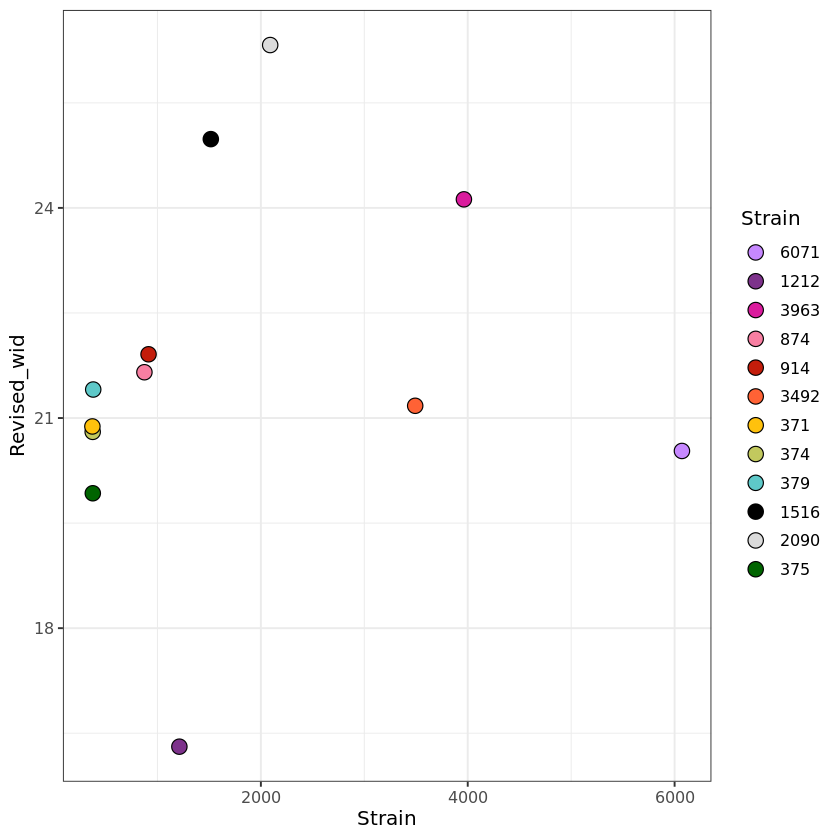

In [20]:
ggplot(revised_df_width) + geom_point(aes(x=Strain,y=Revised_wid,
                                            fill=factor(Strain)),pch=21,size=4) + 
    geom_abline(aes(intercept=0,slope=1),linetype="dotdash")+ theme_bw(base_size=12)+ 
    scale_fill_manual(breaks=as.character((strain_color_frame_harriet%>%
                                            dplyr::filter(Strains%in%all_params_coef$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet%>%
                                            dplyr::filter(Strains%in%all_params_coef$Strain))$Strains),
                                        values=(strain_color_frame_harriet%>%
                                            dplyr::filter(Strains%in%all_params_coef$Strain))$Colors,
                       name="Strain") 

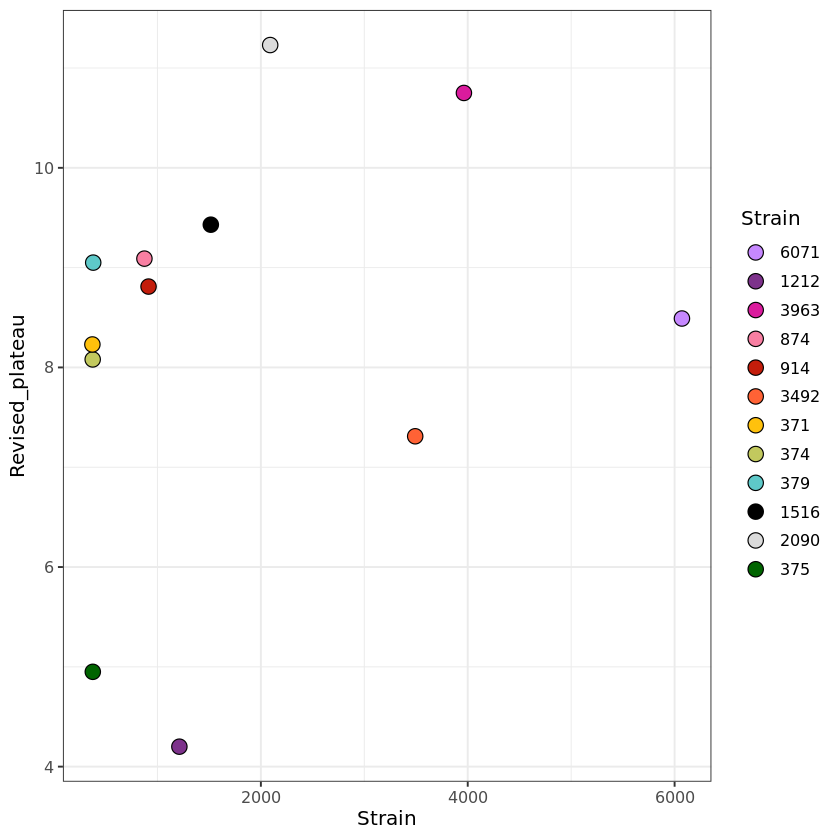

In [21]:
ggplot(revised_df_plateau) + geom_point(aes(x=Strain,y=Revised_plateau,
                                            fill=factor(Strain)),pch=21,size=4) + 
    geom_abline(aes(intercept=0,slope=1),linetype="dotdash")+ theme_bw(base_size=12)+ 
    scale_fill_manual(breaks=as.character((strain_color_frame_harriet%>%
                                            dplyr::filter(Strains%in%all_params_coef$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet%>%
                                            dplyr::filter(Strains%in%all_params_coef$Strain))$Strains),
                                        values=(strain_color_frame_harriet%>%
                                            dplyr::filter(Strains%in%all_params_coef$Strain))$Colors,
                       name="Strain") 

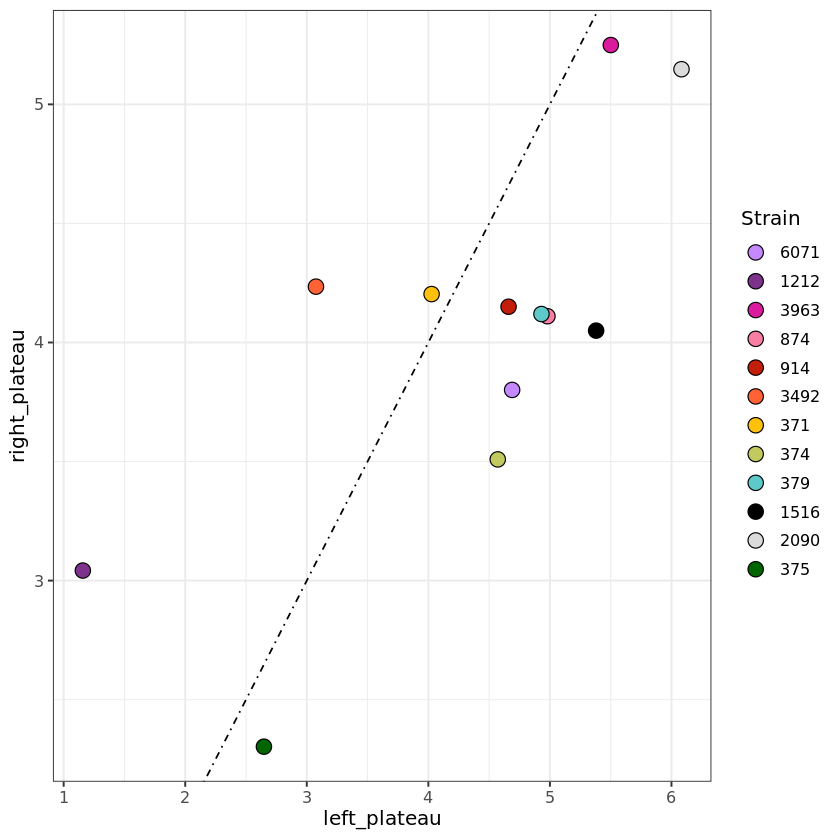

In [22]:
ggplot(revised_df_plateau) + geom_point(aes(x=left_plateau,y=right_plateau,fill=factor(Strain)),pch=21,size=4) + 
    geom_abline(aes(intercept=0,slope=1),linetype="dotdash")+ theme_bw(base_size=12)+ 
    scale_fill_manual(breaks=as.character((strain_color_frame_harriet%>%
                                            dplyr::filter(Strains%in%all_params_coef$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet%>%
                                            dplyr::filter(Strains%in%all_params_coef$Strain))$Strains),
                                        values=(strain_color_frame_harriet%>%
                                            dplyr::filter(Strains%in%all_params_coef$Strain))$Colors,
                       name="Strain") 

Warning message:
“Duplicated aesthetics
after name
standardisation: colour”
Warning message:
“Duplicated aesthetics
after name
standardisation: colour”
Saving 6.67 x 6.67 in
image
Warning message:
“Duplicated aesthetics
after name
standardisation: colour”


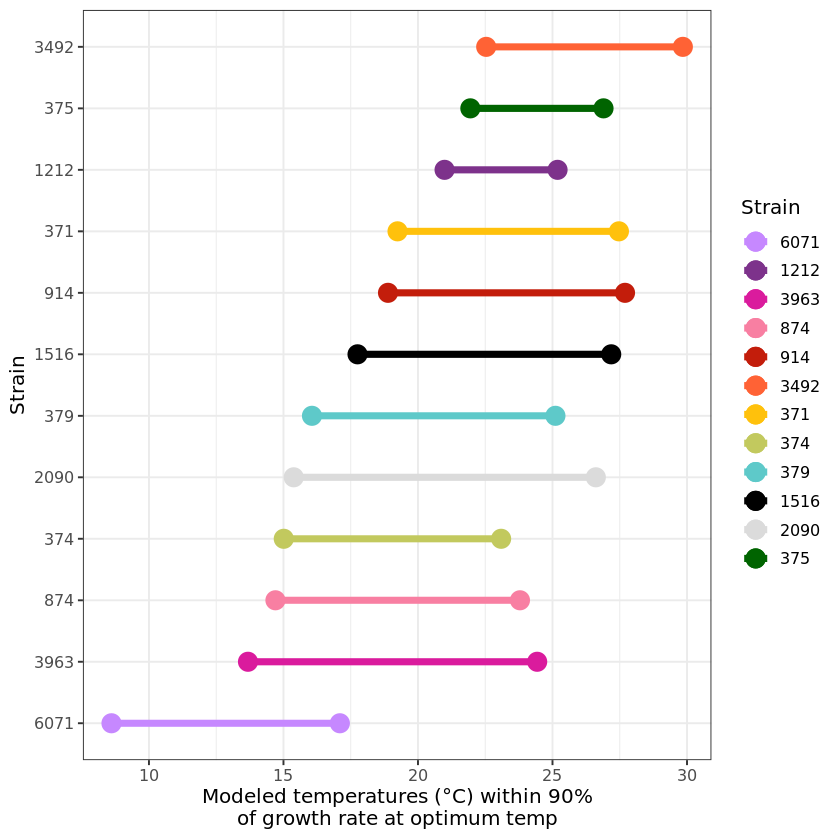

In [31]:
plateau_plot = ggplot(revised_df_plateau)+ #%>% tidyr::pivot_longer(id_cols=c("Strain","Revised_plateau"),
                          #                        names_to="type",values_to="temp")) + 
    geom_segment(aes(x=low_temp,xend=high_temp,y=factor(Strain,levels=(revised_df_plateau %>% dplyr::arrange(low_temp))$Strain),
                     yend=factor(Strain,levels=(revised_df_plateau %>% dplyr::arrange(low_temp))$Strain),color=factor(Strain)),lwd=2) + 
    geom_point(aes(x=low_temp,y=factor(Strain,levels=(revised_df_plateau %>% dplyr::arrange(low_temp))$Strain),color=factor(Strain)),size=5) + 
    geom_point(aes(x=high_temp,y=factor(Strain,levels=(revised_df_plateau %>% dplyr::arrange(low_temp))$Strain),color=factor(Strain),color=factor(Strain)),size=5) + 
    xlab("Modeled temperatures (°C) within 90%\nof growth rate at optimum temp")+ 
    ylab("Strain") + theme_bw(base_size=12)+ 
    scale_color_manual(breaks=as.character((strain_color_frame_harriet%>%
                                            dplyr::filter(Strains%in%all_params_coef$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet%>%
                                            dplyr::filter(Strains%in%all_params_coef$Strain))$Strains),
                                        values=(strain_color_frame_harriet%>%
                                            dplyr::filter(Strains%in%all_params_coef$Strain))$Colors,
                       name="Strain") 
plateau_plot

ggsave("plateau_plot.pdf")

Joining with `by =
join_by(Strain)`


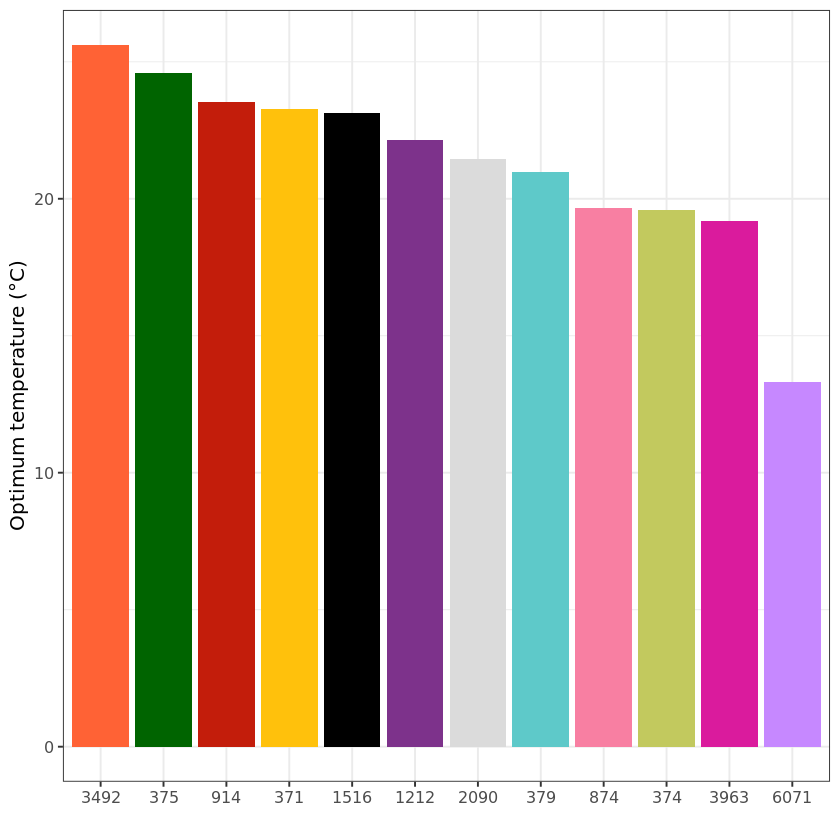

In [24]:
ggplot(all_params_coef%>%dplyr::left_join(revised_df) %>% dplyr::arrange(desc(Revised_opt)) %>%
          dplyr::mutate(Strain=factor(Strain,levels=unique(Strain))))+ 
    geom_bar(aes(x = Strain, y =Revised_opt,fill=Strain), stat="identity") +theme_bw(base_size=12) + 
    theme(legend.position="none") + xlab("") + ylab("Optimum temperature (°C)") + 
    scale_fill_manual(breaks=as.character(strain_color_frame_harriet$Strains),
                                        limits=as.character(strain_color_frame_harriet$Strains),
                                        values=strain_color_frame_harriet$Colors) 

Joining with `by =
join_by(Strain)`
Joining with `by =
join_by(Strain)`
Warning message:
“Using `size` aesthetic
for lines was
deprecated in ggplot2
3.4.0.
ℹ Please use
  `linewidth` instead.”
Warning message in geom_segment(aes(x = 12, xend = Revised_opt, y = Revised_wid, :
“Ignoring unknown
parameters: `shape`”
Warning message in geom_segment(aes(y = 15, yend = Revised_wid, x = Revised_opt, :
“Ignoring unknown
parameters: `shape`”


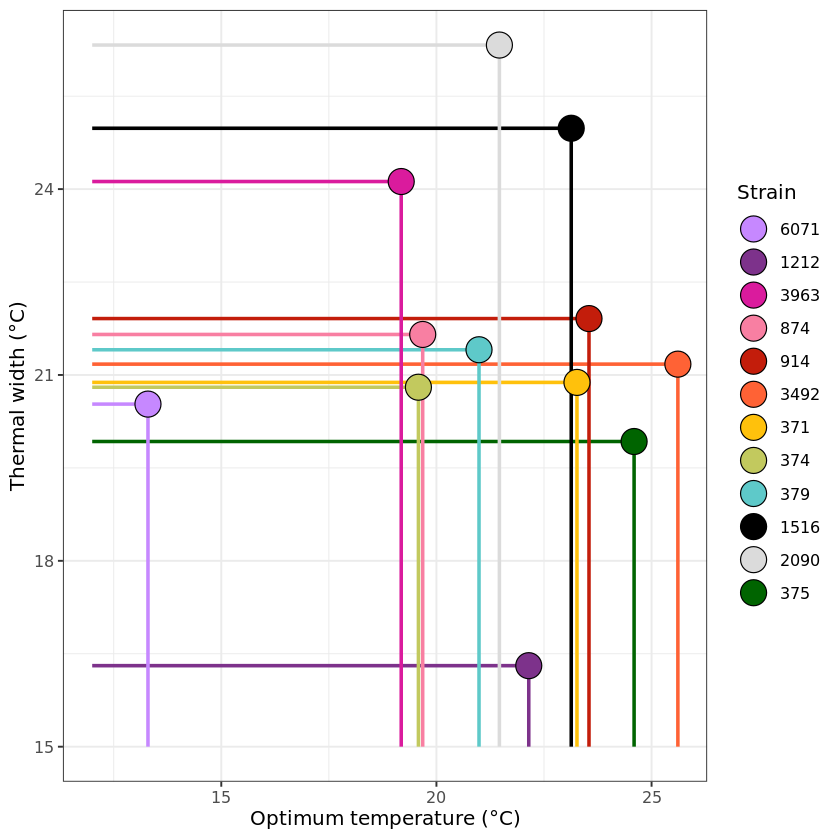

In [25]:
width_matrix = ggplot(all_params_coef%>%dplyr::left_join(revised_df) %>% dplyr::left_join(revised_df_width) %>% 
       dplyr::arrange(desc(Revised_opt)) %>%
       dplyr::mutate(Strain=factor(Strain,levels=unique(Strain))))+ 
    geom_segment(aes(x = 12, xend =Revised_opt,y=Revised_wid,
                     yend=Revised_wid,color=Strain),pch=21,size=1)+theme_bw(base_size=12) +
    geom_segment(aes(y = 15, yend =Revised_wid,x=Revised_opt,
                     xend=Revised_opt,color=Strain),pch=21,size=1)+theme_bw(base_size=12) +
    geom_point(aes(x = Revised_opt, y =Revised_wid,fill=Strain),pch=21,size=7)+theme_bw(base_size=12) + 
    ylab("Thermal width (°C)") + xlab("Optimum temperature (°C)") + 
    scale_color_manual(breaks=as.character((strain_color_frame_harriet%>%
                                            dplyr::filter(Strains%in%all_params_coef$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet%>%
                                            dplyr::filter(Strains%in%all_params_coef$Strain))$Strains),
                                        values=(strain_color_frame_harriet%>%
                                            dplyr::filter(Strains%in%all_params_coef$Strain))$Colors,
                       name="Strain") + 
    scale_fill_manual(breaks=as.character((strain_color_frame_harriet%>%
                                            dplyr::filter(Strains%in%all_params_coef$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet%>%
                                            dplyr::filter(Strains%in%all_params_coef$Strain))$Strains),
                                        values=(strain_color_frame_harriet%>%
                                            dplyr::filter(Strains%in%all_params_coef$Strain))$Colors,
                       name="Strain") 
width_matrix

Joining with `by =
join_by(Strain)`
Warning message in geom_text(aes(x = Param, y = Value, label = Strain), pch = 21, :
“Ignoring unknown
parameters: `shape`”


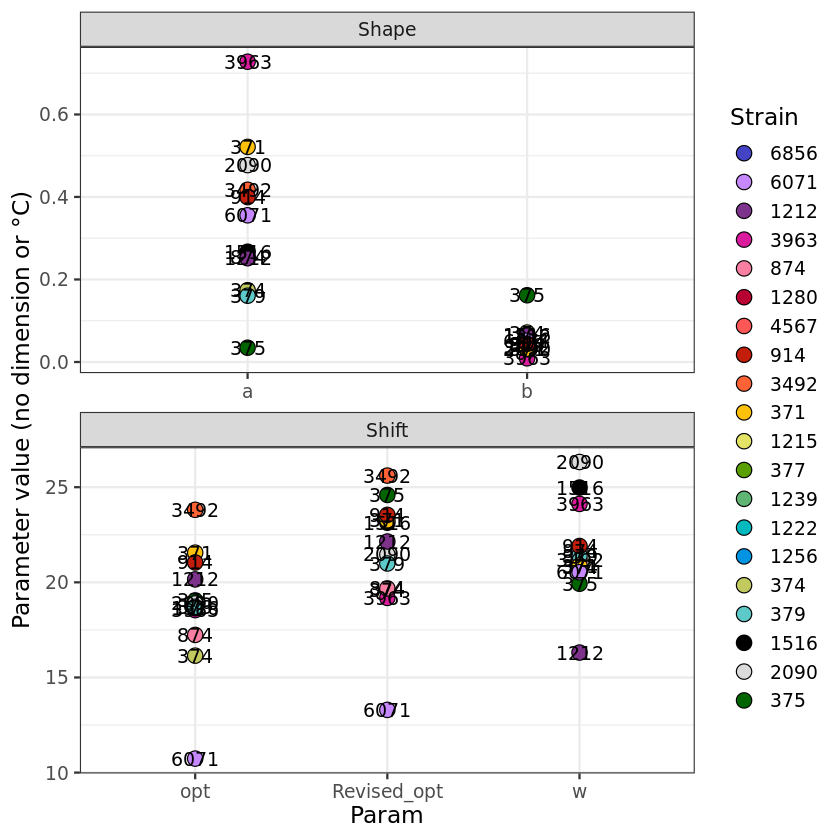

In [26]:
ggplot(all_params_coef%>%dplyr::left_join(revised_df) %>%
          #dplyr::left_join(revised_df_width) %>% dplyr::arrange(desc(Revised_wid)) %>%
          dplyr::mutate(Strain=factor(Strain,levels=unique(Strain))) %>%
    dplyr::select(colnames(.)[!grepl("err",colnames(.))]) %>%
    tidyr::pivot_longer(cols=!starts_with("Strain"),names_to="Param",values_to="Value") %>%
    dplyr::mutate(WidthOpt=case_when((Param%in%c("a","b"))~"Shape",
                                     TRUE ~ "Shift"))) + 
    geom_point(aes(x=Param,y=Value,fill=Strain),pch=21,size=4)+ 
    geom_text(aes(x=Param,y=Value,label=Strain),pch=21,size=4)+ 
    scale_fill_manual(breaks=as.character(strain_color_frame_harriet$Strains),
                                        limits=as.character(strain_color_frame_harriet$Strains),
                                        values=strain_color_frame_harriet$Colors) + 
    facet_wrap(~WidthOpt,scale="free",nrow=2) + theme_bw(base_size=14) + ylab("Parameter value (no dimension or °C)")

Joining with `by =
join_by(Strain)`


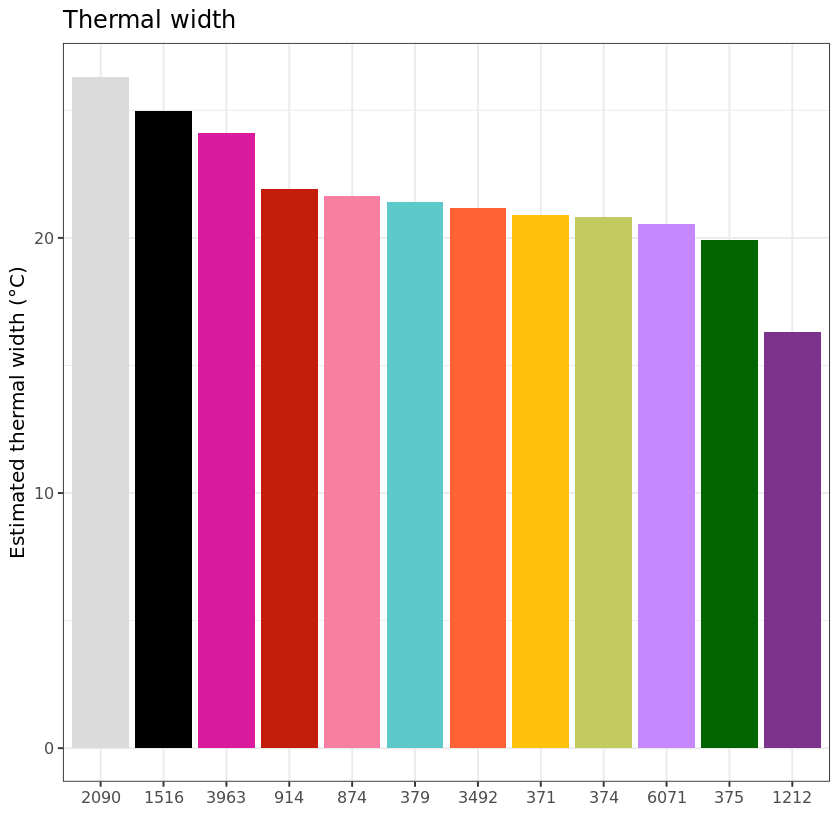

In [27]:
ggplot(all_params_coef%>%dplyr::left_join(revised_df_width) %>% dplyr::arrange(desc(Revised_wid)) %>%
          dplyr::mutate(Strain=factor(Strain,levels=unique(Strain))))+ 
    geom_bar(aes(x = Strain, y =Revised_wid,fill=Strain), stat="identity") +theme_bw(base_size=12) + 
    theme(legend.position="none") + xlab("") + ylab("Estimated thermal width (°C)") + 
    scale_fill_manual(breaks=as.character(strain_color_frame_harriet$Strains),
                                        limits=as.character(strain_color_frame_harriet$Strains),
                                        values=strain_color_frame_harriet$Colors) +
    ggtitle("Thermal width")

Joining with `by =
join_by(Strain)`
Joining with `by =
join_by(Strain)`
`geom_smooth()` using
formula = 'y ~ x'


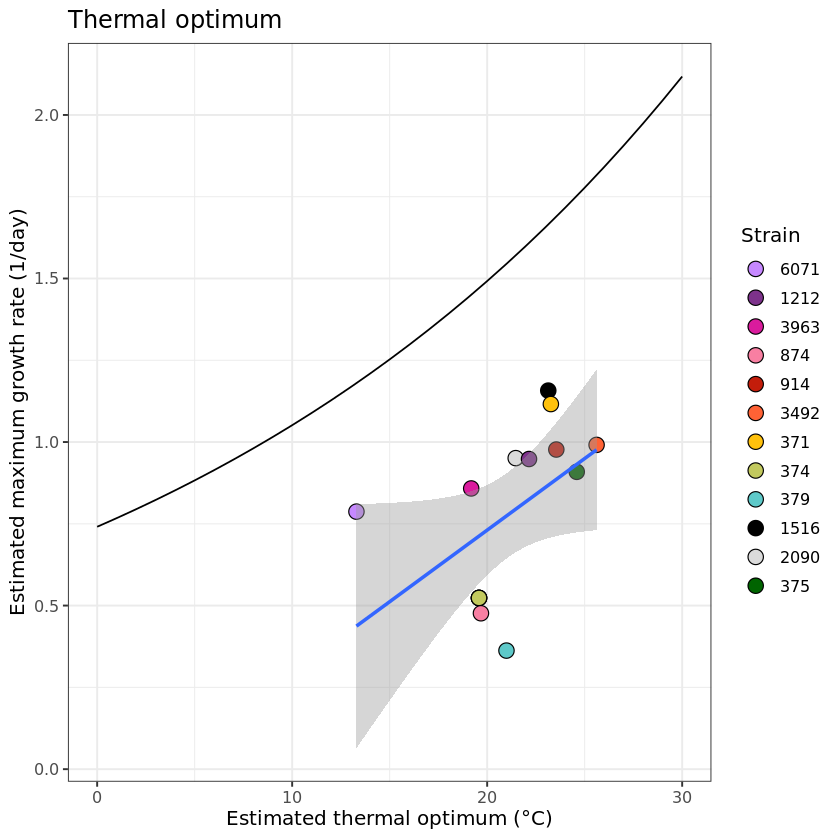

In [28]:
ggplot(all_params_coef%>%dplyr::left_join(revised_df) %>%
          dplyr::left_join(all_params %>% dplyr::group_by(Strain) %>% 
                           dplyr::filter(MeasuredPoints==max(MeasuredPoints,na.rm=T))) %>%
          dplyr::mutate(Strain=factor(Strain,levels=unique(Strain))))+ 
    geom_point(aes(x = Revised_opt, y =MeasuredPoints,fill=Strain), size=4,pch=21) +
    geom_smooth(aes(x = Revised_opt, y =MeasuredPoints), method="lm") +
    geom_line(data=data.frame(x=c(0:30),y=0.741*exp(0.035*c(0:30))),
              mapping=aes(x=x,y=y)) + 
    theme_bw(base_size=12) + 
    #theme(legend.position="none") + 
    ylab("Estimated maximum growth rate (1/day)") + xlab("Estimated thermal optimum (°C)") + 
    scale_fill_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors) +
    ggtitle("Thermal optimum
")

Joining with `by =
join_by(Strain)`
Joining with `by =
join_by(Strain)`


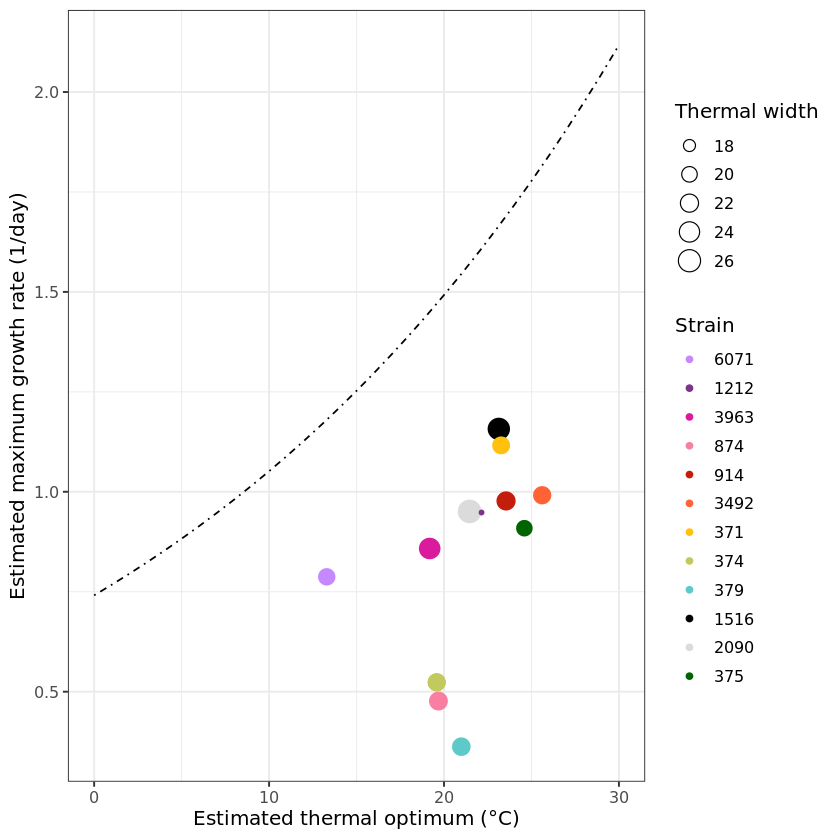

In [29]:
eppley_comp = ggplot(all_params_coef%>%dplyr::left_join(revised_df) %>%
          dplyr::left_join(all_params %>% dplyr::group_by(Strain) %>% 
                           dplyr::filter(MeasuredPoints==max(MeasuredPoints,na.rm=T))) %>%
          dplyr::mutate(Strain=factor(Strain,levels=unique(Strain))))+ 
    geom_point(aes(x = Revised_opt, y =MeasuredPoints,fill=Strain,color=Strain,size=w),pch=21) +
    #geom_smooth(aes(x = Revised_opt, y =MeasuredPoints), method="lm") +
    geom_line(data=data.frame(x=c(0:30),y=0.741*exp(0.035*c(0:30))),
              mapping=aes(x=x,y=y),linetype="dotdash") + 
    theme_bw(base_size=12) + 
    #theme(legend.position="none") + 
    ylab("Estimated maximum growth rate (1/day)") + xlab("Estimated thermal optimum (°C)") + 
    scale_fill_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors) +
    scale_color_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors) +
    scale_size(name="Thermal width")
eppley_comp

Warning message:
“Removed 8747 rows
containing missing
values (`geom_line()`).”
Warning message:
“Duplicated aesthetics
after name
standardisation: colour”
Warning message:
“Removed 8747 rows
containing missing
values (`geom_line()`).”
Warning message:
“Duplicated aesthetics
after name
standardisation: colour”


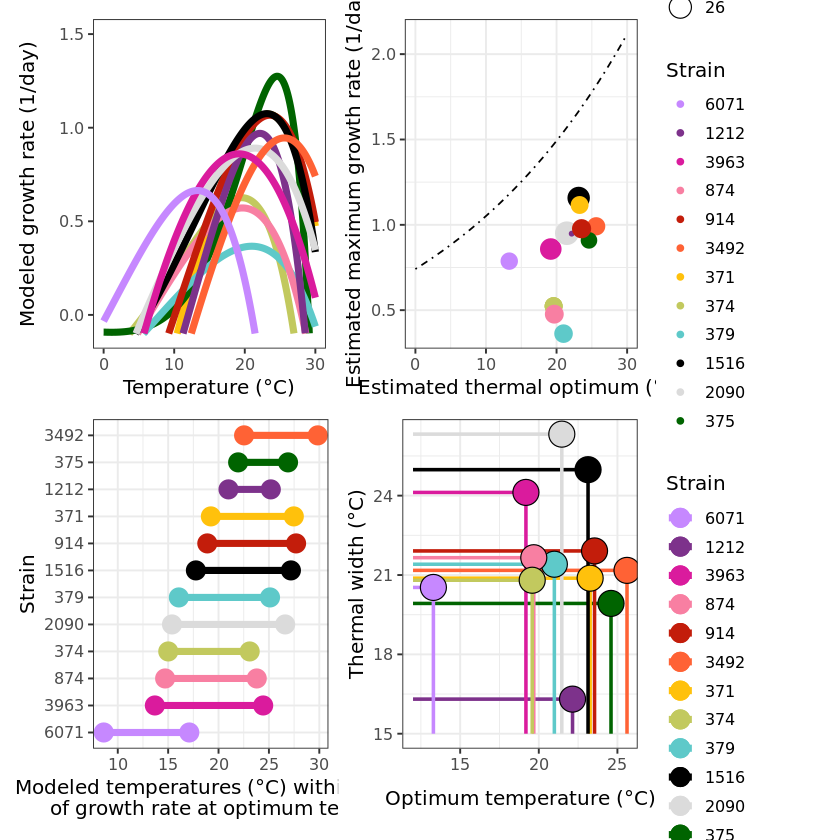

In [30]:
(growth_curves_fig|eppley_comp)/(plateau_plot|width_matrix)+ plot_layout(guides = "collect")
ggsave("growth_composite_fig2.pdf",width=10,height=10,units="in")

Joining with `by =
join_by(Strain)`
Joining with `by =
join_by(Strain)`


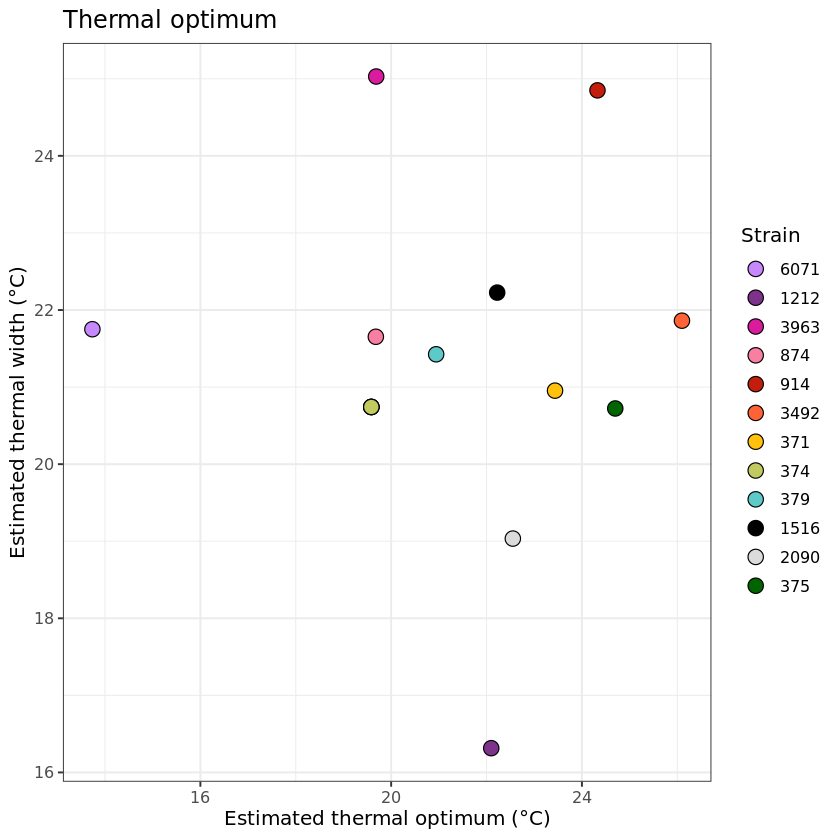

In [427]:
ggplot(all_params_coef%>%dplyr::left_join(revised_df) %>%
          dplyr::left_join(all_params %>% dplyr::group_by(Strain) %>% 
                           dplyr::filter(MeasuredPoints==max(MeasuredPoints,na.rm=T))) %>%
          dplyr::mutate(Strain=factor(Strain,levels=unique(Strain))))+ 
    geom_point(aes(x = Revised_opt, y =w,fill=Strain), size=4,pch=21) +
    theme_bw(base_size=12) + 
    #theme(legend.position="none") + 
    ylab("Estimated thermal width (°C)") + xlab("Estimated thermal optimum (°C)") + 
    scale_fill_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors) +
    ggtitle("Thermal optimum")

Joining with `by =
join_by(Strain)`
Joining with `by =
join_by(Strain)`


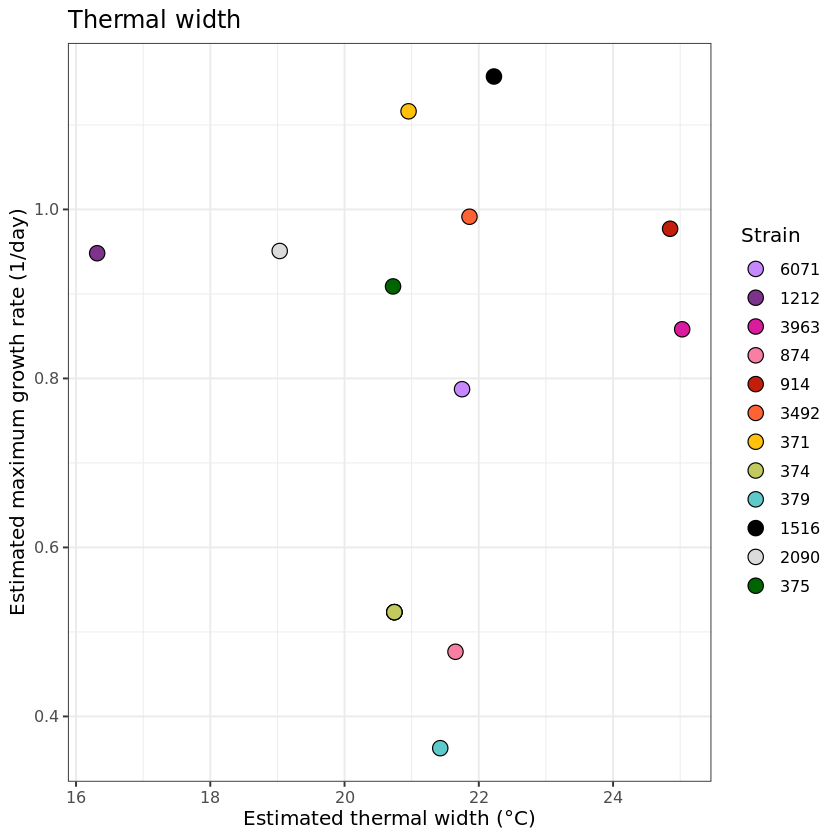

In [425]:
ggplot(all_params_coef%>%dplyr::left_join(revised_df) %>%
          dplyr::left_join(all_params %>% dplyr::group_by(Strain) %>% 
                           dplyr::filter(MeasuredPoints==max(MeasuredPoints,na.rm=T))) %>%
          dplyr::mutate(Strain=factor(Strain,levels=unique(Strain))))+ 
    geom_point(aes(x = w, y =MeasuredPoints,fill=Strain), size=4,pch=21) +
    theme_bw(base_size=12) + 
    #theme(legend.position="none") + 
    ylab("Estimated maximum growth rate (1/day)") + xlab("Estimated thermal width (°C)") + 
    scale_fill_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors) +
    ggtitle("Thermal width")

In [ ]:
ggplot(all_params_coef%>%dplyr::left_join(revised_df) %>%
          dplyr::left_join(all_params %>% dplyr::group_by(Strain) %>% 
                           dplyr::filter(MeasuredPoints==max(MeasuredPoints,na.rm=T))) %>%
          dplyr::mutate(Strain=factor(Strain,levels=unique(Strain))))+ 
    geom_point(aes(x = w, y =MeasuredPoints,fill=Strain), size=4,pch=21) +
    theme_bw(base_size=12) + 
    #theme(legend.position="none") + 
    ylab("Estimated maximum growth rate (1/day)") + xlab("Estimated thermal width (°C)") + 
    scale_fill_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors) +
    ggtitle("Thermal width")

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 371


Warning message:
“Values from `concpivot` are not
uniquely identified; output will
contain list-cols.
• Use `values_fn = list` to suppress
  this warning.
• Use `values_fn = {summary_fun}` to
  summarise duplicates.
• Use the following dplyr code to
  identify duplicates.
  {data} %>%
  dplyr::group_by(Strain, Position,
  Temperature, Rep, Transfer,
  GR_Calc_placeholder) %>%
  dplyr::summarise(n = dplyr::n(),
  .groups = "drop") %>%
  dplyr::filter(n > 1L)”
Warning message:
“Expected 2 pieces. Additional pieces
discarded in 1 rows [14].”
Warning message:
“Expected 2 pieces. Missing pieces
filled with `NA` in 6 rows [1, 2, 3, 4,
5, 6].”
Warning message:
“Expected 2 pieces. Additional pieces
discarded in 1 rows [8].”
Warning message:
“There were 2 warnings in
`dplyr::mutate()`.
The first warning was:
ℹ In argument: `TF = as.numeric(TF)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to
  see the 1 remaining warning.”
Warning message in sqrt(diag(ob

[1] 371


Warning message:
“Values from `concpivot` are not
uniquely identified; output will
contain list-cols.
• Use `values_fn = list` to suppress
  this warning.
• Use `values_fn = {summary_fun}` to
  summarise duplicates.
• Use the following dplyr code to
  identify duplicates.
  {data} %>%
  dplyr::group_by(Strain, Position,
  Temperature, Rep, Transfer,
  GR_Calc_placeholder) %>%
  dplyr::summarise(n = dplyr::n(),
  .groups = "drop") %>%
  dplyr::filter(n > 1L)”
Warning message:
“Expected 2 pieces. Additional pieces
discarded in 1 rows [14].”
Warning message:
“Expected 2 pieces. Missing pieces
filled with `NA` in 6 rows [1, 2, 3, 4,
5, 6].”
Warning message:
“Expected 2 pieces. Additional pieces
discarded in 1 rows [8].”
Warning message:
“There were 2 warnings in
`dplyr::mutate()`.
The first warning was:
ℹ In argument: `TF = as.numeric(TF)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to
  see the 1 remaining warning.”


[1] 371


Warning message:
“Values from `concpivot` are not
uniquely identified; output will
contain list-cols.
• Use `values_fn = list` to suppress
  this warning.
• Use `values_fn = {summary_fun}` to
  summarise duplicates.
• Use the following dplyr code to
  identify duplicates.
  {data} %>%
  dplyr::group_by(Strain, Position,
  Temperature, Rep, Transfer,
  GR_Calc_placeholder) %>%
  dplyr::summarise(n = dplyr::n(),
  .groups = "drop") %>%
  dplyr::filter(n > 1L)”
Warning message:
“Expected 2 pieces. Additional pieces
discarded in 1 rows [14].”
Warning message:
“Expected 2 pieces. Missing pieces
filled with `NA` in 6 rows [1, 2, 3, 4,
5, 6].”
Warning message:
“Expected 2 pieces. Additional pieces
discarded in 1 rows [8].”
Warning message:
“There were 2 warnings in
`dplyr::mutate()`.
The first warning was:
ℹ In argument: `TF = as.numeric(TF)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to
  see the 1 remaining warning.”


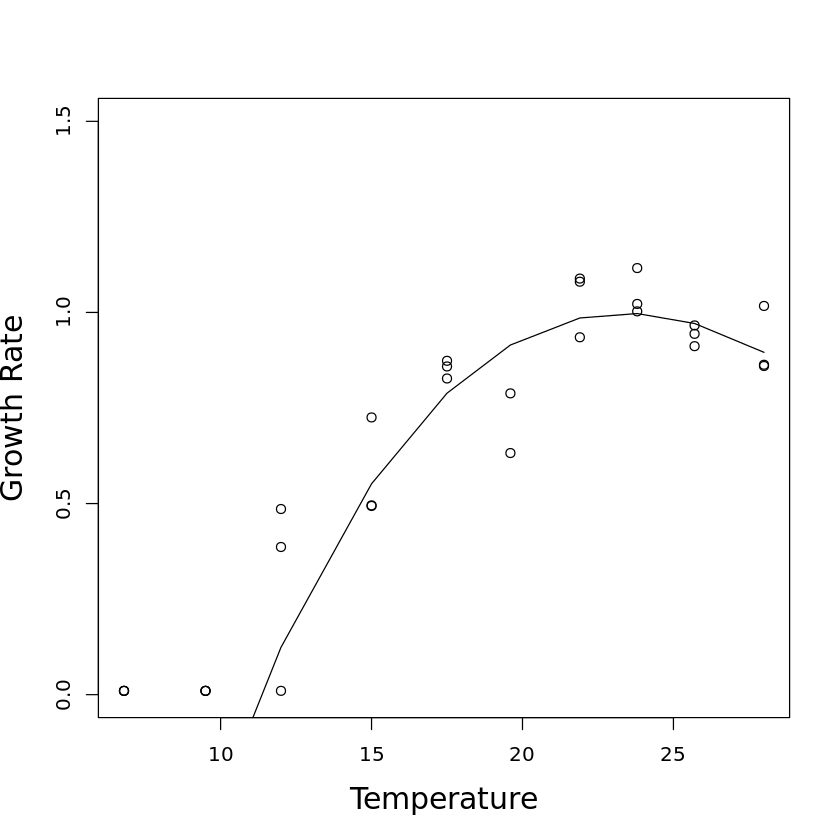

In [52]:
y = nbcurve(x=return_params(final_data,strain=strain,return_gr_frame=TRUE)$Temperature,
            a=summary(m1)@coef["a","Estimate"],
            b=summary(m1)@coef["b","Estimate"],
            w=summary(m1)@coef["w","Estimate"],
            opt=summary(m1)@coef["o","Estimate"])
plot_frame=data.frame(x=return_params(final_data,strain=strain,return_gr_frame=TRUE)$Temperature,
                      y=y,
                     original_measures=return_params(final_data,strain=strain,
                                                     return_gr_frame=TRUE)$GrowthRate) %>% 
            dplyr::mutate(x=as.numeric(x)) %>%
    dplyr::arrange(x)
plot(plot_frame$x,
     plot_frame$y, typ='l',  cex.lab = 1.5, cex = 1.5,
     xlab="Temperature", ylab="Growth Rate",
     ylim=c(0,1.5))
points(plot_frame$x,plot_frame$original_measures)

In [49]:
y

[1] -1.0647192 -1.0647192 -1.0647192 -0.3701219 -0.3701219 -0.3701219
 [7]  0.1238550  0.1238550  0.1238550  0.7888059  0.7888059  0.7888059
[13]  0.9148211  0.9855611  0.9855611  0.9855611  0.9970935  0.9970935
[19]  0.9970935  0.9711381  0.9711381  0.9711381  0.5517351  0.5517351
[25]  0.5517351  0.9148211  0.8956316  0.8956316  0.8956316